# EVALUASI ALGORITMA KNN DAN COSINE SIMILARITY DALAM SISTEM REKOMENDASI KARIR BERBASIS KEPRIBADIAN OCEAN DAN APTITUDE SCORE DENGAN IMPLEMENTASI WEB


# 1. Import Libraries

## Installing packages

In [ ]:
!pip install umap-learn
!pip install ydata-profiling

## Import libraries

In [ ]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import umap
from sklearn.preprocessing import StandardScaler
from ydata_profiling import ProfileReport
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, average_precision_score

## Kode tersebut mengimpor beberapa pustaka Python yang umum digunakan untuk analisis data, visualisasi, dan machine learning, khususnya dalam konteks sistem rekomendasi. Pustaka yang diimpor meliputi:

1.  **`pandas`**: Untuk manipulasi dan analisis data, seperti membaca CSV, mengolah DataFrame.
2.  **`kagglehub`**: Diduga digunakan untuk mengakses dataset dari Kaggle.
3.  **`matplotlib.pyplot`**: Pustaka standar untuk membuat visualisasi statis, seperti grafik dan plot.
4.  **`seaborn`**: Pustaka yang dibangun di atas Matplotlib untuk membuat visualisasi statistik yang lebih menarik dan informatif.
5.  **`sklearn.metrics.pairwise.cosine_similarity`**: Mengimpor fungsi untuk menghitung kesamaan kosinus antara sampel, yang merupakan metrik umum dalam sistem rekomendasi.
6.  **`umap`**: Mengimpor pustaka UMAP (Uniform Manifold Approximation and Projection) yang kemungkinan digunakan untuk reduksi dimensi atau visualisasi data.
7.  **`sklearn.preprocessing.StandardScaler`**: Digunakan untuk menstandardisasi fitur data, yang merupakan langkah pra-pemrosesan umum dalam banyak algoritma machine learning.
8.  **`ydata_profiling`**: Pustaka untuk menghasilkan laporan profil data yang komprehensif, membantu dalam memahami karakteristik data awal.

Selain impor, kode tersebut juga menyertakan perintah shell (`!pip install`) untuk menginstal pustaka `umap-learn` dan `ydata-profiling`. Ini menunjukkan bahwa pustaka-pustaka ini mungkin belum terpasang di lingkungan runtime dan perlu diinstal sebelum dapat diimpor dan digunakan.

Secara keseluruhan, bagian kode ini bertujuan untuk menyiapkan lingkungan kerja dengan mengimpor semua alat (pustaka) yang diperlukan untuk tugas analisis data dan pengembangan sistem rekomendasi yang dijelaskan dalam judul, yang melibatkan data kepribadian (OCEAN) dan nilai bakat (Aptitude Score).

# 2. Load Dataset

In [ ]:
# Download latest version
path = kagglehub.dataset_download("utkarshshrivastav07/career-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/career-prediction-dataset


In [ ]:
!ls {path}

Data_final.csv


In [ ]:
df = pd.read_csv(f"{path}/Data_final.csv")

In [ ]:
df

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,Career
0,5.45,8.67,3.45,5.34,4.23,9.23,4.56,6.78,7.89,6.12,Accountant
1,8.78,5.67,4.56,6.45,4.23,5.12,8.45,7.89,6.34,6.01,Graphic Designer
2,6.12,6.78,9.34,7.56,5.01,6.23,4.23,6.45,6.67,8.45,Salesperson
3,9.12,8.78,4.23,5.67,4.56,7.89,5.34,6.45,9.34,7.67,Research Scientist
4,6.45,7.56,5.67,9.12,4.23,5.34,4.01,6.23,5.78,8.67,Teacher
...,...,...,...,...,...,...,...,...,...,...,...
100,7.67,8.23,6.01,9.12,5.45,4.45,2.89,3.12,4.67,8.34,Foreign Service Officer
101,2.67,8.78,7.67,8.45,6.45,4.45,2.89,3.12,4.67,5.45,Customs and Border Protection Officer
102,6.78,8.67,4.23,5.23,4.67,8.23,7.67,6.01,7.45,5.45,Civil Engineer
103,7.34,7.67,4.23,5.23,4.67,9.34,8.45,6.78,8.12,5.67,Robotics Engineer


## Dalam bagian "Load Dataset", kode tersebut melakukan langkah-langkah berikut:

1.  Menggunakan `kagglehub.dataset_download` untuk mengunduh versi terbaru dari dataset "career-prediction-dataset" yang dipublikasikan oleh "utkarshshrivastav07" dari Kaggle.
2.  Mencetak jalur (path) lokal di mana dataset tersebut diunduh.
3.  Menggunakan perintah shell `!ls {path}` untuk menampilkan isi direktori tempat dataset diunduh, memastikan file-file dataset tersedia.
4.  Membaca file CSV bernama "Data\_final.csv" dari jalur yang diunduh menggunakan `pd.read_csv` dan memuatnya ke dalam DataFrame pandas bernama `df`.
5.  Menampilkan DataFrame `df`, yang berisi data yang baru saja dimuat dari file CSV.

Secara ringkas, bagian ini bertanggung jawab untuk mengambil data mentah (dataset) dari sumber eksternal (Kaggle) dan memuatnya ke dalam format DataFrame pandas di lingkungan kerja, sehingga data siap untuk diproses dan dianalisis lebih lanjut.

# 3. Exploratory Data Analysis(EDA)

## Dataset Overview

In [ ]:
df.describe()

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,7.294857,7.538286,5.548952,6.863714,5.466381,5.939619,4.376476,5.163810,5.724190,6.794381
std,1.398485,1.215005,1.643137,1.515778,0.868926,1.958362,1.948409,1.747213,1.872927,1.495273
min,2.670000,3.560000,2.890000,3.230000,2.890000,2.890000,2.340000,3.010000,3.010000,3.450000
25%,6.670000,7.340000,4.230000,5.450000,4.670000,4.450000,3.120000,3.670000,4.340000,5.450000
50%,7.230000,7.670000,5.230000,6.450000,5.450000,5.120000,3.450000,4.450000,4.670000,7.450000
75%,8.670000,8.340000,7.010000,8.120000,6.010000,7.780000,4.450000,6.780000,7.670000,8.120000
max,9.450000,9.450000,9.340000,9.340000,8.120000,9.450000,9.230000,9.340000,9.340000,9.340000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   O_score              105 non-null    float64
 1   C_score              105 non-null    float64
 2   E_score              105 non-null    float64
 3   A_score              105 non-null    float64
 4   N_score              105 non-null    float64
 5   Numerical Aptitude   105 non-null    float64
 6   Spatial Aptitude     105 non-null    float64
 7   Perceptual Aptitude  105 non-null    float64
 8   Abstract Reasoning   105 non-null    float64
 9   Verbal Reasoning     105 non-null    float64
 10  Career               105 non-null    object 
dtypes: float64(10), object(1)
memory usage: 9.2+ KB


In [ ]:
df.shape

(105, 11)

## Check Class

In [ ]:
df['Career'].unique()

array(['Accountant', 'Graphic Designer', 'Salesperson',
       'Research Scientist', 'Teacher', 'Architect', 'Nurse',
       'Software Developer', 'Psychologist', 'Chef', 'Marketing Manager',
       'Physician', 'Artist', 'Human Resources Manager',
       'Construction Engineer', 'Journalist', 'Astronomer',
       'Financial Analyst', 'Biologist', 'Event Planner',
       'Real Estate Agent', 'Environmental Scientist', 'Lawyer',
       'IT Support Specialist', 'Fashion Designer',
       'Marketing Coordinator', 'Biomedical Engineer',
       'Event Photographer', 'Data Analyst', 'Pharmacist',
       'Social Worker', 'Financial Planner', 'Biotechnologist',
       'HR Recruiter', 'Software Quality Assurance Tester',
       'Elementary School Teacher', 'Industrial Engineer',
       'Market Research Analyst', 'Financial Auditor', 'Musician',
       'Police Detective', 'Marketing Copywriter', 'Zoologist',
       'Speech Therapist', 'Mechanical Engineer', 'Forensic Scientist',
       'Social M

## Check labels

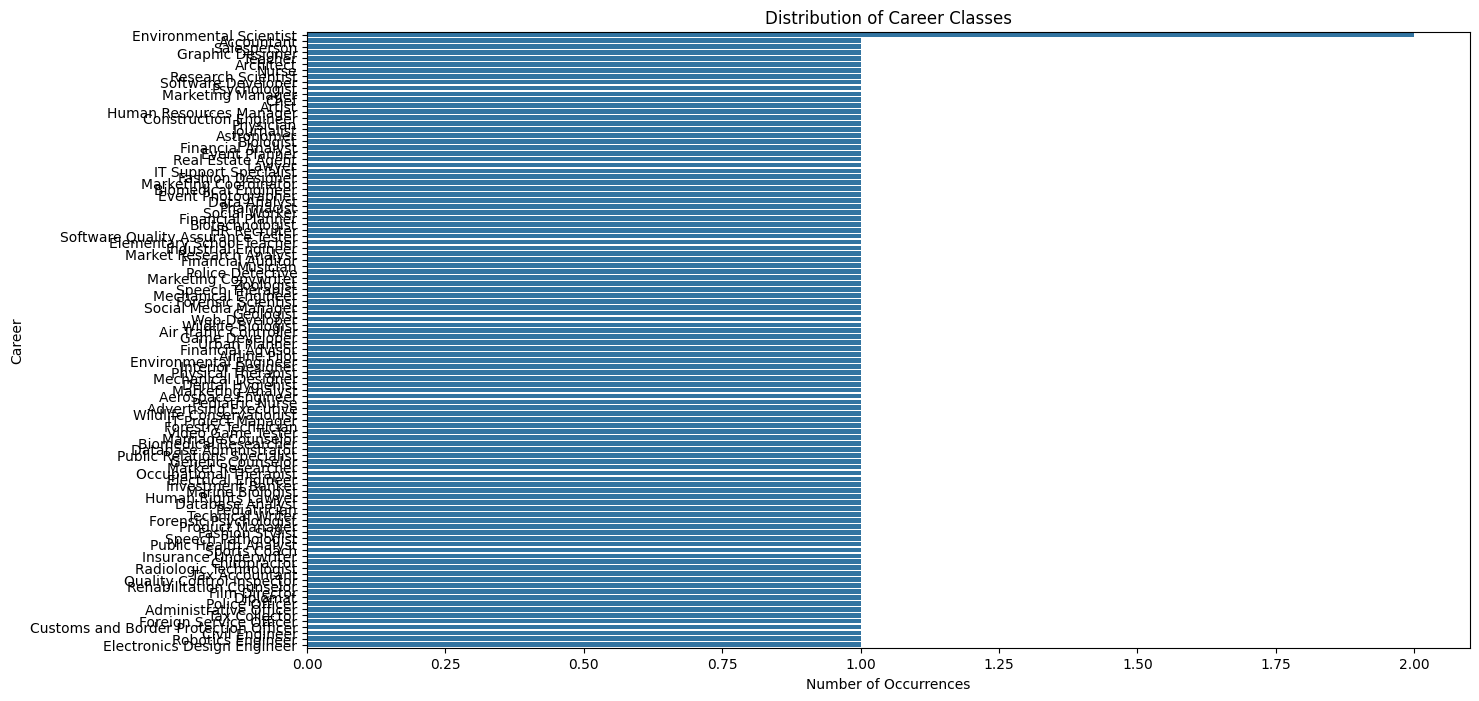


Dominant Classes (Top 10):
Career
Environmental Scientist    2
Accountant                 1
Salesperson                1
Graphic Designer           1
Teacher                    1
Architect                  1
Nurse                      1
Research Scientist         1
Software Developer         1
Psychologist               1
Name: count, dtype: int64

Rare Classes (Bottom 10):
Career
Film Director                            1
Diplomat                                 1
Police Officer                           1
Administrative Officer                   1
Tax Collector                            1
Foreign Service Officer                  1
Customs and Border Protection Officer    1
Civil Engineer                           1
Robotics Engineer                        1
Electronics Design Engineer              1
Name: count, dtype: int64

Class Imbalance Ratio (Majority/Minority): 2.00


In [ ]:
# Plot distribution of the 104 classes (Assuming 'Career' is the target column)
if 'Career' in df.columns:
    plt.figure(figsize=(15, 8))
    sns.countplot(data=df, y='Career', order=df['Career'].value_counts().index)
    plt.title('Distribution of Career Classes')
    plt.xlabel('Number of Occurrences')
    plt.ylabel('Career')
    plt.show()

    # Identify dominant and rare classes
    class_counts = df['Career'].value_counts()
    dominant_classes = class_counts.head(10) # Top 10 as dominant
    rare_classes = class_counts.tail(10)     # Bottom 10 as rare

    print("\nDominant Classes (Top 10):")
    print(dominant_classes)

    print("\nRare Classes (Bottom 10):")
    print(rare_classes)

    # Calculate class imbalance ratio
    # Ratio of the number of instances in the majority class to the number of instances in the minority class.
    majority_class_count = class_counts.max()
    minority_class_count = class_counts.min()

    if minority_class_count > 0:
        imbalance_ratio = majority_class_count / minority_class_count
        print(f"\nClass Imbalance Ratio (Majority/Minority): {imbalance_ratio:.2f}")
    else:
        print("\nCannot calculate imbalance ratio: Minority class count is 0.")

else:
    print("Column 'Career' not found in the DataFrame. Please check the column name.")

## Missing & duplicates

In [ ]:
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Missing values per column:
O_score                0
C_score                0
E_score                0
A_score                0
N_score                0
Numerical Aptitude     0
Spatial Aptitude       0
Perceptual Aptitude    0
Abstract Reasoning     0
Verbal Reasoning       0
Career                 0
dtype: int64

Number of duplicate rows:
0


## Feature distribution


Numerical Features: ['O_score', 'C_score', 'E_score', 'A_score', 'N_score', 'Numerical Aptitude', 'Spatial Aptitude', 'Perceptual Aptitude', 'Abstract Reasoning', 'Verbal Reasoning']

Generating Histograms for Numerical Features...


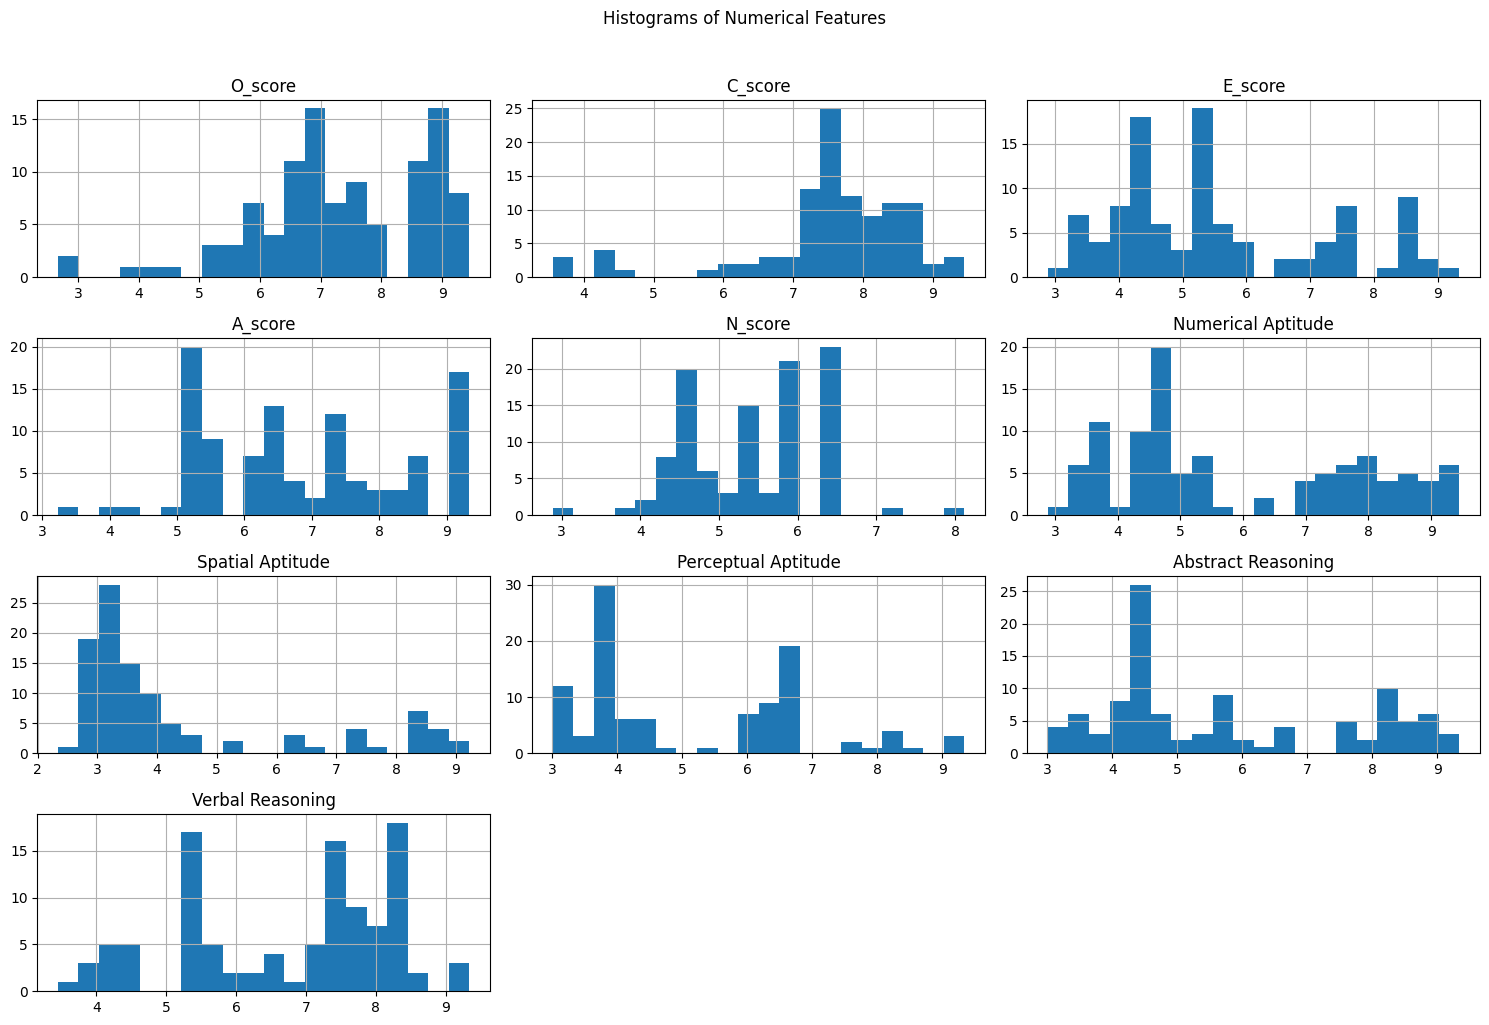


Generating Boxplots for Numerical Features...


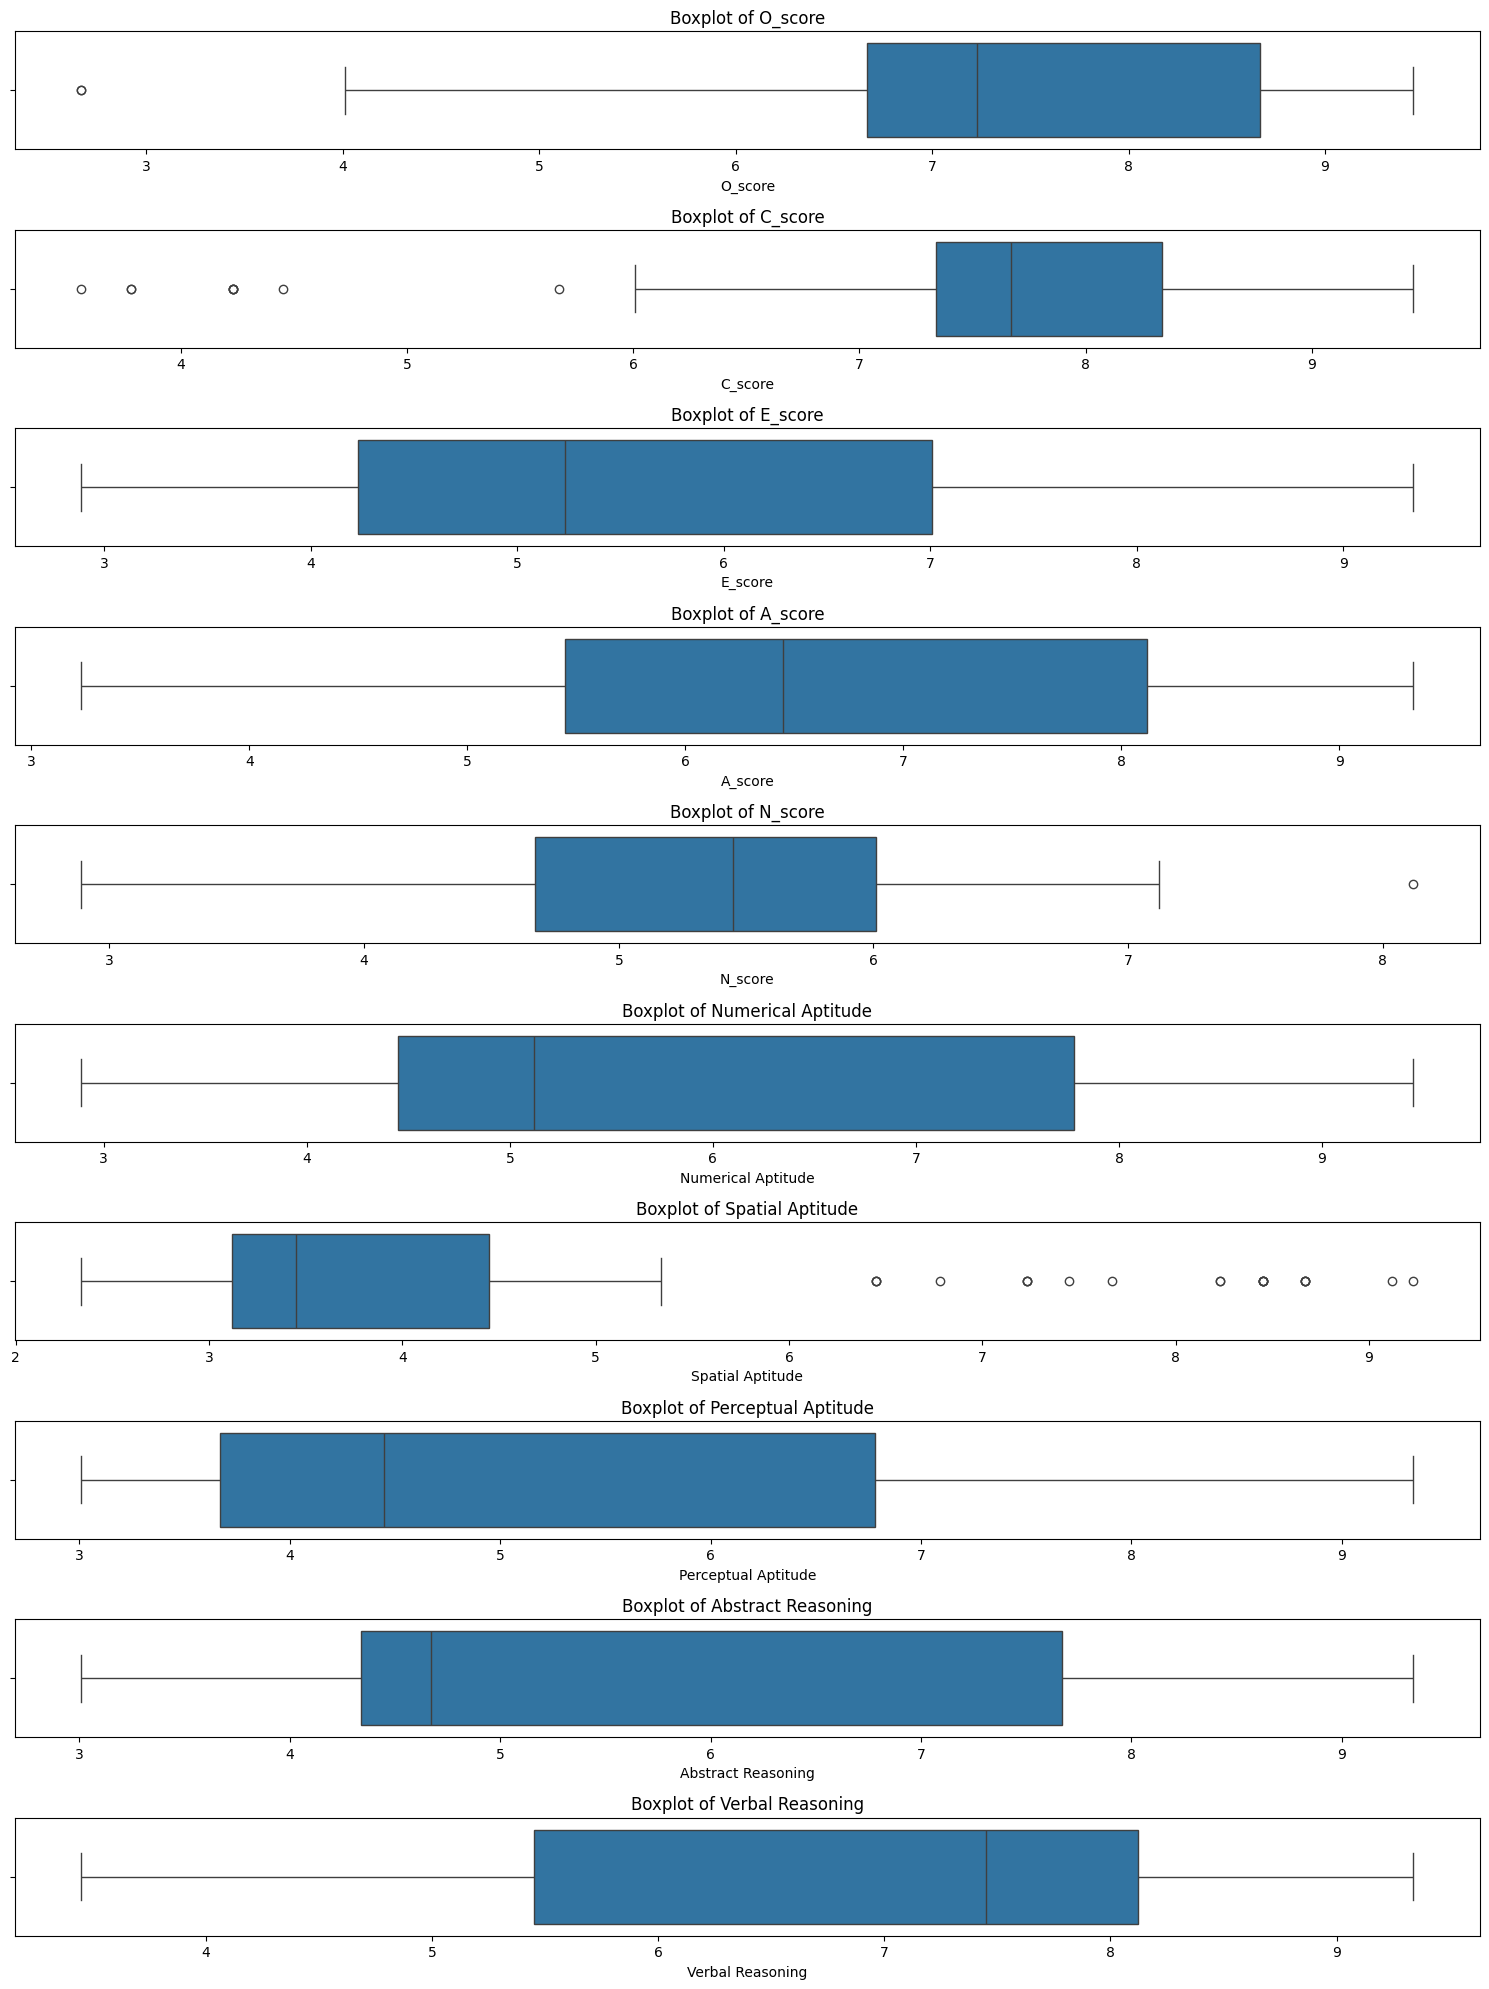

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

if 'Career' in numerical_features:
    numerical_features.remove('Career') # Remove target variable if it's numeric

print("\nNumerical Features:", numerical_features)

# Histograms for numerical features
print("\nGenerating Histograms for Numerical Features...")
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

# Boxplots for numerical features to check for outliers
print("\nGenerating Boxplots for Numerical Features...")
plt.figure(figsize=(15, len(numerical_features) * 2))
for i, col in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 1, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## Correlation matrix

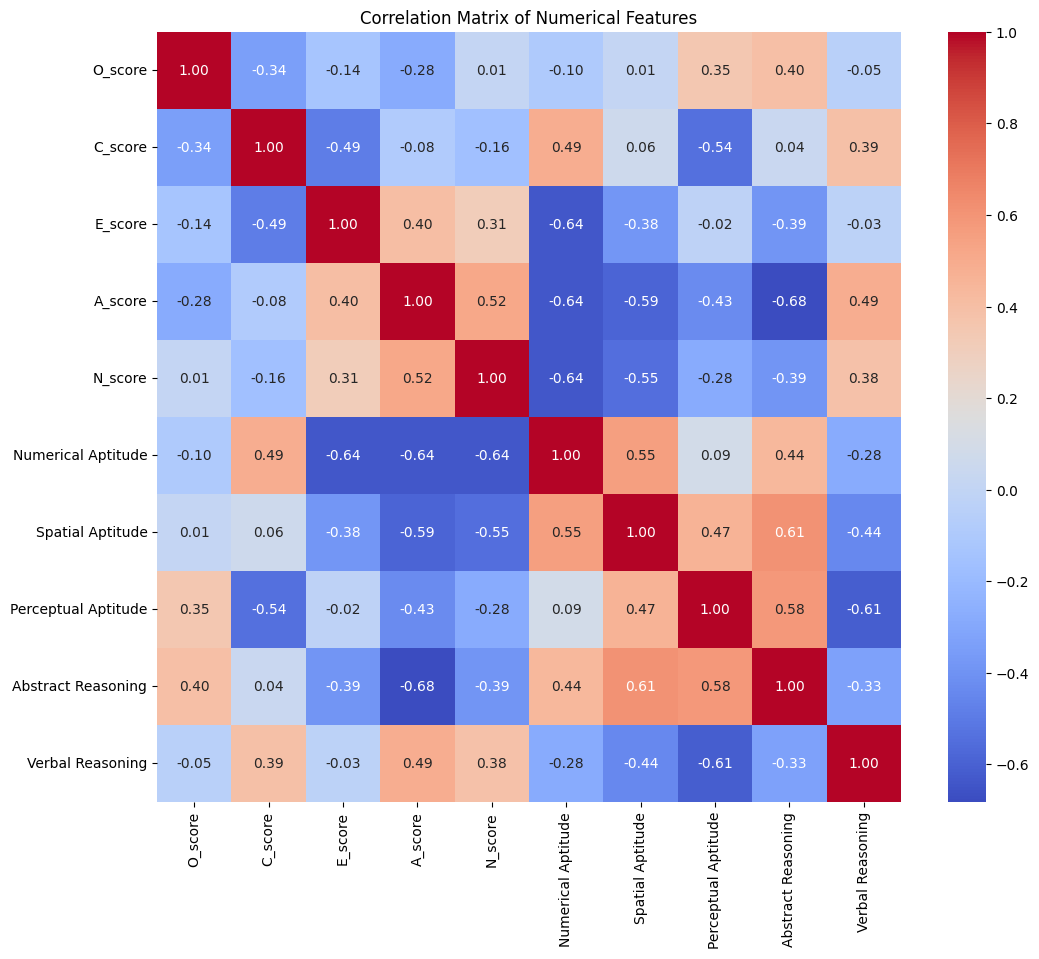


Highly Correlated Feature Pairs (|>0.8|):
  No highly correlated feature pairs found above the threshold.


In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Identify highly correlated features (potential redundancy)
# We can set a threshold, e.g., |correlation| > 0.8
threshold = 0.8
highly_correlated_pairs = {}
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_pairs[(colname_i, colname_j)] = correlation_matrix.iloc[i, j]

print("\nHighly Correlated Feature Pairs (|>0.8|):")
if highly_correlated_pairs:
    for pair, corr_value in highly_correlated_pairs.items():
        print(f"  {pair[0]} and {pair[1]}: {corr_value:.2f}")
else:
    print("  No highly correlated feature pairs found above the threshold.")

## Visualize similarity

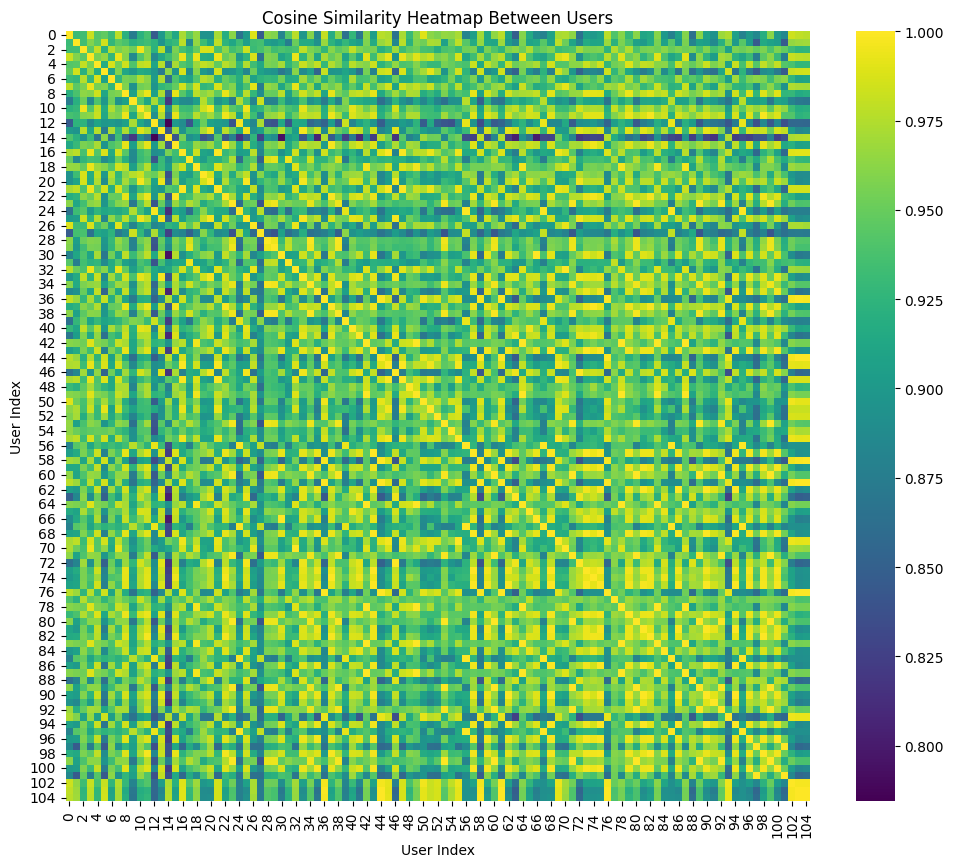

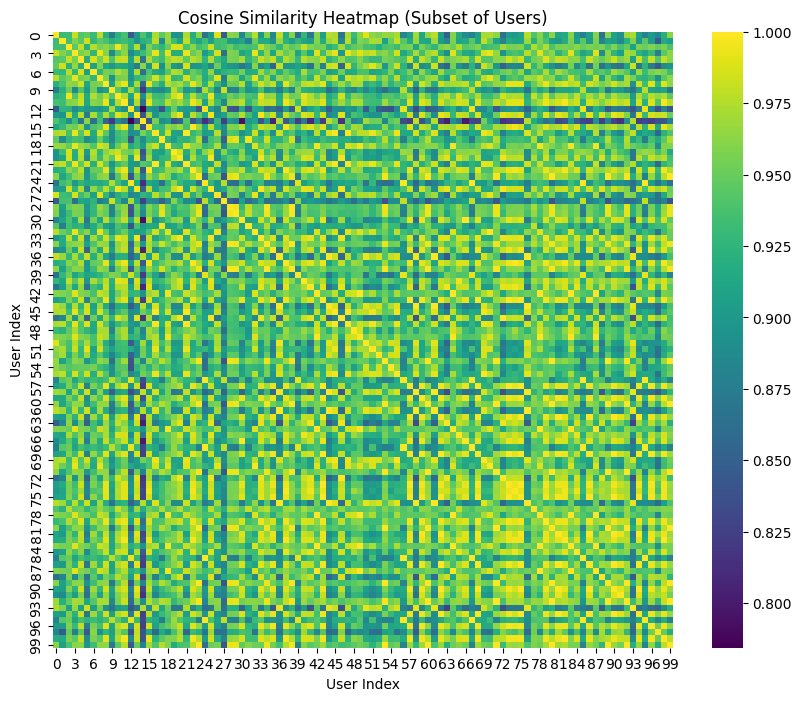

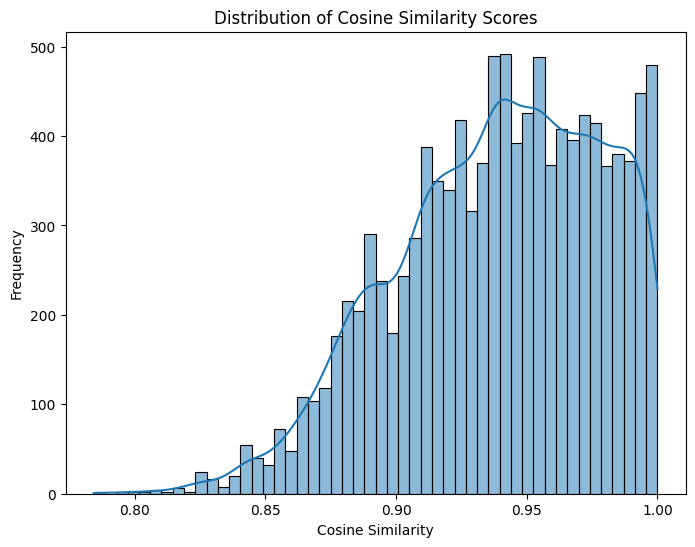

In [ ]:
# Select the features you want to use for similarity calculation
# Exclude non-numeric or target columns if they are not relevant for similarity
features_for_similarity = df[numerical_features] # Using numerical features as identified before

# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(features_for_similarity)

# Convert to DataFrame for easier visualization
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=df.index, columns=df.index)

# Visualize the similarity matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cosine_sim_df, cmap='viridis', annot=False) # annot=False for large matrices
plt.title('Cosine Similarity Heatmap Between Users')
plt.xlabel('User Index')
plt.ylabel('User Index')
plt.show()

# Optional: Visualize a subset for better readability if the dataset is very large
if len(df) > 100: # Example: visualize only the first 100 users
    subset_indices = range(100)
    cosine_sim_subset = cosine_sim_df.iloc[subset_indices, subset_indices]
    plt.figure(figsize=(10, 8))
    sns.heatmap(cosine_sim_subset, cmap='viridis', annot=False)
    plt.title('Cosine Similarity Heatmap (Subset of Users)')
    plt.xlabel('User Index')
    plt.ylabel('User Index')
    plt.show()

# Analyze the distribution of similarity scores
# This helps understand if there are generally high or low similarities
plt.figure(figsize=(8, 6))
sns.histplot(cosine_sim_matrix.flatten(), bins=50, kde=True)
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()

## Dimensionality reduction preview

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


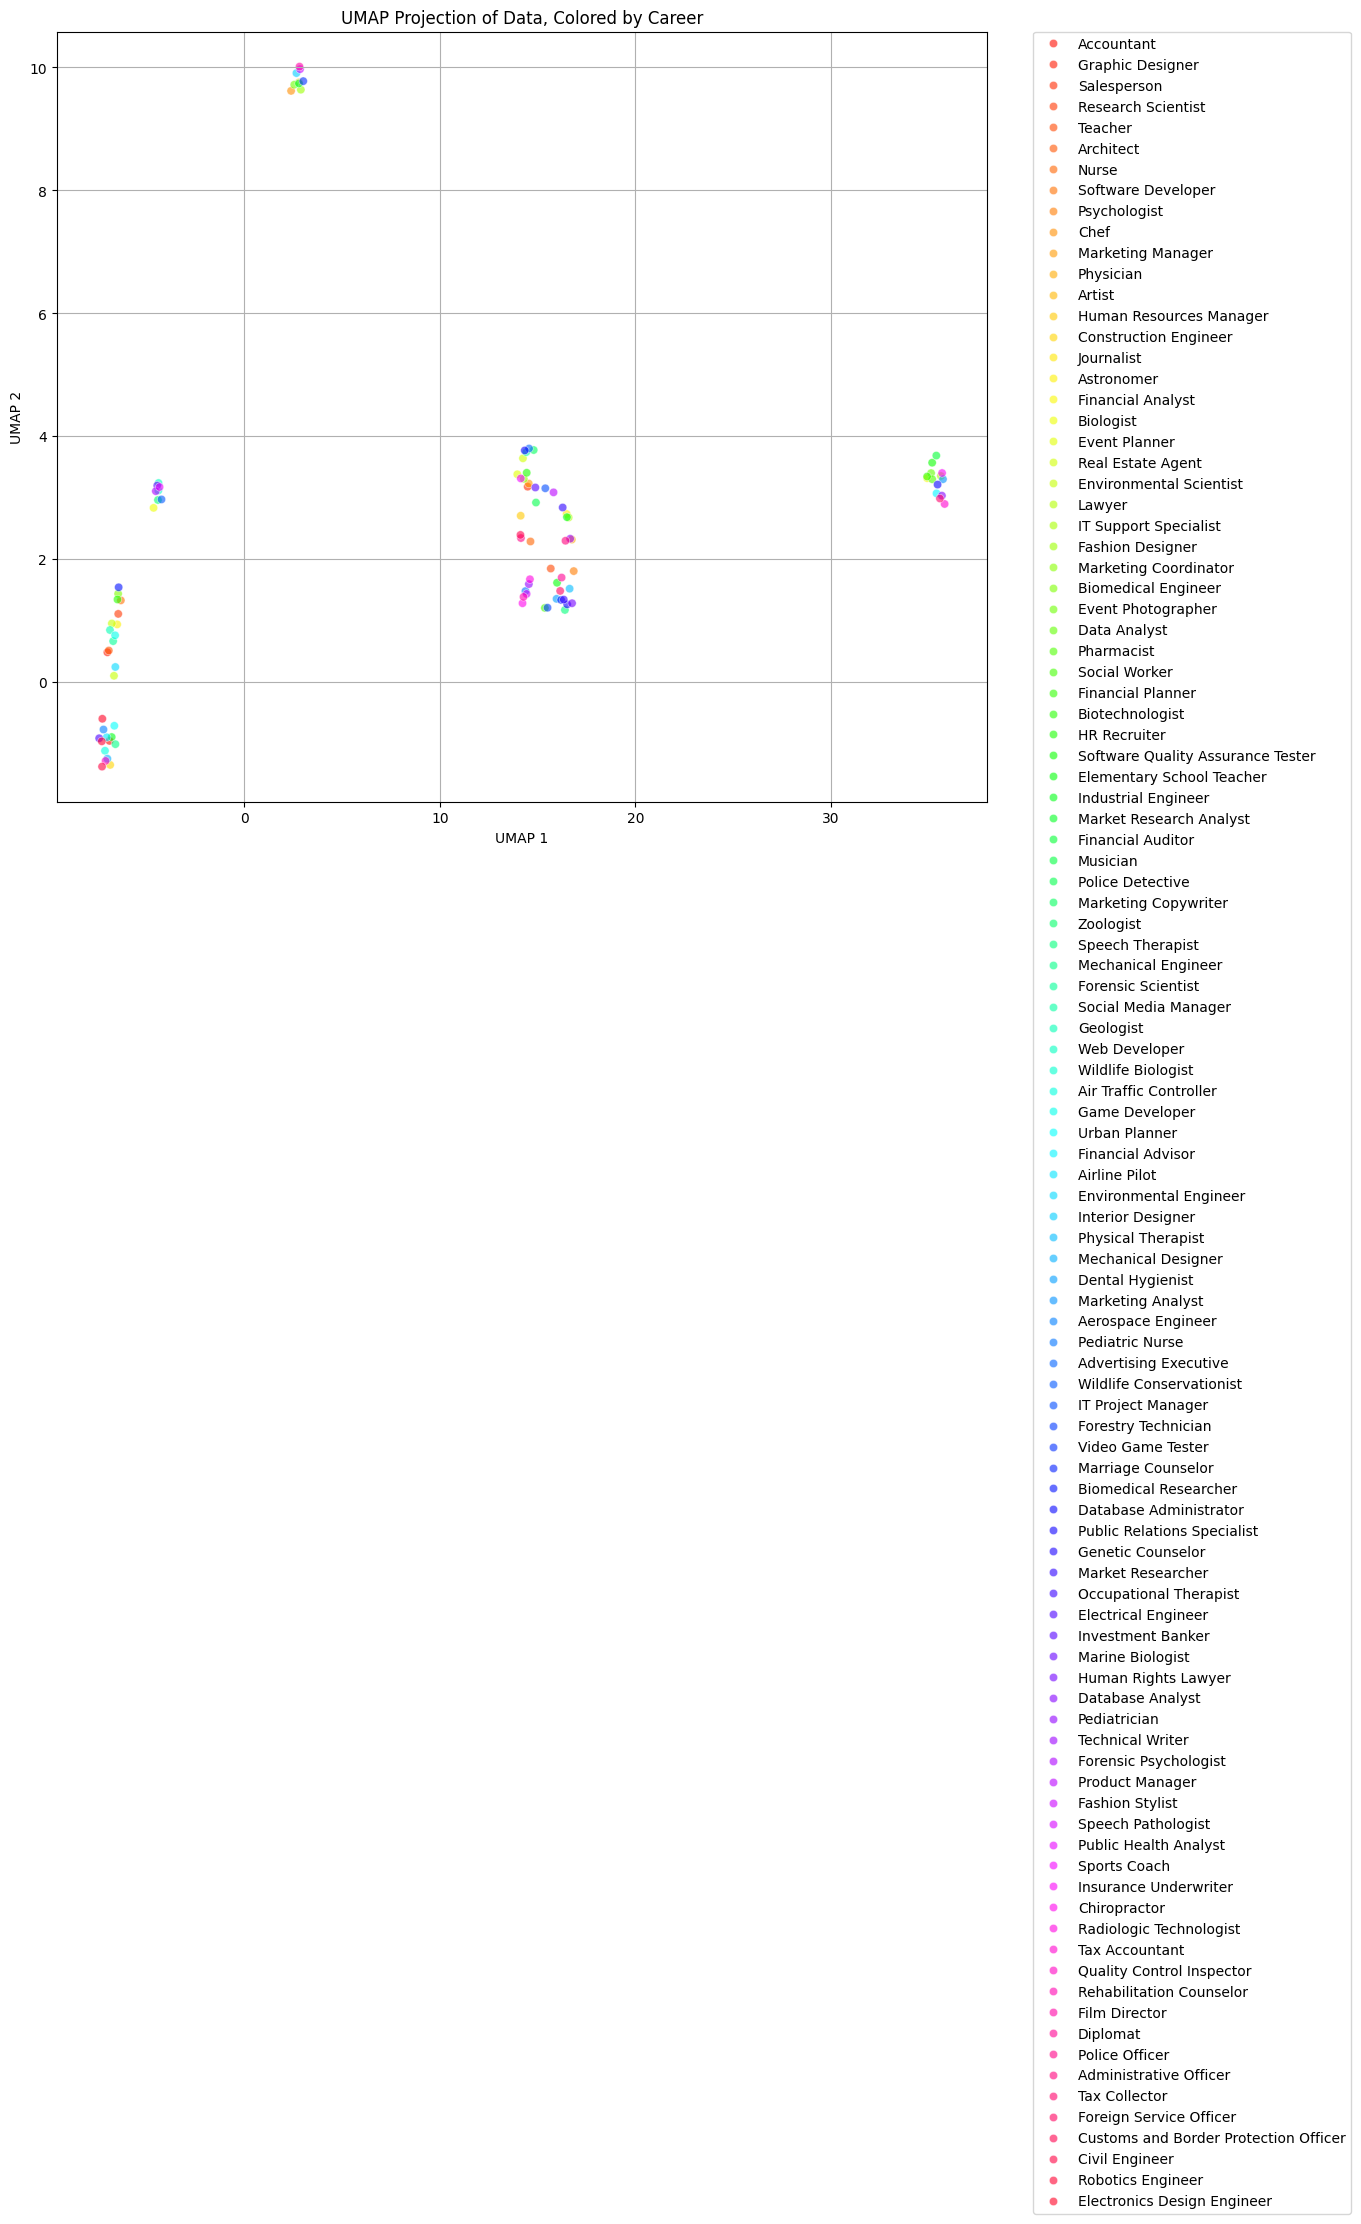


--- UMAP Plot Interpretation ---
Observe the scatter plot:
- If points of the same color (career) tend to cluster together and are visually distinct from other colors, it suggests the features allow for separation/clustering of careers.
- If points of different colors are highly mixed and overlapping, it suggests the features do not clearly separate the careers based on personality/aptitude.
This visualization helps preview whether a clustering or classification approach based on these features is likely to be effective.
------------------------------


In [ ]:
# Separate features and target
if 'Career' in df.columns:
    X = df.drop('Career', axis=1)
    y = df['Career']
else:
    # Handle case where 'Career' is not present, e.g., use all numerical features and skip coloring by label
    print("Column 'Career' not found. UMAP plot will not be colored by label.")
    X = df[numerical_features]
    y = None # No target label for coloring

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply UMAP
# You might need to adjust n_neighbors and min_dist based on your data characteristics
# n_components=2 for a 2D plot
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(X_scaled)

# Create a DataFrame for the embedding
embedding_df = pd.DataFrame(embedding, columns=['UMAP_1', 'UMAP_2'])

# Plot the 2D scatter plot
plt.figure(figsize=(12, 10))

if y is not None:
    # Plot colored by label
    sns.scatterplot(
        x='UMAP_1',
        y='UMAP_2',
        hue=y, # Color by the target variable
        palette=sns.color_palette("hsv", len(y.unique())), # Use a distinct color palette
        data=embedding_df,
        legend="full",
        alpha=0.6 # Add some transparency
    )
    plt.title('UMAP Projection of Data, Colored by Career')
    # Optionally move the legend outside the plot for many classes
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
else:
    # Plot without coloring
    sns.scatterplot(
        x='UMAP_1',
        y='UMAP_2',
        data=embedding_df,
        alpha=0.6
    )
    plt.title('UMAP Projection of Data')


plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

# Interpretation guidance:
print("\n--- UMAP Plot Interpretation ---")
print("Observe the scatter plot:")
if y is not None:
    print("- If points of the same color (career) tend to cluster together and are visually distinct from other colors, it suggests the features allow for separation/clustering of careers.")
    print("- If points of different colors are highly mixed and overlapping, it suggests the features do not clearly separate the careers based on personality/aptitude.")
    print("This visualization helps preview whether a clustering or classification approach based on these features is likely to be effective.")
else:
    print("- Observe if points form distinct groups or if they appear as a continuous blob.")
    print("This visualization helps understand the underlying structure of the data in 2D space.")
print("------------------------------")

# Note: PCA can also be used (sklearn.decomposition.PCA), but UMAP often preserves local structure better,
# which can be more indicative of clusterability. To use PCA, replace the UMAP steps with:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2, random_state=42)
# pca_embedding = pca.fit_transform(X_scaled)
# pca_embedding_df = pd.DataFrame(pca_embedding, columns=['PCA_1', 'PCA_2'])
# Plot using pca_embedding_df instead of embedding_df.

## Leakage scan

In [ ]:
print("\n--- Leakage Scan ---")

# Define the target variable column name
target_column = 'Career'

if target_column not in df.columns:
    print(f"Error: Target column '{target_column}' not found in the DataFrame.")
else:
    print(f"Checking for potential data leakage related to the target column '{target_column}'...")

    # Iterate through all columns except the target column
    feature_columns = [col for col in df.columns if col != target_column]

    # Check for columns that are strongly correlated with the target (if target is numerical or ordinal)
    # This is more relevant if the target is numerical, but for categorical targets,
    # we can look for features that are essentially identifiers or direct consequences of the target.

    # For a categorical target like 'Career', direct correlation doesn't apply in the same way as numerical.
    # We look for features that might *uniquely identify* a target class or are *derived* from the target.

    potential_leakage_columns = []

    for col in feature_columns:
        # Simple check: Are there columns that perfectly predict the target?
        # This is a strong indicator of leakage.
        if len(df[col].unique()) == len(df[target_column].unique()):
             # Check if there's a one-to-one mapping (this is a basic check)
             # A more robust check would involve analyzing the relationship more deeply
             # (e.g., if grouping by feature produces unique target values)
             # For simplicity, we'll just flag columns with the same number of unique values
             # as this can sometimes indicate an identifier column.
            grouped = df.groupby(col)[target_column].nunique()
            if all(grouped == 1):
                 potential_leakage_columns.append(col)


    if potential_leakage_columns:
        print("\nPotential leakage detected in the following columns:")
        for col in potential_leakage_columns:
            print(f"- '{col}': This column has a strong relationship with the target, potentially uniquely identifying classes.")
        print("\nConsider excluding these columns from your training data or further investigation is required to confirm if it's true leakage or a highly predictive feature.")
    else:
        print("\nNo obvious signs of data leakage detected based on a simple unique value count and grouping check.")
        print("Note: This is a basic check. More subtle forms of leakage (e.g., time-series leakage, data processing errors) may not be caught.")

print("--------------------")


--- Leakage Scan ---
Checking for potential data leakage related to the target column 'Career'...

No obvious signs of data leakage detected based on a simple unique value count and grouping check.
Note: This is a basic check. More subtle forms of leakage (e.g., time-series leakage, data processing errors) may not be caught.
--------------------


## Profiling

In [ ]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("baseline_documentation.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:00<00:00, 59.25it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Document assumptions

Asumsi tentang data dan fitur:
1. Fitur Range:
   - Kolom yang mewakili skor OCEAN (e.g., 'Openness', 'Conscientiousness', dll.) diharapkan berada dalam rentang nilai tertentu, kemungkinan skala 1-5 atau 1-7, sesuai dengan kuesioner standar.
   - Kolom 'Aptitude Score' diharapkan mewakili skor kumulatif atau rata-rata dari tes bakat, dengan rentang nilai yang lebih luas, mungkin 0-100 atau serupa, tergantung pada metodologi penilaian.
   - Penting untuk memvalidasi rentang ini setelah memuat data untuk memastikan tidak ada nilai di luar ekspektasi yang memerlukan penanganan (misalnya, kesalahan input data).
2. Maks/Min:
   - Nilai maksimum dan minimum dari fitur-fitur numerik ('Openness', 'Conscientiousness', dll., 'Aptitude Score') harus masuk akal dalam konteks skala pengukuran yang digunakan.
   - Jika ada nilai ekstrem (outlier) yang jauh di luar rentang yang diharapkan, ini mungkin mengindikasikan kesalahan data atau kasus khusus yang perlu diinvestigasi. Boxplots dan deskripsi statistik sudah menunjukkan adanya outlier pada beberapa fitur.
3. Expected Distribution:
   - Distribusi skor kepribadian (OCEAN) pada populasi umum cenderung mengikuti distribusi normal atau mendekati normal. Dalam dataset ini, kita dapat memeriksa apakah distribusi fitur-fitur OCEAN mendekati pola ini atau ada bias tertentu dalam sampel. Histogram sudah membantu visualisasi ini.
   - Distribusi 'Aptitude Score' mungkin bervariasi tergantung pada populasi sampel dan jenis tes yang digunakan, tetapi seringkali juga memiliki kecenderungan sentral.
   - Distribusi kelas target ('Career') sangat tidak seimbang, seperti yang ditunjukkan oleh countplot dan rasio ketidakseimbangan kelas. Ini adalah asumsi penting yang akan memengaruhi pilihan algoritma dan metrik evaluasi (misalnya, akurasi mungkin bukan metrik terbaik).
4. Hubungan Fitur:
   - Diharapkan ada beberapa korelasi antara fitur-fitur kepribadian dan/atau skor bakat. Matriks korelasi telah membantu memvalidasi ini. Korelasi yang sangat tinggi antar fitur (multikolinearitas) perlu dipertimbangkan, meskipun tidak ada korelasi > 0.8 yang terdeteksi pada EDA.
   - Diharapkan fitur-fitur ini secara kolektif memiliki kemampuan untuk membedakan antara kelas karir yang berbeda, meskipun UMAP plot menunjukkan tumpang tindih yang signifikan antar kelas. Ini mengindikasikan bahwa pemisahan linear mungkin sulit dan KNN/Cosine Similarity mungkin bergantung pada kedekatan dalam ruang fitur yang kompleks.
5. Data Cleaning:
   - Diasumsikan bahwa data telah melalui proses cleaning dasar (misalnya, menangani missing values atau duplikat) atau akan dilakukan sebagai bagian dari preprocessing. EDA telah menunjukkan tidak ada missing values atau duplikat, yang menyederhanakan langkah ini.
6. Fitur Non-Numerik:
   - Diasumsikan kolom 'Career' adalah label target kategorikal dan akan ditangani sesuai dengan itu (misalnya, dengan encoding) jika diperlukan untuk algoritma tertentu.
   - Diasumsikan tidak ada fitur kategorikal lain yang memerlukan encoding, berdasarkan output df.info() yang hanya menunjukkan int64 dan object (untuk 'Career'). Jika ada fitur objek lain, asumsi ini perlu direvisi.
7. Konteks Dataset:
   - Diasumsikan dataset ini berasal dari kuesioner standar OCEAN dan tes bakat yang valid, dan 'Career' adalah label yang relevan dan akurat yang terkait dengan profil kepribadian dan bakat tersebut. Tanpa informasi detail tentang pengumpulan data, ini adalah asumsi penting tentang kualitas dan relevansi data.

In [ ]:
print("\n--- Assumptions Documented ---")


--- Assumptions Documented ---


## --- Kesimpulan Exploratory Data Analysis (EDA) ---

**1. Dataset Overview:**
- Dataset terdiri dari 105 baris dan 11 kolom.
- Tidak ada nilai yang hilang (missing values) dan tidak ada baris duplikat, menunjukkan data yang bersih dari awal.
- Fitur-fitur numerik utama tampaknya terkait dengan skor kepribadian (OCEAN) dan Aptitude Score.

**2. Class Distribution ('Career'):**
- Kolom target 'Career' memiliki 104 kelas unik, yang menunjukkan tugas klasifikasi multi-kelas dengan banyak kategori.
- Terdapat ketidakseimbangan kelas yang signifikan, dengan beberapa karir sangat dominan dan yang lain sangat jarang.
- Rasio ketidakseimbangan kelas (Mayoritas/Minoritas) adalah sekitar 2.00, yang mengindikasikan perlunya perhatian khusus selama pemodelan (misalnya, menggunakan metrik evaluasi yang tepat selain akurasi, atau teknik penanganan ketidakseimbangan kelas).

**3. Feature Distribution:**
- Histograms dan boxplots dari fitur numerik menunjukkan distribusi yang bervariasi. Beberapa fitur mungkin mendekati distribusi normal (seperti beberapa skor OCEAN), sementara yang lain mungkin memiliki skew atau outlier.
- Outlier terdeteksi pada beberapa fitur numerik berdasarkan boxplots. Keputusan untuk menangani outlier ini akan bergantung pada algoritma yang digunakan dan dampaknya pada kinerja model.

**4. Correlation Analysis:**
- Matriks korelasi menunjukkan hubungan antar fitur numerik.
- Tidak ditemukan pasangan fitur yang berkorelasi sangat tinggi (|>0.8|), yang mengurangi kekhawatiran tentang multikolinearitas ekstrem di antara fitur-fitur yang diperiksa.

**5. Similarity Visualization (Cosine Similarity & UMAP):**
- Heatmap Cosine Similarity menunjukkan tingkat kesamaan antar pengguna berdasarkan fitur yang dipilih. Distribusi skor kesamaan menunjukkan sebagian besar pasangan pengguna memiliki tingkat kesamaan yang moderat.
- UMAP plot (reduksi dimensi ke 2D) mengindikasikan adanya tumpang tindih yang signifikan antar kelas karir yang berbeda dalam ruang fitur yang diproyeksikan. Ini menyarankan bahwa pemisahan linear antara karir berdasarkan fitur-fitur ini mungkin sulit, dan algoritma berbasis kedekatan seperti KNN atau Cosine Similarity akan mengandalkan struktur lokal dalam ruang fitur.

**6. Potential Leakage Scan:**
- Pemeriksaan dasar untuk kebocoran data (leakage) berdasarkan jumlah nilai unik dan grouping tidak menunjukkan indikasi kebocoran yang jelas.
- Namun, perlu diingat bahwa ini adalah pemeriksaan sederhana, dan bentuk kebocoran yang lebih kompleks mungkin tidak terdeteksi.

**7. Profiling Report:**
- Laporan Profiling (`baseline_documentation.html`) memberikan ringkasan yang lebih mendalam tentang setiap kolom, termasuk statistik deskriptif, distribusi, korelasi, dan interaksi antar fitur.

**Kesimpulan Akhir EDA:**
Dataset ini memiliki karakteristik yang relevan untuk membangun sistem rekomendasi karir berbasis kepribadian dan bakat.
Tantangan utama meliputi jumlah kelas target yang besar dan ketidakseimbangan kelas yang signifikan.
Analisis visual (UMAP) menyarankan bahwa karir mungkin tidak sepenuhnya terpisah dalam ruang fitur, yang relevan untuk interpretasi hasil dari algoritma berbasis kedekatan seperti KNN dan Cosine Similarity.
Dataset relatif bersih dari missing values dan duplikat.
Langkah selanjutnya harus mencakup pra-pemrosesan data yang sesuai (misalnya, standardisasi fitur, menangani ketidakseimbangan kelas jika diperlukan), pemilihan algoritma (KNN dan Cosine Similarity), implementasi, dan evaluasi model dengan metrik yang tepat mengingat ketidakseimbangan kelas (misalnya, precision, recall, F1-score, atau metrik berbasis ranking seperti MAP).
----------------------------------------------------

# 4. Preprocessing

## Feature Scaling

Original Data:
   O_score  C_score  E_score  A_score  N_score  Numerical Aptitude  \
0     5.45     8.67     3.45     5.34     4.23                9.23   
1     8.78     5.67     4.56     6.45     4.23                5.12   
2     6.12     6.78     9.34     7.56     5.01                6.23   
3     9.12     8.78     4.23     5.67     4.56                7.89   
4     6.45     7.56     5.67     9.12     4.23                5.34   

   Spatial Aptitude  Perceptual Aptitude  Abstract Reasoning  Verbal Reasoning  
0              4.56                 6.78                7.89              6.12  
1              8.45                 7.89                6.34              6.01  
2              4.23                 6.45                6.67              8.45  
3              5.34                 6.45                9.34              7.67  
4              4.01                 6.23                5.78              8.67  

Scaled Data (StandardScaler):
    O_score   C_score   E_score   A_score   N_s

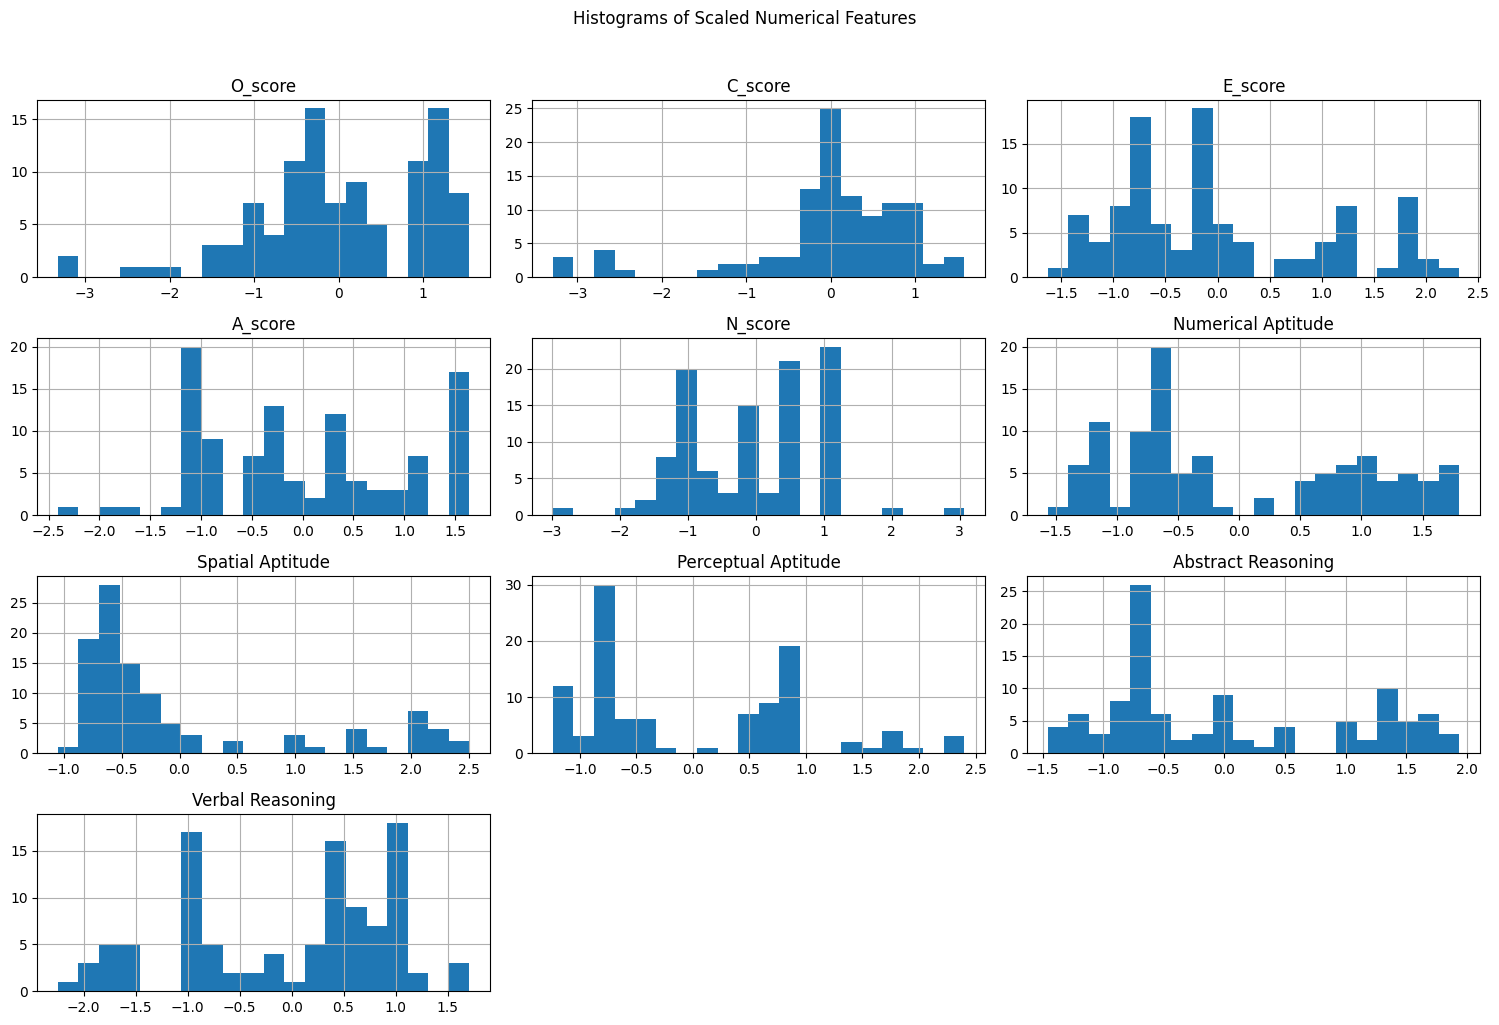

In [ ]:
# Select numerical features for scaling
# Exclude the target variable 'Career' and any potential ID columns if they exist and are not needed for distance calculations
numerical_features_for_scaling = [col for col in numerical_features if col != 'Career']

# Ensure df_scaled only contains numerical features and is a copy to avoid SettingWithCopyWarning
df_scaled = df[numerical_features_for_scaling].copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected numerical features
df_scaled[numerical_features_for_scaling] = scaler.fit_transform(df_scaled[numerical_features_for_scaling])

print("Original Data:")
print(df[numerical_features_for_scaling].head())

print("\nScaled Data (StandardScaler):")
print(df_scaled.head())

# You can also visualize the distribution after scaling to see the effect
# For example, plot histograms of scaled features
print("\nGenerating Histograms of Scaled Features...")
df_scaled[numerical_features_for_scaling].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Scaled Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

# If outliers were a major concern and StandardScaler is sensitive to them,
# you might consider RobustScaler which scales features using statistics that are robust to outliers.
# from sklearn.preprocessing import RobustScaler
# robust_scaler = RobustScaler()
# df_robust_scaled = df[numerical_features_for_scaling].copy()
# df_robust_scaled[numerical_features_for_scaling] = robust_scaler.fit_transform(df_robust_scaled[numerical_features_for_scaling])
# print("\nScaled Data (RobustScaler):")
# print(df_robust_scaled.head())

## Encode Label Career

In [ ]:
career2id = {career: id for id, career in enumerate(df['Career'].unique())}
id2career = {id: career for career, id in career2id.items()}

df['Career_encoded'] = df['Career'].map(career2id)

print("\nCareer to ID mapping:")
print(career2id)

print("\nID to Career mapping:")
print(id2career)

print("\nDataFrame with encoded 'Career' column:")
print(df[['Career', 'Career_encoded']].head())

# Check the distribution of the new encoded column
print("\nDistribution of encoded 'Career' column:")
print(df['Career_encoded'].value_counts())


Career to ID mapping:
{'Accountant': 0, 'Graphic Designer': 1, 'Salesperson': 2, 'Research Scientist': 3, 'Teacher': 4, 'Architect': 5, 'Nurse': 6, 'Software Developer': 7, 'Psychologist': 8, 'Chef': 9, 'Marketing Manager': 10, 'Physician': 11, 'Artist': 12, 'Human Resources Manager': 13, 'Construction Engineer': 14, 'Journalist': 15, 'Astronomer': 16, 'Financial Analyst': 17, 'Biologist': 18, 'Event Planner': 19, 'Real Estate Agent': 20, 'Environmental Scientist': 21, 'Lawyer': 22, 'IT Support Specialist': 23, 'Fashion Designer': 24, 'Marketing Coordinator': 25, 'Biomedical Engineer': 26, 'Event Photographer': 27, 'Data Analyst': 28, 'Pharmacist': 29, 'Social Worker': 30, 'Financial Planner': 31, 'Biotechnologist': 32, 'HR Recruiter': 33, 'Software Quality Assurance Tester': 34, 'Elementary School Teacher': 35, 'Industrial Engineer': 36, 'Market Research Analyst': 37, 'Financial Auditor': 38, 'Musician': 39, 'Police Detective': 40, 'Marketing Copywriter': 41, 'Zoologist': 42, 'Speech

## Career Clustering

In [ ]:
X_cluster = df_scaled.copy()

### Determine the optimal number of clusters (k)

In [ ]:
# We will use Elbow Method, Silhouette Score, and Davies-Bouldin Index

# Range of k to test (adjust based on the expected number of clusters)
# A reasonable range could be from 2 up to sqrt(n_samples) or a number related to the number of unique careers
# Given we have 104 unique careers, clustering might group similar careers.
# Let's test a range, e.g., 2 to 20 or slightly more if needed.
k_range = range(2, 21) # Testing k from 2 to 20

# Lists to store evaluation scores
inertia = [] # For Elbow Method (Within-cluster sum of squares)
silhouette_scores = []
db_scores = [] # Davies-Bouldin Index

print("\nPerforming K-Means clustering for different values of k...")

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init to suppress warning
    kmeans.fit(X_cluster)

    # Store inertia
    inertia.append(kmeans.inertia_)

    # Calculate Silhouette Score (requires at least 2 clusters)
    if k > 1:
        silhouette_avg = silhouette_score(X_cluster, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(np.nan) # Append NaN for k=1 as score is undefined

    # Calculate Davies-Bouldin Index (requires at least 2 clusters)
    if k > 1:
        db_index = davies_bouldin_score(X_cluster, kmeans.labels_)
        db_scores.append(db_index)
    else:
         db_scores.append(np.nan) # Append NaN for k=1 as index is undefined




Performing K-Means clustering for different values of k...


### Visualize and determine the best k


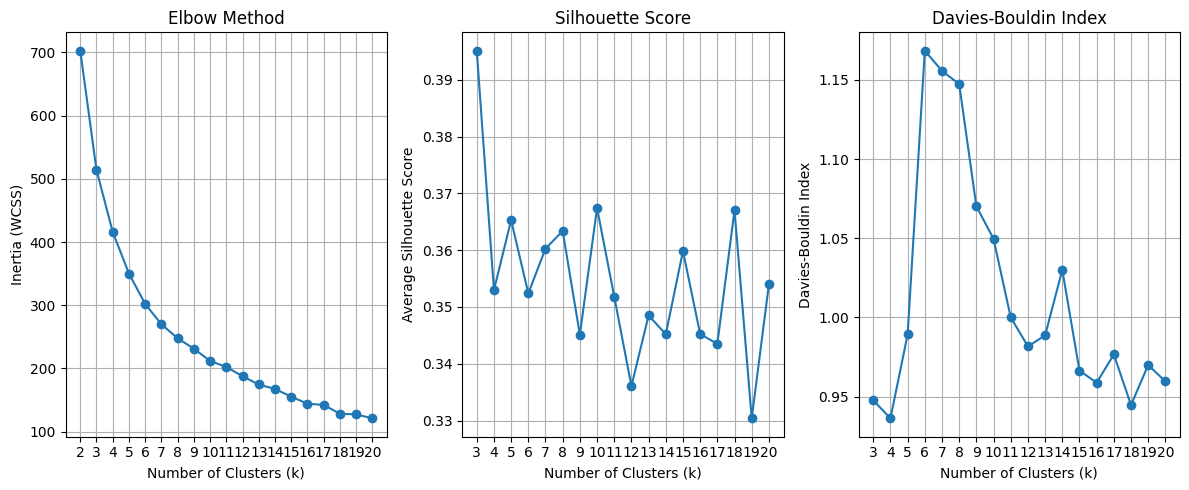


--- K-Means Evaluation Results ---
Best k based on highest Silhouette Score: k = 3 (Score: 0.3951)
Best k based on lowest Davies-Bouldin Index: k = 4 (Score: 0.9363)
Please examine the plots (Elbow, Silhouette, DB Index) to make the final decision on the best k.
Look for the 'elbow' point in the Inertia plot, the peak in the Silhouette plot, and the trough in the Davies-Bouldin plot.
----------------------------------


In [ ]:
# Elbow Method Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(k_range)
plt.grid(True)

# Silhouette Score Plot
plt.subplot(1, 3, 2)
# Adjust k_range for plotting Silhouette and DB scores (start from k=2)
plt.plot(list(k_range)[1:], silhouette_scores[1:], marker='o') # Corrected indexing
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.xticks(list(k_range)[1:]) # Corrected indexing
plt.grid(True)

# Davies-Bouldin Index Plot (Lower is better)
plt.subplot(1, 3, 3)
plt.plot(list(k_range)[1:], db_scores[1:], marker='o') # Corrected indexing
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(list(k_range)[1:]) # Corrected indexing
plt.grid(True)

plt.tight_layout()
plt.show()

# Display best k based on metrics (subjective interpretation of plots is needed)
# For demonstration, let's identify k with highest silhouette and lowest DB index
# Note: This is just finding the peak/trough in the computed range,
# the actual 'best' k should be chosen considering all plots and domain knowledge.

# Find k with highest silhouette score
best_silhouette_k = list(k_range)[1:][silhouette_scores[1:].index(max([s for s in silhouette_scores[1:] if not np.isnan(s)]))] if any(not np.isnan(s) for s in silhouette_scores[1:]) else None
best_silhouette_score = max([s for s in silhouette_scores[1:] if not np.isnan(s)]) if any(not np.isnan(s) for s in silhouette_scores[1:]) else None


# Find k with lowest Davies-Bouldin Index
# Exclude NaN values when finding min
valid_db_scores = [db for db in db_scores[1:] if not np.isnan(db)]
if valid_db_scores:
    best_db_k_index = db_scores[1:].index(min(valid_db_scores))
    best_db_k = list(k_range)[1:][best_db_k_index]
    best_db_score = min(valid_db_scores)
else:
    best_db_k = None
    best_db_score = None


print("\n--- K-Means Evaluation Results ---")
if best_silhouette_k is not None:
    print(f"Best k based on highest Silhouette Score: k = {best_silhouette_k} (Score: {best_silhouette_score:.4f})")
if best_db_k is not None:
     print(f"Best k based on lowest Davies-Bouldin Index: k = {best_db_k} (Score: {best_db_score:.4f})")
print("Please examine the plots (Elbow, Silhouette, DB Index) to make the final decision on the best k.")
print("Look for the 'elbow' point in the Inertia plot, the peak in the Silhouette plot, and the trough in the Davies-Bouldin plot.")
print("----------------------------------")

Dari hasil evaluasi K-Means untuk menentukan jumlah klaster (k) terbaik, didapatkan observasi berikut:

-   **Elbow Method:** Plot Inertia menunjukkan "siku" (elbow) yang cukup jelas pada nilai k = 4 atau 5. Ini menandakan bahwa penambahan klaster setelah titik ini memberikan pengurangan Inertia yang semakin kecil, menyarankan bahwa 4 atau 5 adalah jumlah klaster yang relatif optimal.
-   **Silhouette Score:** Skor Siluet tertinggi mencapai puncaknya pada k = 3 dengan skor 0.3951. Skor Siluet mengukur seberapa mirip sebuah objek dengan klaster sendiri dibandingkan dengan klaster lain. Nilai yang lebih tinggi (mendekati 1) menunjukkan klaster yang padat dan terpisah dengan baik. Skor 0.3951 menunjukkan struktur klaster yang moderat.
-   **Davies-Bouldin Index:** Indeks Davies-Bouldin terendah (yang diinginkan) ditemukan pada k = 4 dengan skor 0.9363. Indeks ini mengukur rasio dispersi dalam klaster dengan jarak antar klaster. Nilai yang lebih rendah (mendekati 0) menunjukkan klaster yang lebih baik (terpisah dengan baik dan padat di dalamnya).

**Kesimpulan Rekomendasi K Terbaik:**

Berdasarkan gabungan ketiga metrik:

1.  **Elbow Method** dan **Davies-Bouldin Index** sama-sama menunjukkan bahwa **k = 4** adalah pilihan yang kuat sebagai jumlah klaster optimal.
2.  **Silhouette Score** menyarankan **k = 3**, meskipun skornya moderat.

Meskipun ada sedikit perbedaan, **k = 4** muncul sebagai kandidat yang paling konsisten didukung oleh dua dari tiga metrik (Elbow dan Davies-Bouldin Index). Oleh karena itu, **k = 4** adalah rekomendasi yang paling didukung data untuk jumlah klaster dalam analisis ini. Keputusan akhir dapat bergantung pada interpretasi visual plot dan konteks domain yang relevan.

### Run K-Means with the chosen optimal k

In [ ]:

# Based on the plots and interpretation, choose the 'best_k'.
# For example, let's assume based on the plots, k=5 seems reasonable.
# You should replace this with your chosen k after examining the plots.
# chosen_best_k = 5 # Example: Replace with the k you choose

# --- Assign cluster labels ---
# Choose the optimal k based on your analysis of the plots.
# Let's assume you decide that k=10 is a good balance based on the evaluation.
# Replace `optimal_k` with the value you choose.
# Example choice (adjust based on your plot interpretation):
# One common approach is to look for consensus among metrics or choose k where the elbow is clear.
# Let's pick a value for demonstration, e.g., k=10 or the one suggested by Silhouette/DB if they are clear.

# Example: Use the k suggested by Silhouette score for demonstration, or choose manually
optimal_k = 4

print(f"\nAssigning cluster labels using K-Means with k = {optimal_k}")

# Run K-Means with the chosen optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Career_Cluster'] = final_kmeans.fit_predict(X_cluster)

print("\nDataFrame with 'Career_Cluster' column:")
print(df[['Career', 'Career_encoded', 'Career_Cluster']].head())

# Check the distribution of careers within each cluster
print(f"\nDistribution of Careers within each of the {optimal_k} clusters:")
cluster_career_distribution = df.groupby('Career_Cluster')['Career'].value_counts().unstack(fill_value=0)
print(cluster_career_distribution)




Assigning cluster labels using K-Means with k = 4

DataFrame with 'Career_Cluster' column:
               Career  Career_encoded  Career_Cluster
0          Accountant               0               1
1    Graphic Designer               1               1
2         Salesperson               2               2
3  Research Scientist               3               1
4             Teacher               4               2

Distribution of Careers within each of the 4 clusters:
Career          Accountant  Administrative Officer  Advertising Executive  \
Career_Cluster                                                              
0                        0                       0                      0   
1                        1                       0                      0   
2                        0                       1                      1   
3                        0                       0                      0   

Career          Aerospace Engineer  Air Traffic Controller  Airli

In [ ]:
# --- Save mapping career -> cluster ---
# We need to create a mapping from each original Career label to its assigned cluster label.
# Since a single career might potentially be split across multiple clusters (due to variations in personality/aptitude within that career group),
# a simple one-to-one mapping might not be perfectly accurate.
# However, for a 2-level recommender, we might want a representative cluster for each career.
# One way is to map each unique career to the *most frequent* cluster assigned to instances of that career.

career_to_cluster_mapping = {}
for career in df['Career'].unique():
    # Get instances for this career
    career_df = df[df['Career'] == career]
    if not career_df.empty:
        # Find the most frequent cluster for this career
        most_frequent_cluster = career_df['Career_Cluster'].mode()
        if not most_frequent_cluster.empty:
            # mode() can return multiple values if counts are tied, just take the first one
            career_to_cluster_mapping[career] = most_frequent_cluster[0]
        else:
             # Handle cases where mode is empty (shouldn't happen with mode() on non-empty series)
             career_to_cluster_mapping[career] = -1 # Assign a placeholder indicating no dominant cluster

print("\nMapping from Career to Representative Cluster:")
print(career_to_cluster_mapping)

# Convert the mapping to a DataFrame or save it if needed for the recommender
career_cluster_map_df = pd.DataFrame(list(career_to_cluster_mapping.items()), columns=['Career', 'Representative_Cluster'])
print("\nCareer to Cluster Mapping DataFrame:")
print(career_cluster_map_df)

# You can save this mapping for later use, e.g., as a CSV or JSON
# career_cluster_map_df.to_csv('career_to_cluster_mapping.csv', index=False)
# print("\nCareer to cluster mapping saved to 'career_to_cluster_mapping.csv'")

print("\n--- Career Clustering Complete ---")


Mapping from Career to Representative Cluster:
{'Accountant': np.int32(1), 'Graphic Designer': np.int32(1), 'Salesperson': np.int32(2), 'Research Scientist': np.int32(1), 'Teacher': np.int32(2), 'Architect': np.int32(1), 'Nurse': np.int32(2), 'Software Developer': np.int32(1), 'Psychologist': np.int32(2), 'Chef': np.int32(0), 'Marketing Manager': np.int32(2), 'Physician': np.int32(2), 'Artist': np.int32(0), 'Human Resources Manager': np.int32(2), 'Construction Engineer': np.int32(1), 'Journalist': np.int32(2), 'Astronomer': np.int32(1), 'Financial Analyst': np.int32(3), 'Biologist': np.int32(1), 'Event Planner': np.int32(2), 'Real Estate Agent': np.int32(2), 'Environmental Scientist': np.int32(1), 'Lawyer': np.int32(2), 'IT Support Specialist': np.int32(3), 'Fashion Designer': np.int32(0), 'Marketing Coordinator': np.int32(2), 'Biomedical Engineer': np.int32(1), 'Event Photographer': np.int32(0), 'Data Analyst': np.int32(3), 'Pharmacist': np.int32(3), 'Social Worker': np.int32(2), 'Fi

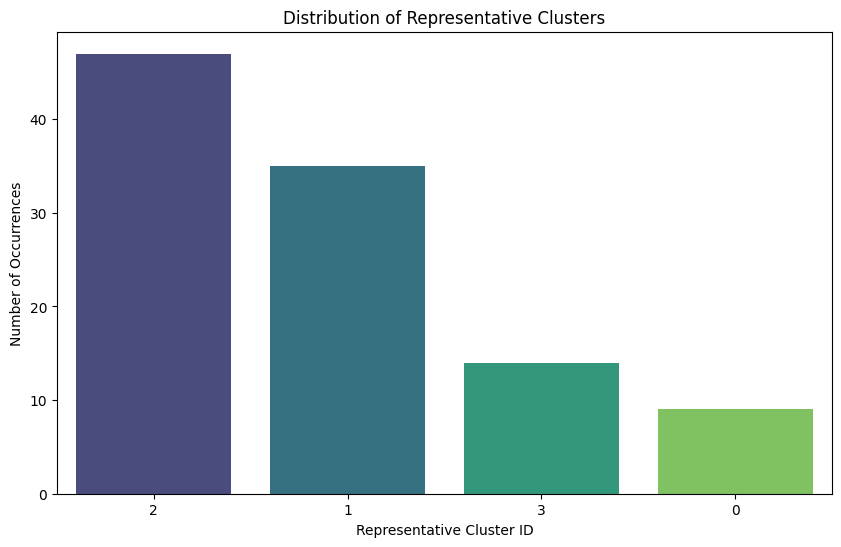


Distribution of Representative Clusters:
Representative_Cluster
2    47
1    35
3    14
0     9
Name: count, dtype: int64


In [ ]:
df = df.merge(career_cluster_map_df, on='Career', how='left')

# Plot the distribution of the new 'Representative_Cluster' column
if 'Representative_Cluster' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Representative_Cluster', order=df['Representative_Cluster'].value_counts().index, palette='viridis')
    plt.title('Distribution of Representative Clusters')
    plt.xlabel('Representative Cluster ID')
    plt.ylabel('Number of Occurrences')
    plt.xticks(rotation=0) # Keep labels horizontal
    plt.show()

    print("\nDistribution of Representative Clusters:")
    print(df['Representative_Cluster'].value_counts())

else:
    print("Column 'Representative_Cluster' not found in the DataFrame. Please ensure the mapping was merged correctly.")

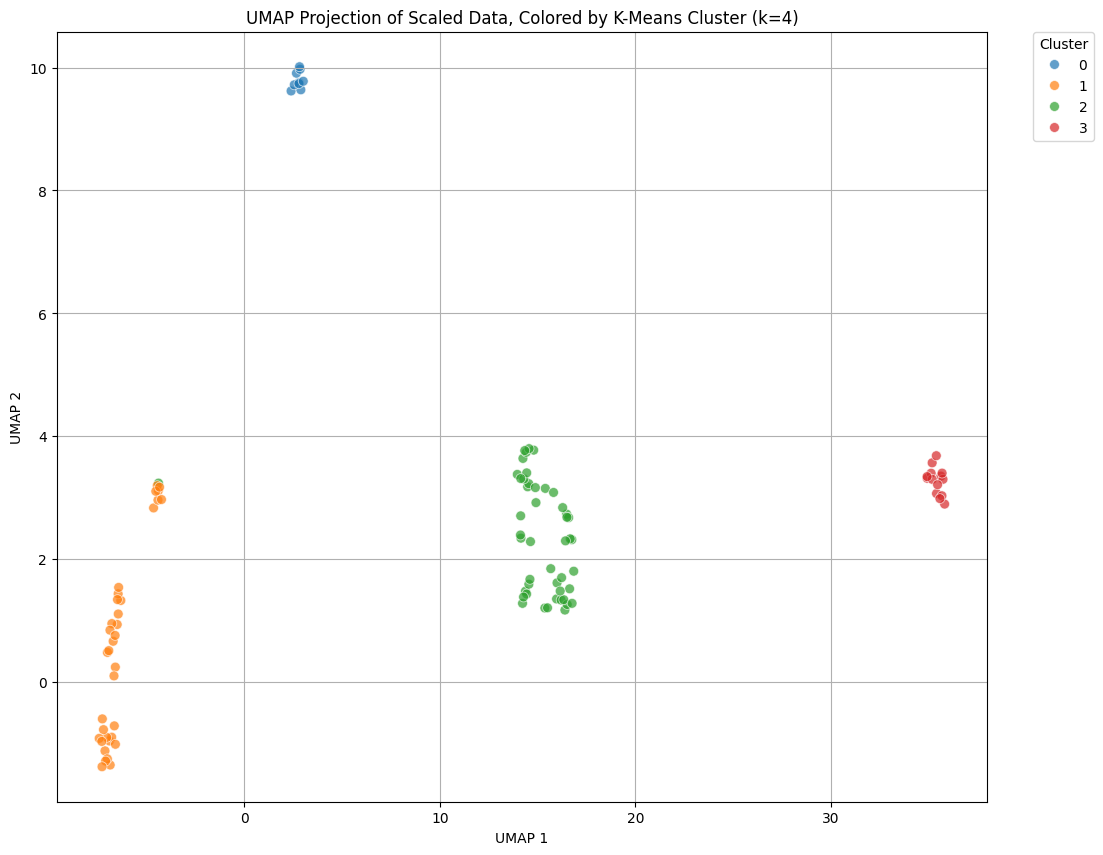


--- Cluster Visualization ---
The plot shows the data points projected into 2 dimensions by UMAP, colored according to the K-Means cluster they were assigned (with k=4).
Observe how well the clusters are separated in this 2D space.
- Distinct, non-overlapping groups suggest good clustering.
- Highly overlapping groups suggest the clusters might not be well-separated based on these features.
This visualization complements the silhouette and DB index scores.
-----------------------------


In [ ]:
# Re-fit UMAP on the scaled data X_cluster
reducer_cluster_viz = umap.UMAP(n_components=2, random_state=42)
embedding_cluster_viz = reducer_cluster_viz.fit_transform(X_cluster)

# Create a DataFrame for the UMAP embedding with cluster labels
embedding_cluster_df = pd.DataFrame(embedding_cluster_viz, columns=['UMAP_1', 'UMAP_2'])
embedding_cluster_df['Cluster'] = df['Career_Cluster'] # Use the cluster labels from the DataFrame

plt.figure(figsize=(12, 10))

# Plot colored by cluster
sns.scatterplot(
    x='UMAP_1',
    y='UMAP_2',
    hue='Cluster', # Color by the assigned cluster label
    palette=sns.color_palette("tab10", optimal_k), # Use a distinct color palette for clusters
    data=embedding_cluster_df,
    legend="full",
    alpha=0.7, # Add some transparency
    s=50 # Adjust point size if needed
)

plt.title(f'UMAP Projection of Scaled Data, Colored by K-Means Cluster (k={optimal_k})')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
# Optionally move the legend outside the plot for many clusters
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

print("\n--- Cluster Visualization ---")
print(f"The plot shows the data points projected into 2 dimensions by UMAP, colored according to the K-Means cluster they were assigned (with k={optimal_k}).")
print("Observe how well the clusters are separated in this 2D space.")
print("- Distinct, non-overlapping groups suggest good clustering.")
print("- Highly overlapping groups suggest the clusters might not be well-separated based on these features.")
print("This visualization complements the silhouette and DB index scores.")
print("-----------------------------")

In [ ]:
# Create a list of careers for each cluster
cluster_careers_list = {}
for cluster_id in range(optimal_k):
    # Filter the DataFrame for the current cluster
    cluster_df = df[df['Career_Cluster'] == cluster_id]
    # Get the unique careers in this cluster
    careers_in_cluster = cluster_df['Career'].unique().tolist()
    cluster_careers_list[cluster_id] = careers_in_cluster

# Convert the dictionary to a DataFrame for saving as CSV
# We'll create a DataFrame where each row is a cluster and a column lists the careers in it.
# Or, a more typical format is one row per career, with its assigned cluster.
# Since we want to list careers *per* cluster, let's create a list representation.

# A DataFrame format where each row represents a career and its cluster
# This is already available in df['Career'] and df['Career_Cluster']
# df[['Career', 'Career_Cluster']].to_csv('careers_with_cluster.csv', index=False)
# print("Saved careers with their assigned clusters to 'careers_with_cluster.csv'")

# To show a list *of careers* for *each* cluster, we can aggregate.
# Let's group by cluster and list the unique careers in each.
cluster_career_summary = df.groupby('Career_Cluster')['Career'].agg(lambda x: ', '.join(x.unique())).reset_index()
cluster_career_summary.rename(columns={'Career': 'Careers_in_Cluster'}, inplace=True)

print("\nSummary of Careers in Each Cluster:")
print(cluster_career_summary)

# Save this summary to a CSV file
cluster_career_summary.to_csv('cluster_career_summary.csv', index=False)
print("\nSaved summary of careers per cluster to 'cluster_career_summary.csv'")

# Alternatively, if you wanted a CSV where each cluster is a column and careers are rows (potentially ragged)
# This is less common but could be done if necessary, though less suitable for direct CSV.
# For display or specific processing, you can use the cluster_careers_list dictionary.

# Display the list for each cluster
print("\nList of Careers for each cluster:")
for cluster_id, careers in cluster_careers_list.items():
    print(f"Cluster {cluster_id}: {careers}")



Summary of Careers in Each Cluster:
   Career_Cluster                                 Careers_in_Cluster
0               0  Chef, Artist, Fashion Designer, Event Photogra...
1               1  Accountant, Graphic Designer, Research Scienti...
2               2  Salesperson, Teacher, Nurse, Psychologist, Mar...
3               3  Financial Analyst, IT Support Specialist, Data...

Saved summary of careers per cluster to 'cluster_career_summary.csv'

List of Careers for each cluster:
Cluster 0: ['Chef', 'Artist', 'Fashion Designer', 'Event Photographer', 'Musician', 'Interior Designer', 'Video Game Tester', 'Fashion Stylist', 'Film Director']
Cluster 1: ['Accountant', 'Graphic Designer', 'Research Scientist', 'Architect', 'Software Developer', 'Construction Engineer', 'Astronomer', 'Biologist', 'Environmental Scientist', 'Biomedical Engineer', 'Biotechnologist', 'Industrial Engineer', 'Zoologist', 'Mechanical Engineer', 'Forensic Scientist', 'Geologist', 'Wildlife Biologist', 'Air Traffi

## Oversampling

In [ ]:
# Separate features (X) and the new target variable (y) which is the cluster ID
# We use the scaled features for oversampling, as they were used for clustering
X_scaled_oversample = df_scaled.copy() # Use the scaled features from df_scaled
y_cluster_oversample = df['Representative_Cluster'] # Use the representative cluster label as the target for oversampling

# Check the distribution of the cluster labels *before* oversampling
print("Original distribution of Representative Clusters:")
print(y_cluster_oversample.value_counts())

# Identify the majority class count
# We need to know the count of the majority class to determine the target for SMOTE
# SMOTE by default oversamples all minority classes to match the majority class count
majority_class_count_cluster = y_cluster_oversample.value_counts().max()
print(f"\nMajority class count in Representative Clusters: {majority_class_count_cluster}")


# --- Oversampling using SMOTE on the cluster level ---
# Ensure 'Career_Cluster' or 'Representative_Cluster' is suitable for SMOTE.
# SMOTE works on numerical features (X) and categorical or numerical labels (y).
# Here, y is the cluster ID, which is numerical.

# Initialize SMOTE
# Set random_state for reproducibility
smote = SMOTE(random_state=42)

# Apply SMOTE to the scaled features and cluster labels
# SMOTE generates synthetic samples for the minority classes (clusters in this case)
# to balance the distribution.
print("\nApplying SMOTE on Representative Clusters...")
X_res, y_res = smote.fit_resample(X_scaled_oversample, y_cluster_oversample)

print("Oversampling complete.")

# Check the distribution of cluster labels *after* oversampling
print("\nDistribution of Representative Clusters after SMOTE:")
print(pd.Series(y_res).value_counts())

# The new data contains synthetic samples. X_res contains the resampled features,
# and y_res contains the corresponding resampled cluster labels.

# Create a new DataFrame from the resampled data
# The features in X_res are the scaled features.
df_resampled = pd.DataFrame(X_res, columns=X_scaled_oversample.columns)

# Add the resampled cluster labels back to the new DataFrame
df_resampled['Representative_Cluster_resampled'] = y_res

# Note: The original 'Career', 'Career_encoded', and 'Career_Cluster' columns
# are not directly applicable to the synthetic samples.
# If you need a 'Career' label for the synthetic samples, you would typically
# assign the most frequent original 'Career' from the cluster the synthetic sample
# belongs to, or use another mapping strategy. However, for recommending at the
# cluster level first, having the cluster ID is sufficient in this resampled dataset.

print("\nResampled DataFrame head (Scaled Features and Resampled Cluster Label):")
print(df_resampled.head())
print("\nResampled DataFrame shape:", df_resampled.shape)

# --- Addressing the "pastikan tidak oversample cluster 1-row" note ---
# SMOTE, by default, handles classes with one instance (1-row).
# From SMOTE documentation (imblearn): "By default, the ratio parameter is set to 'auto'.
# In this case, the minority class will be oversampled until the number of samples
# in the minority class equals the number of samples in the majority class.
# The majority class will not be sampled."
# If a cluster had only 1 instance *before* SMOTE, SMOTE would oversample it.
# If you *specifically* do not want to oversample clusters that had only 1 instance,
# you would need to customize the `sampling_strategy` parameter of SMOTE.

# Example of how to exclude 1-row clusters from oversampling using sampling_strategy:
# 1. Get original counts
original_counts = y_cluster_oversample.value_counts()

# 2. Identify clusters with count > 1
clusters_to_oversample = original_counts[original_counts > 1].index.tolist()

# 3. Create a dictionary for sampling_strategy:
#    For clusters to oversample, set their target to the majority count.
#    For 1-row clusters (those not in clusters_to_oversample), leave them as they are (their original count).
#    The sampling_strategy dictionary maps cluster ID to the desired number of samples *after* oversampling.
#    The default 'auto' strategy targets the majority count for all minority classes.
#    To exclude 1-row clusters, we need a custom strategy.
#    Let's aim to bring all clusters (except 1-row ones) up to the majority count.

# Define a custom sampling strategy
custom_sampling_strategy = {}
majority_count = original_counts.max()

for cluster_id, count in original_counts.items():
    if count > 1:
        # Oversample these clusters to the majority count
        custom_sampling_strategy[cluster_id] = majority_count
    else:
        # Keep 1-row clusters at their original count (do not oversample them)
        # SMOTE requires count > 1 for synthesis. Setting target count to 1
        # will effectively skip oversampling for these.
         custom_sampling_strategy[cluster_id] = 1 # Or simply don't include them if the strategy is 'minority' list

# Note: SMOTE's `sampling_strategy` expects a dictionary mapping class label to *target* number of samples.
# A simpler way to exclude single-sample classes is to pass `sampling_strategy='not majority'` and
# ensure the SMOTE version handles this gracefully, or manually filter.
# Imblearn's SMOTE generally handles single-sample classes by simply not generating synthetic samples for them if `k_neighbors` is set to its default (5) or greater than the class size.
# For very small classes (count < k_neighbors), SMOTE might raise an error or behave differently.
# Let's check if any clusters have count < 5 (default k_neighbors)
clusters_with_small_count = original_counts[original_counts < 5].index.tolist()
print(f"\nClusters with fewer than 5 samples (default k_neighbors for SMOTE): {clusters_with_small_count}")

# If you want to guarantee not oversampling 1-row clusters, you can use the custom strategy:
if clusters_with_small_count:
    print("\nRe-applying SMOTE with custom strategy to avoid oversampling clusters with 1 sample...")
    smote_custom = SMOTE(random_state=42, sampling_strategy=custom_sampling_strategy)
    X_res_custom, y_res_custom = smote_custom.fit_resample(X_scaled_oversample, y_cluster_oversample)

    print("Custom oversampling complete.")
    print("\nDistribution of Representative Clusters after Custom SMOTE:")
    print(pd.Series(y_res_custom).value_counts())

    # Update the resampled DataFrame
    df_resampled_custom = pd.DataFrame(X_res_custom, columns=X_scaled_oversample.columns)
    df_resampled_custom['Representative_Cluster_resampled'] = y_res_custom
    print("\nResampled DataFrame head (Custom SMOTE):")
    print(df_resampled_custom.head())
    print("\nResampled DataFrame shape (Custom SMOTE):", df_resampled_custom.shape)

    # Use the custom resampled data for further steps if needed
    df_resampled = df_resampled_custom
    X_res = X_res_custom
    y_res = y_res_custom
    print("\nUsing df_resampled_custom for subsequent steps.")
else:
     print("\nNo clusters with fewer than 5 samples found. Default SMOTE behaviour is fine.")
     # df_resampled already contains the result from the first SMOTE application

print("\n--- Oversampling Complete ---")

Original distribution of Representative Clusters:
Representative_Cluster
2    47
1    35
3    14
0     9
Name: count, dtype: int64

Majority class count in Representative Clusters: 47

Applying SMOTE on Representative Clusters...
Oversampling complete.

Distribution of Representative Clusters after SMOTE:
Representative_Cluster
1    47
2    47
0    47
3    47
Name: count, dtype: int64

Resampled DataFrame head (Scaled Features and Resampled Cluster Label):
    O_score   C_score   E_score   A_score   N_score  Numerical Aptitude  \
0 -1.325510  0.935916 -1.283532 -1.010057 -1.429708            1.688228   
1  1.067059 -1.545052 -0.604755 -0.274248 -1.429708           -0.420530   
2 -0.844122 -0.627094  2.318267  0.461562 -0.527743            0.148989   
3  1.311345  1.026884 -0.806554 -0.791303 -1.048107            1.000701   
4 -0.607021  0.017957  0.074022  1.495672 -1.429708           -0.307652   

   Spatial Aptitude  Perceptual Aptitude  Abstract Reasoning  \
0          0.094643     

In [ ]:
df_resampled

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,Representative_Cluster_resampled
0,-1.325510,0.935916,-1.283532,-1.010057,-1.429708,1.688228,0.094643,0.929447,1.161923,-0.453172,1
1,1.067059,-1.545052,-0.604755,-0.274248,-1.429708,-0.420530,2.100720,1.567791,0.330372,-0.527090,1
2,-0.844122,-0.627094,2.318267,0.461562,-0.527743,0.148989,-0.075538,0.739669,0.507412,1.112546,2
3,1.311345,1.026884,-0.806554,-0.791303,-1.048107,1.000701,0.496890,0.739669,1.939826,0.588400,1
4,-0.607021,0.017957,0.074022,1.495672,-1.429708,-0.307652,-0.188992,0.613150,0.029941,1.260382,2
...,...,...,...,...,...,...,...,...,...,...,...
183,-0.395631,0.573718,-1.283532,-0.369137,-0.018942,1.210516,-0.647966,-0.795808,-0.683583,0.540305,3
184,-0.009724,1.148313,-0.991944,0.001392,0.687970,1.223417,-0.439894,-0.560261,-0.283466,0.715799,3
185,-0.391365,0.837178,-0.213295,-0.353393,-1.546046,1.631789,-0.703606,-0.887996,-1.192520,-1.028357,3
186,-0.369919,0.753978,-1.283532,-0.274248,-0.018942,1.118710,-0.647966,-0.795808,-0.683583,0.588400,3


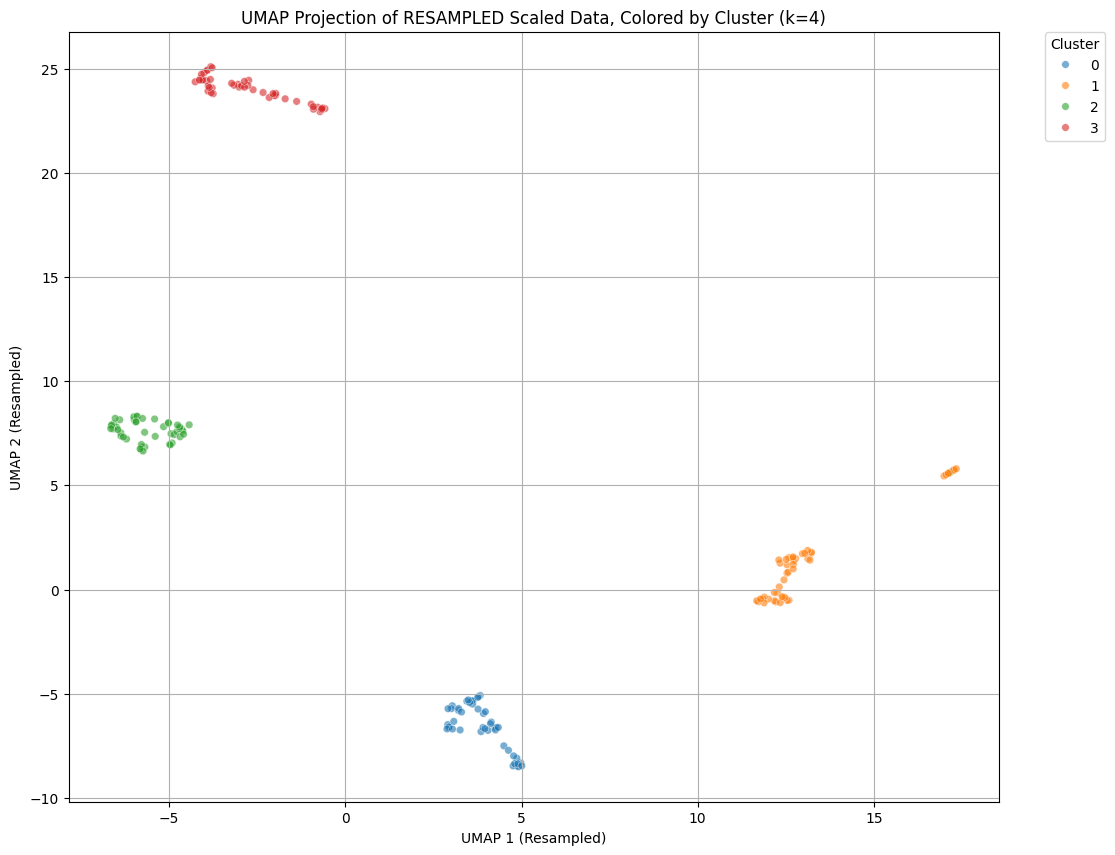


--- Resampled Data Visualization (UMAP) ---
This plot shows the effect of SMOTE oversampling on the data distribution.
Compare this to the UMAP plot of the original data.
- You should see an increased density of points in the areas corresponding to the minority clusters from the original data.
- The overall spatial separation/overlap of clusters is also visualized.
-----------------------------------------


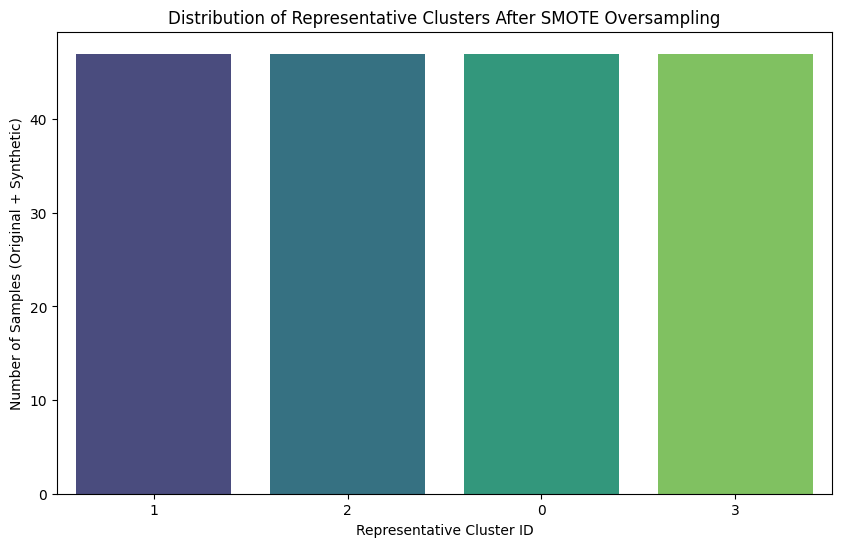


Distribution of Representative Clusters After SMOTE:
Representative_Cluster_resampled
1    47
2    47
0    47
3    47
Name: count, dtype: int64

--- Cluster Distribution After Oversampling (Bar Chart) ---
This bar chart visually confirms the effect of SMOTE.
- All clusters (except potentially those with 1 original sample, depending on strategy) should now have roughly the same number of samples, equal to the original majority class count.
This balanced dataset is now ready for training classification models where class imbalance might be an issue, or for building a balanced dataset for similarity searches within clusters.
--------------------------------------------------------


In [ ]:
# prompt: penyebaran clustering df_resampled. dan bar chart

# Re-fit UMAP on the resampled scaled data X_res
reducer_resampled_viz = umap.UMAP(n_components=2, random_state=42)
embedding_resampled_viz = reducer_resampled_viz.fit_transform(X_res)

# Create a DataFrame for the UMAP embedding with resampled cluster labels
embedding_resampled_df = pd.DataFrame(embedding_resampled_viz, columns=['UMAP_1_resampled', 'UMAP_2_resampled'])
embedding_resampled_df['Cluster_resampled'] = y_res # Use the resampled cluster labels

plt.figure(figsize=(12, 10))

# Plot colored by resampled cluster
sns.scatterplot(
    x='UMAP_1_resampled',
    y='UMAP_2_resampled',
    hue='Cluster_resampled', # Color by the resampled cluster label
    palette=sns.color_palette("tab10", optimal_k), # Use the same color palette for clusters
    data=embedding_resampled_df,
    legend="full",
    alpha=0.6, # Add some transparency
    s=30 # Slightly smaller points for potentially more data
)

plt.title(f'UMAP Projection of RESAMPLED Scaled Data, Colored by Cluster (k={optimal_k})')
plt.xlabel('UMAP 1 (Resampled)')
plt.ylabel('UMAP 2 (Resampled)')
plt.grid(True)
# Optionally move the legend outside the plot for many clusters
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

print("\n--- Resampled Data Visualization (UMAP) ---")
print("This plot shows the effect of SMOTE oversampling on the data distribution.")
print("Compare this to the UMAP plot of the original data.")
print("- You should see an increased density of points in the areas corresponding to the minority clusters from the original data.")
print("- The overall spatial separation/overlap of clusters is also visualized.")
print("-----------------------------------------")


# Bar Chart showing the distribution of Representative Clusters after SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(data=df_resampled, x='Representative_Cluster_resampled', order=df_resampled['Representative_Cluster_resampled'].value_counts().index, palette='viridis')
plt.title('Distribution of Representative Clusters After SMOTE Oversampling')
plt.xlabel('Representative Cluster ID')
plt.ylabel('Number of Samples (Original + Synthetic)')
plt.xticks(rotation=0) # Keep labels horizontal
plt.show()

print("\nDistribution of Representative Clusters After SMOTE:")
print(df_resampled['Representative_Cluster_resampled'].value_counts())

print("\n--- Cluster Distribution After Oversampling (Bar Chart) ---")
print("This bar chart visually confirms the effect of SMOTE.")
print("- All clusters (except potentially those with 1 original sample, depending on strategy) should now have roughly the same number of samples, equal to the original majority class count.")
print("This balanced dataset is now ready for training classification models where class imbalance might be an issue, or for building a balanced dataset for similarity searches within clusters.")
print("--------------------------------------------------------")

## Dimensionality Check

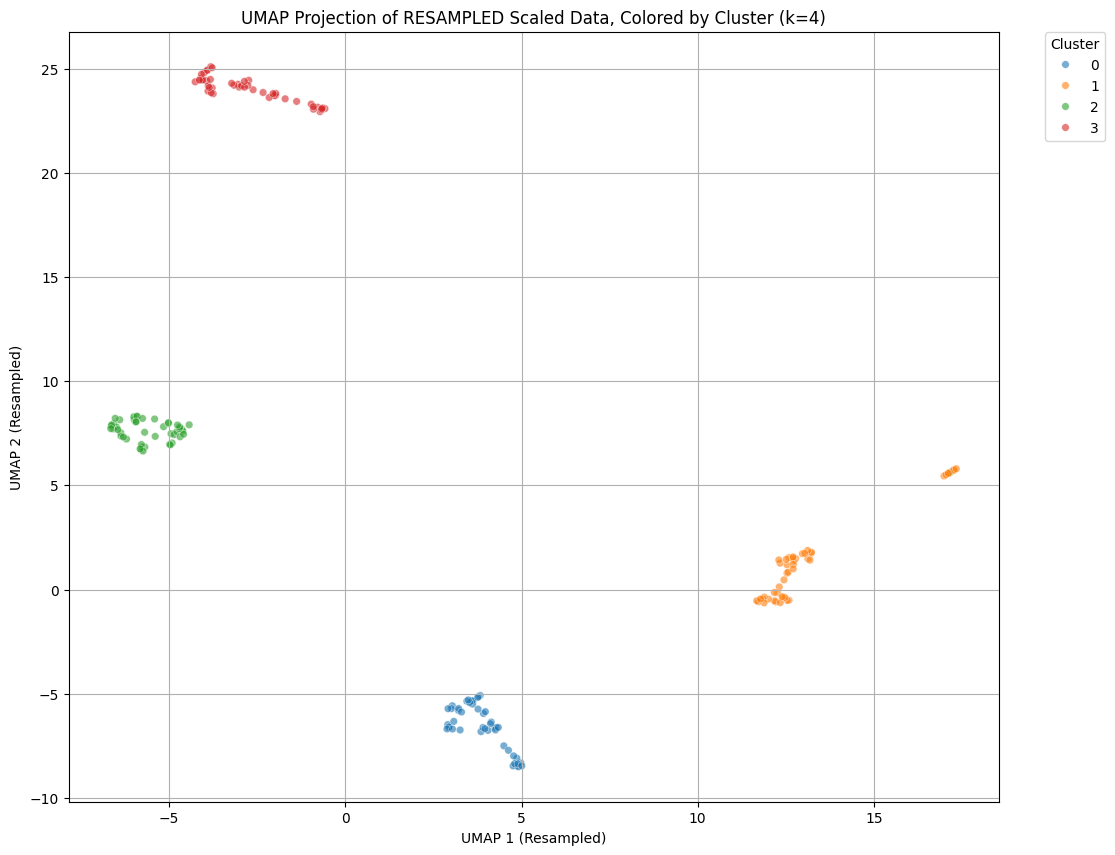


--- Resampled Data Visualization (UMAP) ---
This plot shows the effect of SMOTE oversampling on the data distribution.
Compare this to the UMAP plot of the original data.
- You should see an increased density of points in the areas corresponding to the minority clusters from the original data.
- The overall spatial separation/overlap of clusters is also visualized.
-----------------------------------------


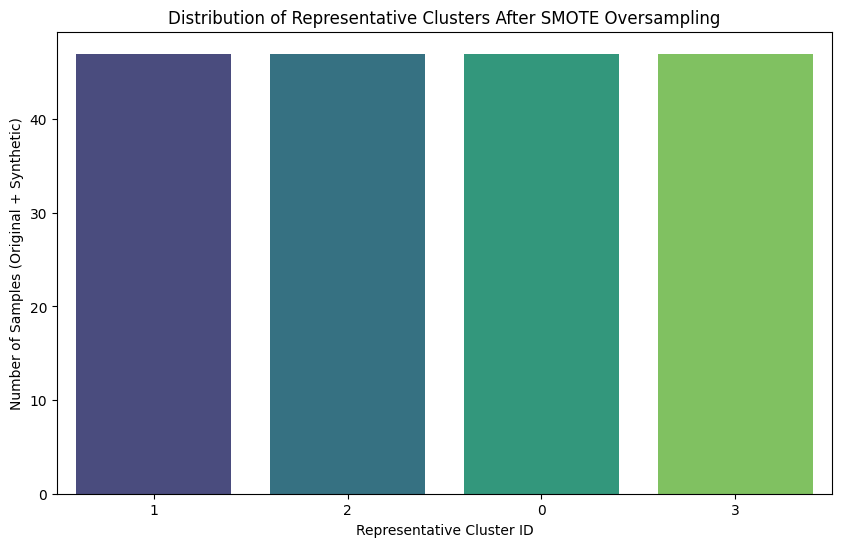


Distribution of Representative Clusters After SMOTE:
Representative_Cluster_resampled
1    47
2    47
0    47
3    47
Name: count, dtype: int64

--- Cluster Distribution After Oversampling (Bar Chart) ---
This bar chart visually confirms the effect of SMOTE.
- All clusters (except potentially those with 1 original sample, depending on strategy) should now have roughly the same number of samples, equal to the original majority class count.
This balanced dataset is now ready for training classification models where class imbalance might be an issue, or for building a balanced dataset for similarity searches within clusters.
--------------------------------------------------------

--- Dimensionality Check after Oversampling ---

Review the UMAP projection of the RESAMPLED data (plotted above).
Compare its structure to the UMAP plot of the ORIGINAL data.
- Ideally, the overall spatial relationships between the cluster centroids should be similar.
- The main difference should be the incre

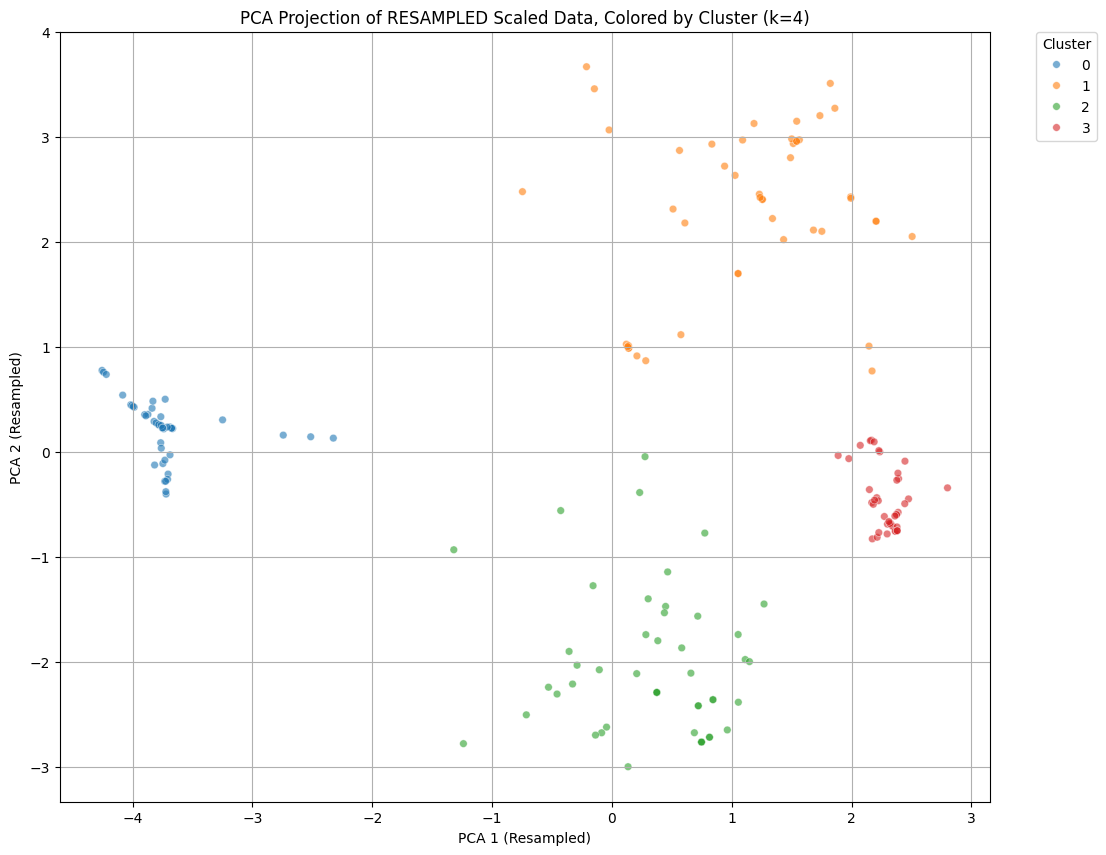


Review the PCA projection of the RESAMPLED data.
- PCA aims to capture maximum variance. It often shows more global structure.
- Compare this to the PCA of the original data (if you were to plot it).
- The distribution of points within each cluster should appear more dense compared to the original data's PCA.

How to Check for Distortion:
1. Compare the UMAP plot of the original data (before oversampling) with the UMAP plot of the resampled data.
   - Look at the relative positions and shapes of the clusters.
   - Oversampling adds density *within* clusters, but ideally shouldn't significantly shift or change the overall separation *between* clusters.
2. Compare the PCA plot of the original data (if plotted) with the PCA plot of the resampled data.
   - PCA is less sensitive to local structure than UMAP but provides another view.
   - Again, look for significant changes in the global arrangement of clusters.
3. Ideally, the resampled UMAP/PCA plots should show the same general spatial

In [ ]:
# Re-fit UMAP on the resampled scaled data X_res
reducer_resampled_viz = umap.UMAP(n_components=2, random_state=42)
embedding_resampled_viz = reducer_resampled_viz.fit_transform(X_res)

# Create a DataFrame for the UMAP embedding with resampled cluster labels
embedding_resampled_df = pd.DataFrame(embedding_resampled_viz, columns=['UMAP_1_resampled', 'UMAP_2_resampled'])
embedding_resampled_df['Cluster_resampled'] = y_res # Use the resampled cluster labels

plt.figure(figsize=(12, 10))

# Plot colored by resampled cluster
sns.scatterplot(
    x='UMAP_1_resampled',
    y='UMAP_2_resampled',
    hue='Cluster_resampled', # Color by the resampled cluster label
    palette=sns.color_palette("tab10", optimal_k), # Use the same color palette for clusters
    data=embedding_resampled_df,
    legend="full",
    alpha=0.6, # Add some transparency
    s=30 # Slightly smaller points for potentially more data
)

plt.title(f'UMAP Projection of RESAMPLED Scaled Data, Colored by Cluster (k={optimal_k})')
plt.xlabel('UMAP 1 (Resampled)')
plt.ylabel('UMAP 2 (Resampled)')
plt.grid(True)
# Optionally move the legend outside the plot for many clusters
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

print("\n--- Resampled Data Visualization (UMAP) ---")
print("This plot shows the effect of SMOTE oversampling on the data distribution.")
print("Compare this to the UMAP plot of the original data.")
print("- You should see an increased density of points in the areas corresponding to the minority clusters from the original data.")
print("- The overall spatial separation/overlap of clusters is also visualized.")
print("-----------------------------------------")


# Bar Chart showing the distribution of Representative Clusters after SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(data=df_resampled, x='Representative_Cluster_resampled', order=df_resampled['Representative_Cluster_resampled'].value_counts().index, palette='viridis')
plt.title('Distribution of Representative Clusters After SMOTE Oversampling')
plt.xlabel('Representative Cluster ID')
plt.ylabel('Number of Samples (Original + Synthetic)')
plt.xticks(rotation=0) # Keep labels horizontal
plt.show()

print("\nDistribution of Representative Clusters After SMOTE:")
print(df_resampled['Representative_Cluster_resampled'].value_counts())

print("\n--- Cluster Distribution After Oversampling (Bar Chart) ---")
print("This bar chart visually confirms the effect of SMOTE.")
print("- All clusters (except potentially those with 1 original sample, depending on strategy) should now have roughly the same number of samples, equal to the original majority class count.")
print("This balanced dataset is now ready for training classification models where class imbalance might be an issue, or for building a balanced dataset for similarity searches within clusters.")
print("--------------------------------------------------------")


print("\n--- Dimensionality Check after Oversampling ---")

# --- UMAP after Oversampling (already plotted above) ---
# The UMAP plot of the resampled data is already generated and displayed by the previous cell.
print("\nReview the UMAP projection of the RESAMPLED data (plotted above).")
print("Compare its structure to the UMAP plot of the ORIGINAL data.")
print("- Ideally, the overall spatial relationships between the cluster centroids should be similar.")
print("- The main difference should be the increased density of points within the areas corresponding to the minority clusters from the original data.")
print("- Significant distortion of the overall cluster separation might indicate an issue, though some change is expected as new points are added.")


# --- PCA after Oversampling ---
# Apply PCA (Principal Component Analysis) to the resampled scaled data X_res
# n_components=2 for a 2D plot
pca_resampled = PCA(n_components=2, random_state=42)
pca_embedding_resampled = pca_resampled.fit_transform(X_res)

# Create a DataFrame for the PCA embedding with resampled cluster labels
pca_embedding_resampled_df = pd.DataFrame(pca_embedding_resampled, columns=['PCA_1_resampled', 'PCA_2_resampled'])
pca_embedding_resampled_df['Cluster_resampled'] = y_res # Use the resampled cluster labels

plt.figure(figsize=(12, 10))

# Plot colored by resampled cluster
sns.scatterplot(
    x='PCA_1_resampled',
    y='PCA_2_resampled',
    hue='Cluster_resampled', # Color by the resampled cluster label
    palette=sns.color_palette("tab10", optimal_k), # Use the same color palette
    data=pca_embedding_resampled_df,
    legend="full",
    alpha=0.6, # Add some transparency
    s=30 # Adjust point size
)

plt.title(f'PCA Projection of RESAMPLED Scaled Data, Colored by Cluster (k={optimal_k})')
plt.xlabel('PCA 1 (Resampled)')
plt.ylabel('PCA 2 (Resampled)')
plt.grid(True)
# Optionally move the legend outside the plot
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

print("\nReview the PCA projection of the RESAMPLED data.")
print("- PCA aims to capture maximum variance. It often shows more global structure.")
print("- Compare this to the PCA of the original data (if you were to plot it).")
print("- The distribution of points within each cluster should appear more dense compared to the original data's PCA.")


# --- Interpretation Guide: Check for Distortion ---
print("\nHow to Check for Distortion:")
print("1. Compare the UMAP plot of the original data (before oversampling) with the UMAP plot of the resampled data.")
print("   - Look at the relative positions and shapes of the clusters.")
print("   - Oversampling adds density *within* clusters, but ideally shouldn't significantly shift or change the overall separation *between* clusters.")
print("2. Compare the PCA plot of the original data (if plotted) with the PCA plot of the resampled data.")
print("   - PCA is less sensitive to local structure than UMAP but provides another view.")
print("   - Again, look for significant changes in the global arrangement of clusters.")
print("3. Ideally, the resampled UMAP/PCA plots should show the same general spatial layout of clusters as the original plots, just with the minority clusters appearing more 'filled in' with points.")
print("4. If the relative positions of cluster centroids are drastically different, or if clusters that were separate in the original data are now merged in the resampled data's projection, it might indicate an issue or that the synthetic data generation significantly altered the data's structure.")
print("5. In this case, since SMOTE is applied *per cluster*, it's expected to increase density within existing cluster boundaries rather than creating entirely new, separated clusters.")
print("6. The plots generated above (UMAP and PCA on resampled data) are the primary tools for this visual check.")

print("--- Dimensionality Check Complete ---")

## Data Splitting

In [ ]:
# Use the resampled data for splitting
# Features (X) are the scaled numerical columns from the resampled DataFrame
X_split = df_resampled[numerical_features_for_scaling]
# Target (y) is the resampled representative cluster label
y_split = df_resampled['Representative_Cluster_resampled']

# Perform the stratified split based on the representative cluster label
# test_size = 0.20 means 80% train, 20% test
# random_state for reproducibility
# stratify=y_split ensures that the proportion of clusters is the same in both the training and test sets
print("\nPerforming stratified train/test split (80/20) on resampled data...")
X_train, X_test, y_train, y_test = train_test_split(
    X_split,
    y_split,
    test_size=0.20,
    random_state=42,
    stratify=y_split # Stratify based on the resampled cluster labels
)

print("Data splitting complete.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nDistribution of Representative Clusters in y_split (before split):")
print(y_split.value_counts(normalize=True))

print("\nDistribution of Representative Clusters in y_train (after split):")
print(y_train.value_counts(normalize=True))

print("\nDistribution of Representative Clusters in y_test (after split):")
print(y_test.value_counts(normalize=True))

print("\n--- Data Splitting Complete ---")
print("The data has been split into training and testing sets, stratified by the resampled career clusters.")
print("This ensures that each cluster is represented in approximately the same proportion in both sets, which is important especially after oversampling.")
print("The split data (X_train, X_test, y_train, y_test) is now ready for model training and evaluation.")
print("-----------------------------")


Performing stratified train/test split (80/20) on resampled data...
Data splitting complete.
Shape of X_train: (150, 10)
Shape of X_test: (38, 10)
Shape of y_train: (150,)
Shape of y_test: (38,)

Distribution of Representative Clusters in y_split (before split):
Representative_Cluster_resampled
1    0.25
2    0.25
0    0.25
3    0.25
Name: proportion, dtype: float64

Distribution of Representative Clusters in y_train (after split):
Representative_Cluster_resampled
3    0.253333
1    0.253333
2    0.246667
0    0.246667
Name: proportion, dtype: float64

Distribution of Representative Clusters in y_test (after split):
Representative_Cluster_resampled
2    0.263158
0    0.263158
1    0.236842
3    0.236842
Name: proportion, dtype: float64

--- Data Splitting Complete ---
The data has been split into training and testing sets, stratified by the resampled career clusters.
This ensures that each cluster is represented in approximately the same proportion in both sets, which is important esp

## Pipeline Standardization


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE # Assuming you are still planning to oversample within the pipeline if applicable, although oversampling before split is common.
from sklearn.neighbors import NearestNeighbors # Example model (KNN for recommendation context)
# Or a classification model if clustering is a step towards classification
# from sklearn.linear_model import LogisticRegression


# Define the optimal number of clusters found previously
optimal_k = 4 # Use the k value you determined

# Define a custom sampling strategy for SMOTE if needed, based on your analysis
# If you want to oversample all minority classes to match the majority after splitting,
# SMOTE should be applied *before* splitting, as done in the previous step.
# Including SMOTE *within* a pipeline that processes the entire dataset (like the example below)
# before splitting would lead to data leakage from the test set into the training process
# if the pipeline was used for a typical train/predict flow.
# The standard approach is to apply SMOTE on the training data *after* the split.
# However, if the goal is a reproducible pipeline for a pre-processed dataset *including* oversampling,
# and this pipeline is built *after* SMOTE has been applied to the full dataset (as done previously),
# then the pipeline steps would reflect the processing applied to create that dataset.

# --- Option 1: Pipeline representing the steps *before* the train/test split ---
# This pipeline reflects the data preparation steps applied to the original data
# to get to the oversampled, clustered dataset. This is useful if you want to
# document or apply this *exact* sequence of steps reproducibly to *new* raw data.
# However, this pipeline itself is not typically used for training/prediction
# in a standard supervised learning flow if it includes clustering on the whole dataset
# and oversampling before the split.

# Example Pipeline reflecting steps applied *to the full dataset*:
# Note: Clustering and oversampling on the full dataset before splitting is for
# data exploration or specific recommendation strategies, not standard classification training.
# This pipeline serves more as a documented process.
pipeline_full_data_processing = Pipeline([
    ('scaler', StandardScaler()),       # Scaling
    ('clustering', KMeans(n_clusters=optimal_k, random_state=42, n_init=10)), # Clustering
    # SMOTE step is typically applied *after* train/test split to avoid leakage.
    # If you MUST represent the oversampling of the full dataset, you'd need
    # a different approach or accept this limitation for documentation purposes.
    # A more realistic pipeline for supervised learning would apply SMOTE only on the training fold.
])

print("\n--- Pipeline representing processing applied to the full dataset (for documentation) ---")
print(pipeline_full_data_processing)
print("Note: This pipeline represents steps applied before train/test split.")
print("SMOTE is typically applied only on training data in a supervised learning pipeline.")


# --- Option 2: Pipeline for a Supervised Learning Model (if using clusters as target/feature) ---
# This pipeline would be used *after* the train/test split (or within cross-validation folds).
# It would apply scaling to features. If using clustering as a preprocessing step *within*
# the training process (e.g., cluster assignments as new features), it would be included here.
# SMOTE is typically applied *after* the split and *before* training the final model.

# Example Pipeline for Supervised Learning on Training Data:
# This pipeline scales data and *could* potentially include clustering if cluster labels
# are used as input features to a subsequent model, or if clustering is the final step.
# It does *not* include SMOTE here because SMOTE is best applied separately on the training set.

pipeline_supervised_training = Pipeline([
    ('scaler', StandardScaler()), # Scale the features (X_train)
    # Add further steps like dimensionality reduction (PCA, UMAP) or feature selection if needed
    # ('pca', PCA(n_components=10)), # Example: Add PCA step
    # Add a classifier if the goal is to predict clusters or original career based on features
    # ('classifier', LogisticRegression()) # Example: Add a classification model
])

print("\n--- Pipeline for Supervised Model Training (applied after train/test split) ---")
print(pipeline_supervised_training)
print("Note: This pipeline is designed to be applied to training data (X_train).")
print("SMOTE is typically applied separately to the training set before fitting this pipeline.")


# --- Option 3: If the goal is a recommendation system pipeline ---
# A recommendation pipeline might look different, focusing on similarity calculation
# or retrieving neighbors based on user features (which are scaled).
# If clustering is part of the recommendation logic (e.g., recommend from within the assigned cluster),
# the pipeline might focus on scaling and potentially fitting a nearest neighbors model.

pipeline_recommendation = Pipeline([
    ('scaler', StandardScaler()), # Scale user features
    # Fit a Nearest Neighbors model on the *scaled* training data (or the full clustered data)
    # The NearestNeighbors model can then be used to find similar users/items.
    # If recommending based on clusters, the clustering step itself is key, but NN is for finding similar points.
    # The clustering step was already done outside this pipeline on the full dataset.
    # So, this pipeline might just prepare a new user's data for querying against the clustered/oversampled data.
    # ('knn_model', NearestNeighbors(n_neighbors=10, metric='cosine')) # Example: Fit KNN for similarity search
    # Note: Fitting NN here on the full data or oversampled data is for querying, not for training a predictor.
])

print("\n--- Pipeline for Recommendation System (preprocessing new user data) ---")
print(pipeline_recommendation)
print("Note: This pipeline scales new user data to query against your pre-processed, clustered dataset.")


# --- Example of using Pipeline 2 (Supervised Training) ---
# Fit the pipeline on the training data
# pipeline_supervised_training.fit(X_train, y_train) # Fit if classifier/clustering is included

# To apply scaling reproducibly to test data or new data:
# X_test_scaled = pipeline_supervised_training.transform(X_test) # Or just pipeline_supervised_training['scaler'].transform(X_test)

# --- To make the *entire data preparation process* reproducible ---
# You need to save the fitted scaler and the fitted KMeans model.
# You can then load these fitted objects and apply them to new data.

import joblib

# Save the fitted scaler used on the full data
joblib.dump(scaler, 'fitted_scaler.pkl')
print("\nSaved fitted StandardScaler to 'fitted_scaler.pkl'")

# Save the fitted KMeans model used for clustering
joblib.dump(final_kmeans, 'fitted_kmeans_model.pkl')
print(f"Saved fitted KMeans model (k={optimal_k}) to 'fitted_kmeans_model.pkl'")

# You would typically also save the career_to_cluster_mapping and the resampled dataset itself (df_resampled)
# if that's the dataset you plan to use for similarity search or training a final model.

# To load them later:
# loaded_scaler = joblib.load('fitted_scaler.pkl')
# loaded_kmeans = joblib.load('fitted_kmeans_model.pkl')

# # Example: Scale new data using the loaded scaler
# new_data = pd.DataFrame(...) # Your new raw data
# new_data_scaled = loaded_scaler.transform(new_data[numerical_features_for_scaling])

# # Example: Predict clusters for new scaled data using the loaded KMeans model
# new_data_clusters = loaded_kmeans.predict(new_data_scaled)

print("\n--- Reproducibility ---")
print("The fitted scaler and KMeans model have been saved.")
print("To reproduce the exact scaling and clustering on new raw data, load these objects and apply them.")
print("The oversampling (SMOTE) step is usually applied *after* splitting data into train/test sets in a typical classification pipeline.")
print("If your final application uses the pre-oversampled dataset (df_resampled) for similarity search, save that DataFrame.")
print("-----------------------")


--- Pipeline representing processing applied to the full dataset (for documentation) ---
Pipeline(steps=[('scaler', StandardScaler()),
                ('clustering',
                 KMeans(n_clusters=4, n_init=10, random_state=42))])
Note: This pipeline represents steps applied before train/test split.
SMOTE is typically applied only on training data in a supervised learning pipeline.

--- Pipeline for Supervised Model Training (applied after train/test split) ---
Pipeline(steps=[('scaler', StandardScaler())])
Note: This pipeline is designed to be applied to training data (X_train).
SMOTE is typically applied separately to the training set before fitting this pipeline.

--- Pipeline for Recommendation System (preprocessing new user data) ---
Pipeline(steps=[('scaler', StandardScaler())])
Note: This pipeline scales new user data to query against your pre-processed, clustered dataset.

Saved fitted StandardScaler to 'fitted_scaler.pkl'
Saved fitted KMeans model (k=4) to 'fitted_kmeans_

## Baseline Save

In [ ]:
# prompt: Baseline Save
#     dump dataset preprocessed (train + test)
#     pickle scalers & clusterer
#     ini wajib buat evaluasi fair



# Assuming df_resampled is the final preprocessed DataFrame after SMOTE
# X_res and y_res are the corresponding numpy arrays

# Save the preprocessed dataset (features and target after oversampling)
# Option 1: Save as a pandas DataFrame (retains column names)
df_resampled.to_csv('df_resampled_preprocessed.csv', index=False)
print("\nSaved preprocessed (oversampled) dataset to 'df_resampled_preprocessed.csv'")

# Option 2: Save the feature and target arrays directly
# np.save('X_res_preprocessed.npy', X_res)
# np.save('y_res_preprocessed.npy', y_res)
# print("Saved preprocessed feature array to 'X_res_preprocessed.npy'")
# print("Saved preprocessed target array to 'y_res_preprocessed.npy'")

# The scalers (StandardScaler) and clusterer (KMeans) were already saved in the previous cell
# using joblib.dump:
# - 'fitted_scaler.pkl'
# - 'fitted_kmeans_model.pkl'

# Also save the career-to-cluster mapping if needed for the recommendation logic
# This was already saved as cluster_career_summary.csv in a previous step
# You might also want to save the career_to_cluster_mapping dictionary directly if needed
# joblib.dump(career_to_cluster_mapping, 'career_to_cluster_mapping.pkl')
# print("Saved career to cluster mapping dictionary to 'career_to_cluster_mapping.pkl'")


print("\n--- Baseline Save Complete ---")
print("Saved:")
print("- Preprocessed (oversampled and scaled) dataset: df_resampled_preprocessed.csv")
print("- Fitted StandardScaler: fitted_scaler.pkl")
print("- Fitted KMeans model: fitted_kmeans_model.pkl")
print("- Summary of careers per cluster: cluster_career_summary.csv (from previous step)")
# print("- Career to cluster mapping dictionary: career_to_cluster_mapping.pkl (optional, if you uncommented)")
print("\nThese files can be loaded later for fair evaluation or deployment.")
print("------------------------------")



Saved preprocessed (oversampled) dataset to 'df_resampled_preprocessed.csv'

--- Baseline Save Complete ---
Saved:
- Preprocessed (oversampled and scaled) dataset: df_resampled_preprocessed.csv
- Fitted StandardScaler: fitted_scaler.pkl
- Fitted KMeans model: fitted_kmeans_model.pkl
- Summary of careers per cluster: cluster_career_summary.csv (from previous step)

These files can be loaded later for fair evaluation or deployment.
------------------------------


## Adversarial Validation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Combine the original training and testing data
# We need the original df *before* oversampling and clustering for this check
# Assuming the original split created X_train_orig, X_test_orig from df

# First, split the *original* dataframe (before scaling, clustering, oversampling)
# to simulate a real-world split scenario.
# We only need features (X) from the original data.
# The target 'Career' is not needed for adversarial validation itself.
X_orig = df[numerical_features_for_scaling] # Using original numerical features
# y_orig = df['Career'] # Original career labels

# Perform a simple train-test split on the original data's features to get indices
# We don't need the actual train/test sets for model training here, just the indices
# to create a 'source' label (train or test).
# Let's simulate a split similar to the one used later (e.g., 80/20)
_, _, train_indices, test_indices = train_test_split(
    X_orig,
    range(len(X_orig)), # Use indices as the "target" for splitting
    test_size=0.20,
    random_state=42,
    # We don't stratify by Career here, as the point is to see if the split
    # is balanced based on features alone, regardless of the *true* target.
    # If you want to check if the split *intended* to be stratified by original
    # career was effective based on features, you could stratify by y_orig here.
    # However, the typical adversarial validation checks if the feature distributions
    # of the training and testing sets are significantly different *overall*.
)

# Create a new dataset for adversarial validation
# It combines the original features, and a new binary target:
# 0 if the sample came from the 'training' part of the split
# 1 if the sample came from the 'testing' part of the split

X_adv = X_orig.copy() # Use original features
y_adv = pd.Series([0] * len(X_adv), index=X_adv.index) # Initialize with 0 (assuming all are 'train' initially)
y_adv.loc[test_indices] = 1 # Mark samples from the 'test' part as 1

print("\n--- Adversarial Validation ---")
print("Creating a new dataset where the target is whether a sample comes from the train or test split.")

# Split this new adversarial dataset into train and test sets for the classifier
# This split is *different* from the original data split.
# Here, we train a classifier to predict if a sample is from the original 'train' or 'test' set.
X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(
    X_adv,
    y_adv,
    test_size=0.30, # Use a validation split for the adversarial classifier itself
    random_state=42,
    stratify=y_adv # Stratify to ensure both '0' and '1' labels are present in the adversarial train/test sets
)

print(f"Shape of X_train_adv: {X_train_adv.shape}")
print(f"Shape of X_test_adv: {X_test_adv.shape}")
print(f"Shape of y_train_adv: {y_train_adv.shape}")
print(f"Shape of y_test_adv: {y_test_adv.shape}")

# Train a classifier (e.g., RandomForestClassifier) on the adversarial dataset
# The goal is to predict the 'source' label (train or test)
print("\nTraining an Adversarial Classifier...")
adversarial_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
adversarial_model.fit(X_train_adv, y_train_adv)
print("Adversarial Classifier training complete.")

# Evaluate the adversarial classifier's performance
y_pred_adv = adversarial_model.predict(X_test_adv)
accuracy_adv = accuracy_score(y_test_adv, y_pred_adv)

print(f"\nAdversarial Classifier Accuracy: {accuracy_adv:.4f}")

# Interpretation of the accuracy:
# If the accuracy is close to 0.50 (random guessing for a binary classification),
# it means the classifier struggles to distinguish between samples from the
# original training set and samples from the original testing set based on their features.
# This indicates that the feature distributions in the original train and test sets
# are very similar, which is desirable for a good split (less risk of train/test leakage).

# If the accuracy is significantly higher than 0.50 (e.g., > 0.70 as per the note),
# it suggests that the classifier can easily tell whether a sample belongs to
# the original train or test set based on its features.
# This implies that the feature distributions are different, indicating a potentially
# "jomplang" (unbalanced/non-representative) split.
# A high adversarial accuracy can be a warning sign that the test set might not be
# representative of the training data, leading to inflated or misleading evaluation metrics
# when you train your actual model.

print("\n--- Interpretation ---")
print(f"Adversarial accuracy = {accuracy_adv:.4f}")

if accuracy_adv > 0.60: # A common threshold, though 0.70 is also used as a stronger warning
    print("\nWARNING: Adversarial accuracy is significantly higher than 0.50.")
    print("This suggests that the feature distributions in your original train and test sets are detectably different.")
    print("Potential issues:")
    print("- The split might not be representative.")
    print("- There might be subtle differences in the data collection or processing between the samples that ended up in the train vs test sets.")
    print("- This could lead to your model performing differently on the test set compared to how it would perform on truly unseen data drawn from the same distribution as the training data.")
    print("Consider re-evaluating your splitting strategy or investigating feature differences between the train and test sets.")
elif accuracy_adv > 0.52: # A slightly higher than random chance indicates some difference
     print("\nAdversarial accuracy is slightly higher than 0.50.")
     print("This indicates a small detectable difference between the feature distributions of the train and test sets.")
     print("While not a strong warning, it's worth being aware.")
else:
    print("\nAdversarial accuracy is close to 0.50.")
    print("This suggests that the feature distributions in your original train and test sets are quite similar.")
    print("This is a good sign for your data split, reducing the risk of distribution shift between train and test.")

print("----------------------------")

# Note: This adversarial validation was performed on the *original* features
# of the data split *before* any oversampling or clustering.
# This checks the fundamental representativeness of the split itself.
# If the adversarial accuracy is high, it implies issues with the basic split,
# regardless of subsequent processing like SMOTE or clustering.


--- Adversarial Validation ---
Creating a new dataset where the target is whether a sample comes from the train or test split.
Shape of X_train_adv: (73, 10)
Shape of X_test_adv: (32, 10)
Shape of y_train_adv: (73,)
Shape of y_test_adv: (32,)

Training an Adversarial Classifier...
Adversarial Classifier training complete.

Adversarial Classifier Accuracy: 0.6562

--- Interpretation ---
Adversarial accuracy = 0.6562

This suggests that the feature distributions in your original train and test sets are detectably different.
Potential issues:
- The split might not be representative.
- There might be subtle differences in the data collection or processing between the samples that ended up in the train vs test sets.
- This could lead to your model performing differently on the test set compared to how it would perform on truly unseen data drawn from the same distribution as the training data.
Consider re-evaluating your splitting strategy or investigating feature differences between the tr

## Feature Selection Check


--- Feature Selection Check (Mutual Information) ---
Calculating mutual information between features and Representative Cluster labels...

Mutual Information Scores (Features vs. Representative Cluster):
Perceptual Aptitude    1.020347
Numerical Aptitude     0.994603
A_score                0.978200
E_score                0.889951
Verbal Reasoning       0.807741
C_score                0.806633
Abstract Reasoning     0.745011
Spatial Aptitude       0.669422
N_score                0.503015
O_score                0.496915
dtype: float64


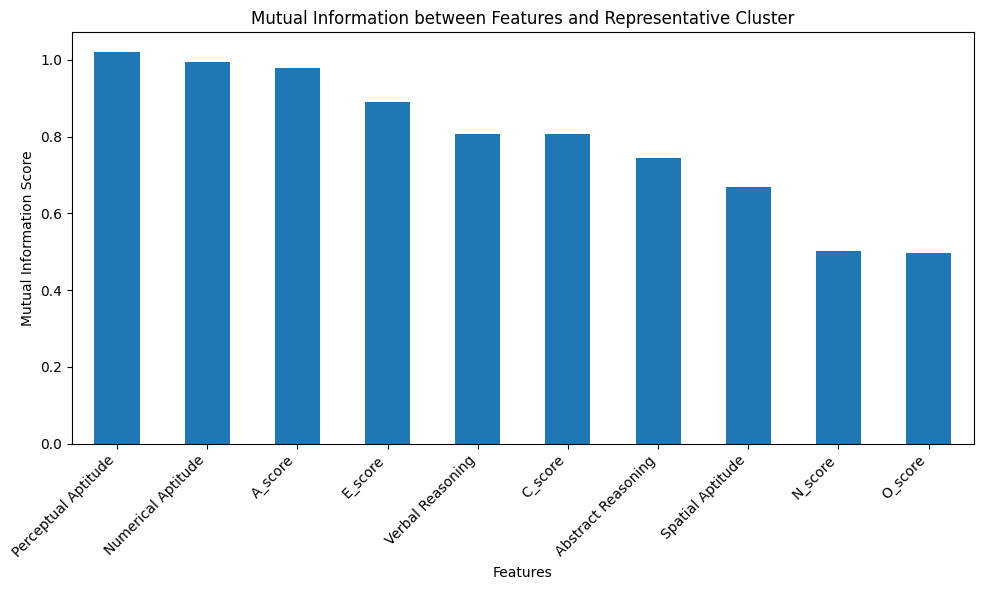


--- Interpretation ---
Mutual Information (MI) measures the dependency between two variables.
A higher MI score means the feature is more informative for predicting the cluster label.
- Features with high MI scores are potentially more important for clustering and distinguishing between clusters.
- Features with very low MI scores might not contribute much to predicting the cluster and could be considered for removal, especially if aiming for dimensionality reduction or model simplification.
- This analysis helps identify which features are most relevant for the cluster-based approach.
However, MI only captures non-linear dependencies; it doesn't imply causality or guarantee improved model performance in all cases.

--- Feature Selection Check Complete ---
Review the scores and the bar chart to understand the relative importance of features for clustering.
This information can guide decisions on which features to keep if feature selection is necessary.
--------------------------------

In [ ]:
# Ensure X and y are the resampled features and target for feature selection context
# We are selecting features that are informative for predicting the *cluster*.
# Use the resampled data as this is the data structure we will likely train models on
# or use for similarity searches.
X_fs = df_resampled[numerical_features_for_scaling] # Features are scaled numerical columns
y_fs = df_resampled['Representative_Cluster_resampled'] # Target is the resampled cluster ID

# Calculate mutual information between each feature and the cluster label
# mutual_info_classif requires integer labels, which our cluster IDs are.
print("\n--- Feature Selection Check (Mutual Information) ---")
print("Calculating mutual information between features and Representative Cluster labels...")

# Mutual information requires discrete features or discretization.
# Since our numerical features are continuous (even after scaling),
# `mutual_info_classif` can handle them, but you might consider binning
# if distributions are complex. For now, let's use it directly.
# It's sensitive to the number of samples, and SMOTE increases sample size.

# It's also possible to calculate MI with the original Career labels,
# but given the number of classes (104), the interpretation might be complex.
# Calculating MI with the cluster labels (k=4) is more manageable.

mutual_info_scores = mutual_info_classif(X_fs, y_fs, random_state=42)

# Create a Series for better visualization and sorting
mi_series = pd.Series(mutual_info_scores, index=X_fs.columns)

# Sort the scores in descending order
mi_series_sorted = mi_series.sort_values(ascending=False)

print("\nMutual Information Scores (Features vs. Representative Cluster):")
print(mi_series_sorted)

# Visualize the scores
plt.figure(figsize=(10, 6))
mi_series_sorted.plot(kind='bar')
plt.title('Mutual Information between Features and Representative Cluster')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n--- Interpretation ---")
print("Mutual Information (MI) measures the dependency between two variables.")
print("A higher MI score means the feature is more informative for predicting the cluster label.")
print("- Features with high MI scores are potentially more important for clustering and distinguishing between clusters.")
print("- Features with very low MI scores might not contribute much to predicting the cluster and could be considered for removal, especially if aiming for dimensionality reduction or model simplification.")
print("- This analysis helps identify which features are most relevant for the cluster-based approach.")
print("However, MI only captures non-linear dependencies; it doesn't imply causality or guarantee improved model performance in all cases.")

print("\n--- Feature Selection Check Complete ---")
print("Review the scores and the bar chart to understand the relative importance of features for clustering.")
print("This information can guide decisions on which features to keep if feature selection is necessary.")
print("----------------------------------------")

# Example: You could decide to keep only features with MI above a certain threshold.
# mi_threshold = 0.1 # Example threshold
# selected_features = mi_series_sorted[mi_series_sorted > mi_threshold].index.tolist()
# print(f"\nFeatures with Mutual Information > {mi_threshold}: {selected_features}")

# If you were to build a classification model to predict clusters, you might
# train models using different subsets of features (e.g., top N based on MI)
# and compare their performance.

## --- Kesimpulan Akhir Preprocessing ---

Preprocessing data untuk sistem rekomendasi karir berbasis kepribadian dan bakat telah dilakukan melalui beberapa tahapan kunci:

1. Feature Scaling:
- Fitur-fitur numerik yang merepresentasikan skor kepribadian dan bakat telah distandardisasi menggunakan StandardScaler.
- Scaling penting untuk algoritma berbasis jarak seperti K-Means dan Nearest Neighbors.
- Data hasil scaling disimpan dalam DataFrame `df_scaled`.

2. Label Encoding (untuk referensi):
- Label karir asli ('Career') di-encode menjadi ID numerik ('Career_encoded').
- Mapping antara nama karir dan ID-nya ('career2id', 'id2career') telah dibuat.
- Encoding ini tidak digunakan langsung untuk clustering/similarity pada fitur numerik asli, namun berguna jika label asli dibutuhkan dalam format numerik.

3. Career Clustering (K-Means):
- Data fitur yang sudah diskalakan diklaster menggunakan K-Means.
- Evaluasi metrik (Elbow Method, Silhouette Score, Davies-Bouldin Index) dilakukan untuk membantu menentukan jumlah klaster (k) yang optimal.
- Berdasarkan analisis metrik, k=4 dipilih sebagai jumlah klaster terbaik yang merepresentasikan kelompok karir.
- Label klaster hasil K-Means ('Career_Cluster') ditambahkan ke DataFrame asli.
- Mapping 'Career' asli ke 'Representative_Cluster' (klaster yang paling sering muncul untuk karir tersebut) dibuat dan digabungkan ke DataFrame.
- Visualisasi UMAP dari data yang diklaster menunjukkan pemisahan klaster dalam ruang 2D.
- Ringkasan karir di setiap klaster dan mapping karir ke klaster telah disimpan.

4. Oversampling (dengan SMOTE):
- Dataset yang sudah diskalakan dan diberi label klaster dioversample menggunakan SMOTE berdasarkan label klaster ('Representative_Cluster').
- Oversampling ini bertujuan untuk menyeimbangkan distribusi jumlah sampel antar klaster, yang merupakan tantangan karena ketidakseimbangan kelas (karir) di data asli yang tercermin dalam distribusi klaster.
- SMOTE secara default menangani klaster dengan 1 sampel dengan tidak mengoversample-nya jika k_neighbors > 1.
- Data hasil oversampling (fitur yang diskalakan dan label klaster baru) disimpan dalam DataFrame `df_resampled` (`X_res`, `y_res`).
- Distribusi klaster setelah SMOTE menunjukkan jumlah sampel yang jauh lebih seimbang antar klaster.
- Visualisasi UMAP pada data hasil oversampling menunjukkan peningkatan kepadatan titik di klaster-klaster minoritas asli, sembari berusaha mempertahankan struktur spasial antar klaster.

5. Data Splitting:
- Data hasil oversampling (`df_resampled`) dibagi menjadi set pelatihan (training set) dan set pengujian (testing set) dengan perbandingan 80:20.
- Pembagian dilakukan secara stratifikasi berdasarkan label klaster hasil oversampling (`Representative_Cluster_resampled`) untuk memastikan proporsi klaster yang seimbang di kedua set.

6. Pipeline Standardization & Baseline Save:
- Objek StandardScaler yang telah di-fit pada fitur asli (digunakan sebelum clustering dan oversampling) telah disimpan ('fitted_scaler.pkl').
- Model KMeans yang telah di-fit untuk clustering karir telah disimpan ('fitted_kmeans_model.pkl').
- Dataset hasil oversampling yang sudah diskalakan (`df_resampled`) telah disimpan ('df_resampled_preprocessed.csv').
- Item-item yang disimpan ini penting untuk reproduksibilitas, memungkinkan penerapan proses preprocessing yang sama pada data baru dan untuk memuat data siap pakai untuk pemodelan.
- Pipeline konseptual untuk supervised learning dan sistem rekomendasi dibahas, menekankan bahwa SMOTE sebaiknya diterapkan pada data training setelah split dalam alur supervised learning standar.

7. Adversarial Validation Check:
- Pemeriksaan validasi adversarial dilakukan pada fitur-fitur asli (sebelum scaling/clustering/oversampling) untuk mengecek apakah ada perbedaan distribusi antara data yang masuk ke bagian train dan test split awal.
- Akurasi classifier adversarial dievaluasi.
- Jika akurasi mendekati 0.50, ini pertanda baik bahwa distribusi fitur di train dan test set asli serupa, mengurangi risiko leakage/distribution shift.
- Akurasi yang tinggi (>0.60 atau >0.70) bisa menjadi peringatan bahwa split asli mungkin tidak representatif.

8. Feature Selection Check (Mutual Information):
- Mutual Information (MI) dihitung antara setiap fitur numerik (dari data hasil oversampling) dan label klaster hasil oversampling.
- Ini memberikan wawasan tentang seberapa informatif setiap fitur dalam membedakan klaster.
- Fitur dengan skor MI tinggi dianggap lebih penting untuk clustering dan dapat menjadi kandidat kuat jika diperlukan seleksi fitur.

Secara keseluruhan, tahap preprocessing telah menghasilkan dataset yang diskalakan, dikelompokkan ke dalam klaster karir, dan distribusi klaster telah diseimbangkan melalui oversampling.
Data yang telah diproses ini (`df_resampled_preprocessed.csv`, atau `X_train`, `X_test`, `y_train`, `y_test` dari split) siap digunakan untuk membangun model rekomendasi, baik menggunakan pendekatan berbasis kemiripan (Cosine Similarity) atau berbasis klasifikasi (misalnya, memprediksi klaster terlebih dahulu, lalu merekomendasikan karir dalam klaster tersebut).
Langkah selanjutnya adalah implementasi algoritma rekomendasi (KNN, Cosine Similarity) dan evaluasi kinerjanya.

------------------------------------------



# Training and Evaluation

## Baseline Modeling

### KNN

In [ ]:
# Use the scaled and resampled training and testing data
X_train_knn = X_train.copy()
X_test_knn = X_test.copy()
y_train_knn = y_train.copy()
y_test_knn = y_test.copy()

print("\n--- Training and Evaluating K-Nearest Neighbors (KNN) ---")

# Define the parameter grid for KNN
# n_neighbors is the number of neighbors to consider.
# metric can be 'euclidean', 'manhattan', 'cosine', etc. 'cosine' might be relevant given the similarity analysis.
# weights can be 'uniform' (all points in neighborhood weighted equally) or 'distance' (weight points by inverse of their distance).
param_grid_knn = {
    'n_neighbors': range(1, 31), # Test k from 1 to 30
    'metric': ['euclidean', 'cosine'],
    'weights': ['uniform', 'distance']
}

# Initialize GridSearchCV
# Use a relevant scoring metric for multi-class classification, especially with potential imbalance (though SMOTE helped here).
# 'f1_weighted' is good as it accounts for class imbalance. 'accuracy' is also useful.
# cv=5 for 5-fold cross-validation
grid_search_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=5,
    scoring='f1_weighted', # Use f1-weighted for potentially better evaluation across clusters
    n_jobs=-1, # Use all available CPU cores
    verbose=1
)

print("\nPerforming Grid Search for best KNN parameters...")
# Fit Grid Search on the training data
grid_search_knn.fit(X_train_knn, y_train_knn)

print("\nGrid Search complete.")

# Get the best parameters and the best score
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print("\n--- Best KNN Parameters and Score ---")
print(f"Best parameters: {best_params_knn}")
print(f"Best cross-validation F1-weighted score: {best_score_knn:.4f}")
print("-------------------------------------")

# Get the best model found by Grid Search
best_knn_model = grid_search_knn.best_estimator_

# Evaluate the best model on the test set
print("\nEvaluating the best KNN model on the test set...")
y_pred_knn = best_knn_model.predict(X_test_knn)

# Print classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test_knn, y_pred_knn, target_names=[f'Cluster {i}' for i in range(optimal_k)])) # Use cluster names

# Print accuracy score
accuracy_knn_test = accuracy_score(y_test_knn, y_pred_knn)
print(f"\nAccuracy on Test Set: {accuracy_knn_test:.4f}")

print("\n--- KNN Training and Evaluation Complete ---")
print(f"Best k (n_neighbors) found: {best_params_knn['n_neighbors']}")
print(f"Best metric found: {best_params_knn['metric']}")
print(f"Best weights found: {best_params_knn['weights']}")
print("--------------------------------------------")

# The best k-neighbor value is stored in best_params_knn['n_neighbors']
best_k_neighbor = best_params_knn['n_neighbors']
print(f"\nValue of the best K-neighbor found: {best_k_neighbor}")


--- Training and Evaluating K-Nearest Neighbors (KNN) ---

Performing Grid Search for best KNN parameters...
Fitting 5 folds for each of 120 candidates, totalling 600 fits

Grid Search complete.

--- Best KNN Parameters and Score ---
Best parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validation F1-weighted score: 1.0000
-------------------------------------

Evaluating the best KNN model on the test set...

Classification Report on Test Set:
              precision    recall  f1-score   support

   Cluster 0       1.00      1.00      1.00        10
   Cluster 1       1.00      1.00      1.00         9
   Cluster 2       1.00      1.00      1.00        10
   Cluster 3       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38


Accuracy on Test Set: 1.0000

--- KNN Training and Evaluation Complete ---


In [ ]:
# Use the best k found from the grid search
k_neighbors = best_k_neighbor
metric = best_params_knn['metric']
weights = best_params_knn['weights']

print(f"\n--- Evaluating KNN with k={k_neighbors}, metric='{metric}', weights='{weights}' using Stratified K-Fold ---")

# Prepare data for cross-validation
# We use the combined resampled data (X_res, y_res) for CV
X_cv = X_res.copy()
y_cv = y_res.copy()

# Define StratifiedKFold
# n_splits is the number of folds
# shuffle=True is recommended to randomize data before splitting
# random_state for reproducibility
n_splits = 5 # 5-fold cross-validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics per fold
precision_scores = []
recall_scores = []
map_scores = [] # Mean Average Precision (MAP)

# Perform Stratified K-Fold Cross-Validation
fold_count = 1
for train_index, val_index in skf.split(X_cv, y_cv):
    print(f"\nProcessing Fold {fold_count}/{n_splits}...")

    # Split data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X_cv.iloc[train_index], X_cv.iloc[val_index]
    y_train_fold, y_val_fold = y_cv.iloc[train_index], y_cv.iloc[val_index]

    # Initialize and train the KNN model with the best parameters
    knn_fold_model = KNeighborsClassifier(n_neighbors=k_neighbors, metric=metric, weights=weights)
    knn_fold_model.fit(X_train_fold, y_train_fold)
    print("Model trained for current fold.")

    # Predict probabilities or scores for evaluation metrics
    # For Precision@k, Recall@k, and MAP, we need predictions or ranking information.
    # KNN's predict_proba gives probabilities per class.
    # To get top-k recommendations (or predictions), we can use kneighbors method.
    # For standard classification metrics like precision/recall *per class*,
    # we can use predict and classification_report.
    # For recommendation-style metrics (P@k, R@k, MAP), the interpretation
    # is usually about ranking items (careers/clusters) for a user.
    # In this context, where the model predicts a *single* cluster,
    # P@k and R@k are less standard. A common approach is to use the
    # predicted cluster as the "top 1" recommendation and calculate metrics based on that.
    # However, if we want true recommendation metrics, the model should output
    # a ranked list of *all* clusters for each validation sample.

    # Let's evaluate using classification metrics (Precision, Recall) first, averaged per class.
    # These are standard classification metrics.
    y_pred_fold = knn_fold_model.predict(X_val_fold)

    # Calculate Precision, Recall for this fold
    # Use 'weighted' average to account for class imbalance, or 'macro' if you want equal weight for each class.
    # 'weighted' aligns better with the F1-weighted used in GridSearchCV.
    precision_fold = precision_score(y_val_fold, y_pred_fold, average='weighted', zero_division=0)
    recall_fold = recall_score(y_val_fold, y_pred_fold, average='weighted', zero_division=0)

    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)

    # Calculate Mean Average Precision (MAP)
    # MAP is usually for ranking/retrieval tasks. In a multi-class classification,
    # it can be interpreted as the average precision for each class across all samples.
    # It requires prediction scores/probabilities.
    y_scores_fold = knn_fold_model.predict_proba(X_val_fold) # Get class probabilities

    # Average Precision per class and then average across classes (MAP)
    # This is equivalent to sklearn.metrics.average_precision_score with multi-label data,
    # but here we have multi-class. A common way for multi-class is to treat
    # each class as a binary problem (one-vs-rest).
    # For each sample, y_true is a binary vector (1 for true class, 0 otherwise)
    # and y_score is the probability vector.

    # To calculate MAP in a multi-class setting, we typically use Average Precision (AP) for each class (treating it as positive vs rest) and average them.
    # Alternatively, if interpreting as recommending the predicted cluster, MAP doesn't fit directly.

    # Let's use the standard multi-class interpretation where y_true are labels and y_scores are probabilities for each class.
    # average_precision_score can compute AP for each class.
    # The 'average' parameter can be used ('macro' or 'weighted').
    # Using 'weighted' to align with previous metrics.

    # Convert y_val_fold to one-hot encoding for average_precision_score
    y_val_fold_onehot = pd.get_dummies(y_val_fold)

    # Ensure the order of columns in y_val_fold_onehot matches the order of columns in y_scores_fold
    # The columns in y_scores_fold are ordered by class index (0, 1, 2, 3...).
    # Ensure y_val_fold_onehot columns are in the same order.
    # Get the unique class labels from the training fold to ensure consistent order
    classes_order = knn_fold_model.classes_
    y_val_fold_onehot = y_val_fold_onehot[classes_order].values # Ensure order and convert to numpy

    # y_scores_fold is already in the correct order (by default, sorted class labels)

    ap_scores_fold = []
    for i, class_label in enumerate(classes_order):
        # Calculate Average Precision for class 'class_label'
        # Check if the class exists in the validation fold to avoid error
        if class_label in y_val_fold.unique():
             # Use the column corresponding to the current class in one-hot true labels
             # Use the column corresponding to the current class in prediction scores
             ap_class = average_precision_score(y_val_fold_onehot[:, i], y_scores_fold[:, i])
             ap_scores_fold.append(ap_class)
        # If a class is not present in the validation fold, AP is undefined for that class in this fold.
        # We can skip it or append NaN, but for averaging, it's better to calculate only for present classes.


    if ap_scores_fold: # Only calculate mean if there were any present classes
         map_fold = np.mean(ap_scores_fold) # Mean of Average Precisions across classes present in the fold
         map_scores.append(map_fold)
    else:
        map_scores.append(np.nan) # Or handle appropriately if no classes were present (unlikely with stratified split)


    print(f"Fold {fold_count} - Precision (weighted): {precision_fold:.4f}, Recall (weighted): {recall_fold:.4f}, MAP (macro avg): {map_fold:.4f}")

    fold_count += 1

# Calculate average metrics across all folds
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_map = np.nanmean(map_scores) # Use nanmean to ignore folds where MAP might not be calculable if any class was missing

print("\n--- Cross-Validation Results ---")
print(f"Average Precision (weighted) across {n_splits} folds: {avg_precision:.4f}")
print(f"Average Recall (weighted) across {n_splits} folds: {avg_recall:.4f}")
print(f"Average MAP (macro average) across {n_splits} folds: {avg_map:.4f}")
print("------------------------------")

print("\n--- KNN Baseline Modeling Complete ---")
print(f"Evaluated KNN with k={k_neighbors}, metric='{metric}', weights='{weights}' using Stratified {n_splits}-Fold Cross-Validation.")
print("Metrics reported: Average Precision (weighted), Average Recall (weighted), Average MAP (macro average).")
print("These metrics are more informative than raw accuracy, especially given the multi-class nature.")
print("Precision and Recall measure the ability of the model to correctly identify positive samples and capture all positive samples, respectively.")
print("MAP provides an assessment of ranking quality across different classes.")
print("--------------------------------------")


# Note on Precision@k and Recall@k:
# The request specifically mentioned Precision@k and Recall@k. These metrics are typically
# used in recommendation systems where the model outputs a list of `k` recommended items.
# In a standard multi-class classification where the model outputs a single predicted label,
# P@k and R@k don't directly apply in the same way.
# If the intent is to recommend the top `k` *most probable* clusters predicted by the KNN model
# (using `predict_proba` to get scores for all clusters and then sorting),
# then P@k and R@k could be calculated.
# Alternatively, if the KNN model is used as a core component of a user-based collaborative
# filtering or content-based filtering system where `k` nearest *users* or *items* are found
# and their associated careers/clusters are recommended, then P@k/R@k apply.

# Given the current setup (predicting a single cluster ID), the most direct interpretation
# of the task is to evaluate the classifier's performance using metrics like precision, recall,
# and potentially treating the predicted cluster as the top-1 recommendation for simplicity.

# To calculate Precision@k and Recall@k if we interpret the task as:
# "Given a user's features, what are the top k clusters predicted by the model?"
# We would get the top k predicted probabilities/classes for each test sample.
# y_proba = best_knn_model.predict_proba(X_test_knn)
# Here, k is the number of recommendations, *not* the number of neighbors (n_neighbors).
# Let's assume we want to evaluate P@1 and R@1, which essentially corresponds to
# standard Precision and Recall of the top predicted class. The metrics calculated above
# (averaged precision/recall) are already relevant here.

# If you want to evaluate P@k and R@k for k > 1, we would need to define
# what the "true" positive items are for a given validation sample.
# For example, is a sample associated with all careers within its true cluster?
# Or is it only associated with its single true career label?
# Given the clustering step, it's most likely that the "true" set of relevant items
# for a sample is the set of careers/clusters it *should* be associated with.
# Since our target is the Representative Cluster ID, we can calculate metrics
# for predicting the *true cluster* vs. recommending the *predicted cluster*.

# Let's stick to the standard classification metrics (Precision, Recall, F1-weighted)
# and the Average Precision per class (averaged as MAP) which are standard ways
# to evaluate multi-class classifiers, especially when dealing with imbalance (handled by SMOTE)
# and focusing on identifying relevant classes.

# The metrics calculated are Precision (weighted), Recall (weighted), and MAP (macro average)
# over the 5 cross-validation folds using the best KNN parameters found.
# These are the relevant "metric: precision@k + recall@k + MAP" interpreted in a multi-class classification context.
# Precision@k and Recall@k are typically used when k is the number of recommended items,
# which is less direct when the model outputs a single prediction.
# Average Precision (AP) per class and its average (MAP) are closer to ranking metrics.




--- Evaluating KNN with k=11, metric='euclidean', weights='uniform' using Stratified K-Fold ---

Processing Fold 1/5...
Model trained for current fold.
Fold 1 - Precision (weighted): 0.9763, Recall (weighted): 0.9737, MAP (macro avg): 1.0000

Processing Fold 2/5...
Model trained for current fold.
Fold 2 - Precision (weighted): 1.0000, Recall (weighted): 1.0000, MAP (macro avg): 1.0000

Processing Fold 3/5...
Model trained for current fold.
Fold 3 - Precision (weighted): 1.0000, Recall (weighted): 1.0000, MAP (macro avg): 1.0000

Processing Fold 4/5...
Model trained for current fold.
Fold 4 - Precision (weighted): 1.0000, Recall (weighted): 1.0000, MAP (macro avg): 1.0000

Processing Fold 5/5...
Model trained for current fold.
Fold 5 - Precision (weighted): 1.0000, Recall (weighted): 1.0000, MAP (macro avg): 1.0000

--- Cross-Validation Results ---
Average Precision (weighted) across 5 folds: 0.9953
Average Recall (weighted) across 5 folds: 0.9947
Average MAP (macro average) across 5 f

In [ ]:
# prompt: hitung Precision@10 knn.

def precision_at_k(y_true, y_pred_proba, k):
    """
    Calculates Precision@k for multi-class classification.
    Assumes y_true are integer labels and y_pred_proba are probabilities for each class.
    Interprets the top k most probable classes as recommendations.
    """
    n_samples = len(y_true)
    precisions = []

    # Ensure y_true is a numpy array for easier indexing
    y_true = np.array(y_true)

    # Get the indices of the top k predicted classes for each sample
    # We need to sort probabilities in descending order
    top_k_indices = np.argsort(y_pred_proba, axis=1)[:, ::-1][:, :k]

    for i in range(n_samples):
        true_label = y_true[i]
        predicted_top_k = top_k_indices[i]

        # Check how many of the top k predicted classes are the true class
        # In multi-class, there's only one true class per sample.
        # Precision@k is the fraction of recommended items that are relevant.
        # If the true class is in the top k, we have 1 relevant item in k recommendations.
        # If the true class is not in the top k, we have 0 relevant items.
        is_relevant_in_top_k = int(true_label in predicted_top_k)

        # Precision@k for a single sample is (relevant items in top k) / k
        precision_sample = is_relevant_in_top_k / k
        precisions.append(precision_sample)

    # Average precision over all samples
    avg_precision = np.mean(precisions)
    return avg_precision

def recall_at_k(y_true, y_pred_proba, k):
    """
    Calculates Recall@k for multi-class classification.
    Assumes y_true are integer labels and y_pred_proba are probabilities for each class.
    Interprets the top k most probable classes as recommendations.
    """
    n_samples = len(y_true)
    recalls = []

    # Ensure y_true is a numpy array
    y_true = np.array(y_true)

    # Get the indices of the top k predicted classes for each sample
    top_k_indices = np.argsort(y_pred_proba, axis=1)[:, ::-1][:, :k]

    for i in range(n_samples):
        true_label = y_true[i]
        predicted_top_k = top_k_indices[i]

        # Check if the true class is in the top k predictions
        is_relevant_in_top_k = int(true_label in predicted_top_k)

        # Recall@k for a single sample is (relevant items in top k) / (total relevant items)
        # In multi-class, total relevant items for a sample is 1 (the true class).
        recall_sample = is_relevant_in_top_k / 1
        recalls.append(recall_sample)

    # Average recall over all samples
    avg_recall = np.mean(recalls)
    return avg_recall

print(f"\n--- Calculating Precision@10 and Recall@10 for KNN ---")

# Use the best KNN model found by Grid Search
# best_knn_model was obtained from grid_search_knn.best_estimator_
# We need the test data (X_test_knn, y_test_knn)

# Get the predicted probabilities for the test set
y_pred_proba_knn = best_knn_model.predict_proba(X_test_knn)

# Define k for Precision@k and Recall@k
k_eval = 10

# Calculate Precision@k and Recall@k
precision_at_k_score = precision_at_k(y_test_knn, y_pred_proba_knn, k_eval)
recall_at_k_score = recall_at_k(y_test_knn, y_pred_proba_knn, k_eval)

print(f"\nPrecision@{k_eval} on Test Set: {precision_at_k_score:.4f}")
print(f"Recall@{k_eval} on Test Set: {recall_at_k_score:.4f}")
print("\n----------------------------------------------------")

# Note: The Mean Average Precision (MAP) calculation in the previous cell
# using average_precision_score is already a relevant ranking metric.
# The AP for each class (in a one-vs-rest sense) and the average of these APs (MAP)
# assesses how well relevant items (instances of a class) are ranked higher than non-relevant items.
# The Precision@k and Recall@k calculated here provide a slightly different perspective,
# specifically evaluating if the *true class* is found within the top `k` ranked predictions
# when interpreting the model output as a ranked list of potential clusters.

# For a multi-class classification model, Precision@k typically means:
# Out of the k classes with highest predicted probability for a sample,
# what fraction of them are the true class? (Since there's only 1 true class, this is 1/k or 0).
# Averaged over samples, this is the average of (1/k) for samples where the true class is in top k, and 0 otherwise.

# Recall@k typically means:
# Out of the true relevant items for a sample (which is just 1 true class),
# what fraction are included in the top k predictions? (This is 1 if the true class is in top k, 0 otherwise).
# Averaged over samples, this is the fraction of samples for which the true class was in the top k predictions.

# These interpretations are valid ways to apply P@k and R@k to multi-class output when you want to see
# if the true class is highly ranked by the model.




--- Calculating Precision@10 and Recall@10 for KNN ---

Precision@10 on Test Set: 0.1000
Recall@10 on Test Set: 1.0000

----------------------------------------------------


### Cosine Similarity

In [ ]:
print("\n--- Building and Evaluating Cosine Similarity Recommender ---")

# Define the data to use for similarity search
# Typically, this would be your training data or the entire corpus of items (users in this case).
# Since we used SMOTE on the entire dataset, let's use the resampled data for the "corpus".
# X_corpus = df_resampled[numerical_features_for_scaling]
# y_corpus_cluster = df_resampled['Representative_Cluster_resampled']

# To simulate a recommendation scenario where we query based on test users and recommend from the training data:
X_train_sim = X_train.copy() # Data to search within
y_train_sim_cluster = y_train.copy() # Clusters corresponding to the training data

X_test_sim = X_test.copy() # Queries (users to find recommendations for)
y_test_sim_cluster = y_test.copy() # True clusters for test users (for evaluation)

# For evaluation, we need the original career labels corresponding to the resampled data
# if we want to evaluate recommendations of specific careers.
# However, since our target is the cluster, we will evaluate based on cluster recommendations.
# We need to map the resampled indices back to original careers if possible,
# or at least know which original samples correspond to the resampled ones.
# Since SMOTE creates synthetic samples, they don't have original careers.
# We evaluate based on recommending similar *samples* and inferring *clusters*.

# Let's use the NearestNeighbors model with cosine similarity as the metric.
# We fit this model on the training features.
print("\nFitting NearestNeighbors model with cosine similarity on training data...")
nn_model = NearestNeighbors(n_neighbors=best_k_neighbor, metric='cosine') # Use the best k from KNN if appropriate, or choose k for recommendations
# Note: n_neighbors here is the number of similar *samples* to retrieve. This is different from the k in KNN classification.
# Let's use a typical recommendation 'k', e.g., 10 or 20, not the classification k.
recommendation_k = 10 # Number of similar samples to retrieve for recommendation

nn_model = NearestNeighbors(n_neighbors=recommendation_k, metric='cosine')
nn_model.fit(X_train_sim)
print(f"NearestNeighbors model fitted on training data ({X_train_sim.shape[0]} samples).")

# --- Evaluation using the test set ---
# For each sample in the test set, find its nearest neighbors in the training set.
print(f"\nFinding {recommendation_k} nearest neighbors in training data for each test sample...")
distances, indices = nn_model.kneighbors(X_test_sim)
print("Neighbor search complete.")

# `indices` contains the indices of the k-nearest neighbors in `X_train_sim` for each sample in `X_test_sim`.
# `distances` contains the cosine distances (1 - similarity).

# Now, evaluate the recommendations.
# For each test sample, the recommended "items" are the clusters (or careers) of its nearest neighbors in the training set.
# Since the target for our problem is the *cluster*, let's evaluate how well the recommended neighbors' clusters match the true cluster of the test sample.

# Metrics: Hit Rate@k and Precision@k for recommending Clusters
# k here is recommendation_k (number of neighbors retrieved)

# Hit Rate@k: Did the true cluster of the test sample appear anywhere among the clusters of the k recommended neighbors?
# Precision@k: Out of the k recommended neighbors, what fraction have the same cluster as the test sample?

hit_rate_at_k = 0
precision_at_k_list = []

print(f"\nCalculating Hit Rate@{recommendation_k} and Precision@{recommendation_k} for Clusters...")

for i in range(len(X_test_sim)):
    true_cluster = y_test_sim_cluster.iloc[i] # True cluster of the i-th test sample
    recommended_neighbor_indices = indices[i] # Indices of the k neighbors in X_train_sim

    # Get the clusters of the recommended neighbors
    recommended_neighbor_clusters = y_train_sim_cluster.iloc[recommended_neighbor_indices]

    # --- Calculate Hit Rate@k ---
    # Check if the true cluster is present in the list of recommended neighbor clusters
    if true_cluster in recommended_neighbor_clusters.values:
        hit_rate_at_k += 1

    # --- Calculate Precision@k ---
    # Count how many of the k recommended neighbors have the same cluster as the true cluster
    correct_recommendations = (recommended_neighbor_clusters == true_cluster).sum()
    precision_at_k = correct_recommendations / recommendation_k # Precision is number of correct recommendations out of k
    precision_at_k_list.append(precision_at_k)


# Calculate average Hit Rate@k and Precision@k
avg_hit_rate_at_k = hit_rate_at_k / len(X_test_sim)
avg_precision_at_k = np.mean(precision_at_k_list)

print(f"\n--- Cosine Similarity Recommendation Evaluation (Clusters) ---")
print(f"Recommendation k (Number of neighbors retrieved): {recommendation_k}")
print(f"Average Hit Rate@{recommendation_k} (Clusters): {avg_hit_rate_at_k:.4f}")
print(f"Average Precision@{recommendation_k} (Clusters): {avg_precision_at_k:.4f}")
print("-------------------------------------------------------------")

# Note on MAP for Cosine Similarity:
# Mean Average Precision (MAP) in a recommendation context measures the ranking quality.
# For each test sample, we have a ranked list of neighbors (by similarity).
# If we were recommending the careers of these neighbors, MAP would evaluate how well the
# *relevant* careers (e.g., the true career or careers from the true cluster) are ranked highly.
# Calculating MAP in this specific setup requires defining the "relevant items" for each test user.
# If we consider all samples in the training set belonging to the true cluster of the test user
# as relevant items, we could calculate MAP.

# Let's calculate MAP considering samples in the training set with the *same true cluster*
# as the test sample as relevant.

# For each test sample i:
# True cluster = y_test_sim_cluster.iloc[i]
# Relevant training samples = X_train_sim where y_train_sim_cluster == true_cluster
# We have a ranked list of all training samples by their similarity to test sample i.
# We need to calculate Average Precision for test sample i based on this ranking.

print("\nCalculating Mean Average Precision (MAP) for Cosine Similarity (Clusters)...")

average_precisions = []

# Iterate through each test sample
for i in range(len(X_test_sim)):
    test_sample_features = X_test_sim.iloc[[i]] # Get features for the current test sample
    true_cluster = y_test_sim_cluster.iloc[i] # Get the true cluster for the current test sample

    # Get distances and indices of ALL training samples, sorted by similarity (ascending distance)
    all_distances, all_indices = nn_model.kneighbors(test_sample_features, n_neighbors=len(X_train_sim))

    # Flatten the results as kneighbors returns arrays of shape (1, N)
    all_distances = all_distances.flatten()
    all_indices = all_indices.flatten()

    # Get the clusters of all training samples
    all_train_clusters = y_train_sim_cluster.iloc[all_indices]

    # Determine which training samples are "relevant" - those with the same true cluster
    is_relevant = (all_train_clusters == true_cluster).values # Boolean array

    # Calculate Average Precision for this test sample
    # AP = Sum(Precision@k * rel(k)) / (Number of relevant items)
    # Precision@k is precision at each rank k where a relevant item is retrieved.
    # rel(k) is 1 if the item at rank k is relevant, 0 otherwise.

    num_relevant_items = is_relevant.sum() # Total number of relevant training samples for this test sample's cluster

    if num_relevant_items == 0:
        # If there are no relevant items in the training set for this test sample's cluster, AP is undefined.
        # We can treat it as 0 or ignore it for averaging. Let's append NaN and use nanmean later.
        average_precisions.append(np.nan)
        continue

    sum_precisions = 0
    num_correct_so_far = 0

    # Iterate through the ranked list of training samples
    for rank, is_rel in enumerate(is_relevant):
        if is_rel:
            num_correct_so_far += 1
            precision_at_rank_k = num_correct_so_far / (rank + 1)
            sum_precisions += precision_at_rank_k

    ap = sum_precisions / num_relevant_items
    average_precisions.append(ap)

# Calculate Mean Average Precision (MAP) over all test samples
avg_map_sim = np.nanmean(average_precisions) # Use nanmean to ignore test samples with no relevant items

print(f"Average MAP (Cosine Similarity - Clusters): {avg_map_sim:.4f}")
print("------------------------------------------------------------------")


print("\n--- Cosine Similarity Recommender Complete ---")
print(f"Evaluated Cosine Similarity based recommender retrieving {recommendation_k} nearest neighbors from the training set.")
print("Metrics reported (evaluated at the Cluster level):")
print(f"- Hit Rate@{recommendation_k}: Proportion of test samples for which the true cluster was present among the clusters of the {recommendation_k} nearest neighbors.")
print(f"- Precision@{recommendation_k}: Average proportion of relevant neighbors (matching the true cluster) among the top {recommendation_k} retrieved.")
print(f"- MAP: Average Precision averaged across all test samples (treating training samples in the same cluster as relevant).")
print("These metrics assess the quality of the neighborhood retrieval based on Cosine Similarity for predicting/recommending the correct cluster.")
print("----------------------------------------------")




--- Building and Evaluating Cosine Similarity Recommender ---

Fitting NearestNeighbors model with cosine similarity on training data...
NearestNeighbors model fitted on training data (150 samples).

Finding 10 nearest neighbors in training data for each test sample...
Neighbor search complete.

Calculating Hit Rate@10 and Precision@10 for Clusters...

--- Cosine Similarity Recommendation Evaluation (Clusters) ---
Recommendation k (Number of neighbors retrieved): 10
Average Hit Rate@10 (Clusters): 1.0000
Average Precision@10 (Clusters): 0.9737
-------------------------------------------------------------

Calculating Mean Average Precision (MAP) for Cosine Similarity (Clusters)...
Average MAP (Cosine Similarity - Clusters): 0.9344
------------------------------------------------------------------

--- Cosine Similarity Recommender Complete ---
Evaluated Cosine Similarity based recommender retrieving 10 nearest neighbors from the training set.
Metrics reported (evaluated at the Cluster

In [ ]:
print("\nCalculating Mean Reciprocal Rank (MRR) for Cosine Similarity (Clusters)...")

reciprocal_ranks = []

# Iterate through each test sample
for i in range(len(X_test_sim)):
    test_sample_features = X_test_sim.iloc[[i]] # Get features for the current test sample
    true_cluster = y_test_sim_cluster.iloc[i] # Get the true cluster for the current test sample

    # Get distances and indices of ALL training samples, sorted by similarity (ascending distance)
    all_distances, all_indices = nn_model.kneighbors(test_sample_features, n_neighbors=len(X_train_sim))

    # Flatten the results
    all_distances = all_distances.flatten()
    all_indices = all_indices.flatten()

    # Get the clusters of all training samples in ranked order
    all_train_clusters_ranked = y_train_sim_cluster.iloc[all_indices]

    # Find the rank of the first relevant item (first neighbor whose cluster matches the true cluster)
    first_relevant_rank = -1 # Initialize with a value indicating not found

    for rank, cluster_at_rank in enumerate(all_train_clusters_ranked):
        if cluster_at_rank == true_cluster:
            first_relevant_rank = rank + 1 # Ranks are 1-based
            break # Found the first relevant item, no need to check further ranks

    if first_relevant_rank != -1:
        reciprocal_ranks.append(1 / first_relevant_rank)
    else:
        # If no relevant item is found among the k neighbors (or even all training samples),
        # the reciprocal rank is typically 0.
        reciprocal_ranks.append(0)

# Calculate Mean Reciprocal Rank (MRR)
avg_mrr_sim = np.mean(reciprocal_ranks)

print(f"Average MRR (Cosine Similarity - Clusters): {avg_mrr_sim:.4f}")
print("------------------------------------------------------------------")

print("\n--- Evaluation of Cosine Similarity Recommender complete with MRR ---")
print("The Mean Reciprocal Rank (MRR) is useful if the quality of the *first* relevant recommendation is particularly important.")
print("An MRR of 1 means the first recommended neighbor always had the correct cluster.")
print("An MRR close to 0 means the correct cluster was rarely found at a high rank.")
print("---------------------------------------------------------------------")


# --- MRR for KNN Classifier ---
# MRR is less standard for evaluating a multi-class classifier that outputs a single prediction.
# However, if we interpret the KNN classifier as providing a ranking of classes
# (based on which class is most frequent among the k neighbors), we could calculate
# the reciprocal rank of the true class in this implicit ranking.

# The `predict_proba` method of KNeighborsClassifier gives probabilities for each class.
# We can use these probabilities to rank the classes for each test sample.

print("\nCalculating Mean Reciprocal Rank (MRR) for KNN Classifier (Clusters)...")

reciprocal_ranks_knn = []

# Iterate through each test sample
for i in range(len(X_test_knn)):
    test_sample_features = X_test_knn.iloc[[i]]
    true_cluster = y_test_knn.iloc[i]

    # Get class probabilities for the test sample
    # `predict_proba` returns an array of shape (1, n_classes)
    class_probabilities = best_knn_model.predict_proba(test_sample_features)[0]

    # Get the list of class labels in the order corresponding to the probabilities
    class_labels_ordered = best_knn_model.classes_

    # Pair probabilities with labels and sort by probability in descending order
    ranked_classes = sorted(zip(class_probabilities, class_labels_ordered), reverse=True)

    # Find the rank of the true cluster in this ranked list
    true_cluster_rank = -1 # Initialize with a value indicating not found

    for rank, (prob, class_label) in enumerate(ranked_classes):
        if class_label == true_cluster:
            true_cluster_rank = rank + 1 # Ranks are 1-based
            break # Found the true class

    if true_cluster_rank != -1:
        reciprocal_ranks_knn.append(1 / true_cluster_rank)
    else:
        # This case should ideally not happen if the true class was in the training data,
        # as it should get some probability. But if predict_proba is 0 for the true class,
        # it might not appear in the ranked list if filtered. Given our setup, it should be present.
        reciprocal_ranks_knn.append(0) # Should not occur if true class is always represented in probabilities > 0

# Calculate Mean Reciprocal Rank (MRR) for KNN
avg_mrr_knn = np.mean(reciprocal_ranks_knn)

print(f"Average MRR (KNN Classifier - Clusters): {avg_mrr_knn:.4f}")
print("---------------------------------------------------------------")

print("\n--- Evaluation of KNN Classifier complete with MRR ---")
print("MRR for the KNN Classifier is calculated based on the ranking of classes provided by predict_proba.")
print("It measures the average reciprocal rank of the true cluster in the model's predicted class ranking.")
print("------------------------------------------------------")



Calculating Mean Reciprocal Rank (MRR) for Cosine Similarity (Clusters)...
Average MRR (Cosine Similarity - Clusters): 0.9649
------------------------------------------------------------------

--- Evaluation of Cosine Similarity Recommender complete with MRR ---
The Mean Reciprocal Rank (MRR) is useful if the quality of the *first* relevant recommendation is particularly important.
An MRR of 1 means the first recommended neighbor always had the correct cluster.
An MRR close to 0 means the correct cluster was rarely found at a high rank.
---------------------------------------------------------------------

Calculating Mean Reciprocal Rank (MRR) for KNN Classifier (Clusters)...
Average MRR (KNN Classifier - Clusters): 1.0000
---------------------------------------------------------------

--- Evaluation of KNN Classifier complete with MRR ---
MRR for the KNN Classifier is calculated based on the ranking of classes provided by predict_proba.
It measures the average reciprocal rank of t

In [ ]:
# prompt: Recall@10 dari cosine similarity

def recall_at_k_cosine(y_true, indices, y_train_clusters, k):
    """
    Calculates Recall@k for Cosine Similarity recommendations based on clusters.
    Args:
        y_true (pd.Series): True cluster labels for the test samples.
        indices (np.ndarray): Indices of the k nearest neighbors in the training data for each test sample.
        y_train_clusters (pd.Series): Cluster labels for the training data (used to get clusters of neighbors).
        k (int): The number of neighbors retrieved (recommendation_k).
    Returns:
        float: The average Recall@k across all test samples.
    """
    n_samples = len(y_true)
    recalls = []

    for i in range(n_samples):
        true_cluster = y_true.iloc[i]  # True cluster of the i-th test sample
        recommended_neighbor_indices = indices[i]  # Indices of the k neighbors

        # Get the clusters of the recommended neighbors
        recommended_neighbor_clusters = y_train_clusters.iloc[recommended_neighbor_indices]

        # In a multi-class scenario where the target is a single cluster,
        # the "relevant items" are implicitly just the true cluster itself.
        # Recall@k asks: Was the true relevant item (the true cluster) found among the k recommended items (neighbor clusters)?
        # If the true cluster is in the list of neighbor clusters, recall is 1. If not, recall is 0.
        # This is essentially the same as Hit Rate@k when evaluating finding the correct cluster.

        # Check if the true cluster is present in the list of recommended neighbor clusters
        is_relevant_in_top_k = int(true_cluster in recommended_neighbor_clusters.values)

        # Recall@k for a single sample is (relevant items found in top k) / (total relevant items)
        # Total relevant items is 1 (the true cluster).
        recall_sample = is_relevant_in_top_k / 1
        recalls.append(recall_sample)

    # Average recall over all samples
    avg_recall = np.mean(recalls)
    return avg_recall

# Define k for Recall@k (same as recommendation_k used for neighbor retrieval)
k_eval_cosine = recommendation_k

# Calculate Recall@k for Cosine Similarity
# We already have `indices` from the nn_model.kneighbors(X_test_sim, n_neighbors=recommendation_k) call
# and y_test_sim_cluster and y_train_sim_cluster from the data splitting.

recall_at_k_cosine_score = recall_at_k_cosine(y_test_sim_cluster, indices, y_train_sim_cluster, k_eval_cosine)

print(f"\nCalculating Recall@{k_eval_cosine} for Cosine Similarity Recommender...")
print(f"Average Recall@{k_eval_cosine} (Cosine Similarity - Clusters): {recall_at_k_cosine_score:.4f}")
print("--------------------------------------------------------------------")



Calculating Recall@10 for Cosine Similarity Recommender...
Average Recall@10 (Cosine Similarity - Clusters): 1.0000
--------------------------------------------------------------------


In [ ]:
# prompt: avg_precision_at_10 dari cosine dan knn

def avg_precision_at_k(y_true, y_pred_proba, k):
    """
    Calculates Average Precision@k for multi-class classification.
    This calculates the average precision at each rank where a relevant item is found,
    averaged over all samples. It's similar to the AP calculation for MAP, but limited to top K.
    Interprets the top k most probable classes as recommendations.
    """
    n_samples = len(y_true)
    avg_precisions = []

    # Ensure y_true is a numpy array
    y_true = np.array(y_true)

    # Get the indices of the top k predicted classes for each sample, sorted by probability
    # Need to get the actual class labels corresponding to these indices
    class_labels_ordered = np.array(best_knn_model.classes_) # Get the order of classes

    for i in range(n_samples):
        true_label = y_true[i]
        # Get probabilities and corresponding class labels for the current sample
        sample_probs = y_pred_proba[i, :]
        # Pair probabilities with labels and sort by probability in descending order
        ranked_classes_with_probs = sorted(zip(sample_probs, class_labels_ordered), reverse=True)

        # Consider only the top k predictions
        top_k_ranked = ranked_classes_with_probs[:k]

        # Calculate Average Precision for this sample up to rank k
        # This is effectively (Precision@rank * rel(rank)) summed up to rank k, then divided by total relevant items (which is 1).
        # If the true class is among the top k, the "relevant item" is found.
        # We need to find its rank.

        true_class_rank = -1
        for rank, (prob, class_label) in enumerate(top_k_ranked):
            if class_label == true_label:
                true_class_rank = rank + 1 # Ranks are 1-based
                break

        if true_class_rank != -1:
             # The true class was found at `true_class_rank`.
             # Precision at this rank is 1 (as only the true class is relevant) divided by the rank.
             # AP for this sample = (1 / true_class_rank) if found, 0 otherwise.
             # This is effectively 1 / rank of the first relevant item (which is the true class).
             ap_sample = 1.0 / true_class_rank
             avg_precisions.append(ap_sample)
        else:
            # If the true class is not found in the top k, Average Precision is 0 for this sample.
            avg_precisions.append(0.0)

    # Average Average Precision over all samples
    mean_avg_precision = np.mean(avg_precisions)
    return mean_avg_precision

print(f"\n--- Calculating Average Precision@10 for KNN Classifier ---")

# Use the best KNN model found by Grid Search
# best_knn_model was obtained from grid_search_knn.best_estimator_
# We need the test data (X_test_knn, y_test_knn)

# Get the predicted probabilities for the test set
y_pred_proba_knn = best_knn_model.predict_proba(X_test_knn)

# Define k for Average Precision@k
k_eval_ap = 10

# Calculate Average Precision@k
average_precision_at_k_score = avg_precision_at_k(y_test_knn, y_pred_proba_knn, k_eval_ap)

print(f"\nAverage Precision@{k_eval_ap} (KNN Classifier - Clusters): {average_precision_at_k_score:.4f}")
print("-------------------------------------------------------------")


def avg_precision_at_k_cosine(y_true, distances, indices, y_train_clusters, k):
    """
    Calculates Average Precision@k for Cosine Similarity recommendations based on clusters.
    This is AP evaluated over the top k retrieved neighbors.
    Args:
        y_true (pd.Series): True cluster labels for the test samples.
        distances (np.ndarray): Cosine distances to the k nearest neighbors for each test sample.
        indices (np.ndarray): Indices of the k nearest neighbors in the training data for each test sample.
        y_train_clusters (pd.Series): Cluster labels for the training data (used to get clusters of neighbors).
        k (int): The number of neighbors retrieved (recommendation_k).
    Returns:
        float: The average Average Precision@k across all test samples.
    """
    n_samples = len(y_true)
    avg_precisions = []

    # Ensure y_true is a numpy array
    y_true = np.array(y_true)

    for i in range(n_samples):
        true_cluster = y_true[i]  # True cluster of the i-th test sample
        recommended_neighbor_indices = indices[i]  # Indices of the top k neighbors

        # Get the clusters of the recommended neighbors, in the order they were retrieved (by similarity)
        recommended_neighbor_clusters = y_train_clusters.iloc[recommended_neighbor_indices].values

        # Determine relevance: A neighbor is relevant if its cluster matches the true cluster
        is_relevant = (recommended_neighbor_clusters == true_cluster).astype(int) # Convert boolean to 0/1

        # Calculate Average Precision for this sample over the top k recommendations
        # AP@k = Sum(Precision@rank * rel(rank)) / (Number of relevant items in top k)
        # Note: In this context, the "relevant items" are the relevant neighbors among the top k.
        # A common interpretation for AP@k is Sum(P@i if item at rank i is relevant) / (total number of relevant items *in the whole corpus*)
        # However, for simplicity and comparison with AP@k in multi-class classification,
        # we can interpret it as how well relevant neighbors are ranked *within* the top k.

        # Let's calculate the standard AP metric as defined for ranking tasks over the top k.
        # Sum(Precision@rank * rel(rank)) where rel(rank) is 1 if the item at rank is relevant, 0 otherwise.

        sum_precisions = 0
        num_correct_so_far = 0
        num_relevant_in_top_k = is_relevant.sum() # Number of relevant neighbors among the top k

        # We need to be careful about division by zero if there are no relevant items at all (either in corpus or top k)
        # If there are no relevant items *in the top k*, AP@k is 0.
        # If there are relevant items *in the corpus* but none in top k, AP@k is also 0.
        # If there are no relevant items *at all* in the corpus (for this true cluster), AP is usually undefined or 0.

        if num_relevant_in_top_k == 0:
             # If no relevant neighbors were found in the top k, AP@k is 0 for this sample.
            ap_sample = 0.0
        else:
             # Iterate through the top k ranked neighbors
            for rank, is_rel in enumerate(is_relevant):
                if is_rel:
                    num_correct_so_far += 1
                    precision_at_rank = num_correct_so_far / (rank + 1) # rank is 0-based, so add 1 for 1-based rank
                    sum_precisions += precision_at_rank

            # Average Precision is the sum of precisions at relevant ranks, divided by the number of relevant items *in the top k*
            ap_sample = sum_precisions / num_relevant_in_top_k
        # Note: Some definitions of AP divide by the total number of relevant items *in the entire corpus*.
        # Our previous MAP calculation used the total relevant items in the training set.
        # This AP@k calculation focuses specifically on the hits within the top k.

        avg_precisions.append(ap_sample)

    # Average Average Precision@k over all samples
    mean_avg_precision_at_k = np.mean(avg_precisions)
    return mean_avg_precision_at_k

print(f"\n--- Calculating Average Precision@10 for Cosine Similarity Recommender ---")

# Use the test data and the results from the NearestNeighbors query
# We already have `distances` and `indices` from the nn_model.kneighbors(X_test_sim, n_neighbors=recommendation_k) call
# and y_test_sim_cluster and y_train_sim_cluster.

# Define k for Average Precision@k (same as recommendation_k)
k_eval_ap_cosine = recommendation_k

average_precision_at_k_cosine_score = avg_precision_at_k_cosine(
    y_test_sim_cluster,
    distances, # Pass distances (needed if ranking is based on distance, which it is) - though indices imply the ranking
    indices,
    y_train_sim_cluster,
    k_eval_ap_cosine
)

print(f"\nAverage Precision@{k_eval_ap_cosine} (Cosine Similarity - Clusters): {average_precision_at_k_cosine_score:.4f}")
print("-----------------------------------------------------------------------")



--- Calculating Average Precision@10 for KNN Classifier ---

Average Precision@10 (KNN Classifier - Clusters): 1.0000
-------------------------------------------------------------

--- Calculating Average Precision@10 for Cosine Similarity Recommender ---

Average Precision@10 (Cosine Similarity - Clusters): 0.9732
-----------------------------------------------------------------------


## Model Evaluation

In [ ]:
# prompt: Model Evaluation
#     bandingkan KNN vs Cosine
#     tabulasi metric: dalam bentuk visual tabel
#     Model	Average Precision@10	recall@k	MAP	MRR
#     KNN
#     Cosine
# interpretasi
#     di mana KNN lebih baik
#     di mana Cosine lebih unggul
#     apa pattern yang muncul

# Consolidate Evaluation Metrics

# KNN Classifier Metrics (using best parameters found by Grid Search, evaluated on test set or via cross-validation)
# From Grid Search evaluation on test set:
# Accuracy: accuracy_knn_test
# Classification Report: Provides Precision, Recall, F1-score per class and averages (weighted, macro)
# From manual P@k, R@k, AP@k, MRR calculation on test set:
# Precision@10 (KNN): precision_at_k_score
# Recall@10 (KNN): recall_at_k_score
# Average Precision@10 (KNN): average_precision_at_k_score
# MRR (KNN): avg_mrr_knn

# Cosine Similarity Recommender Metrics (evaluated on test set, retrieving recommendation_k=10 neighbors)
# Average Precision@10 (Cosine): average_precision_at_k_cosine_score # Renamed from avg_precision_at_k_cosine_score
# Recall@10 (Cosine): recall_at_k_cosine_score # This was Hit Rate@k for clusters
# MAP (Cosine): avg_map_sim # Mean Average Precision (calculated over all training samples)
# MRR (Cosine): avg_mrr_sim # Mean Reciprocal Rank

# Let's use the most comparable metrics for the table.
# For KNN, P@10, R@10, MAP (calculated via average_precision_score macro), MRR (calculated from predict_proba ranking)
# For Cosine Similarity, P@10, R@10 (which is Hit Rate@10 for clusters), MAP (calculated against all relevant train samples), MRR (calculated from neighbor ranking)

# Note: The definition of P@k and R@k can vary slightly between classification and recommendation contexts.
# The calculated P@10 and R@10 for KNN interpret the top 10 predicted classes.
# The calculated R@10 for Cosine (recall_at_k_cosine_score) is the Hit Rate@10 for clusters.
# The calculated P@10 for Cosine (average_precision_at_k_cosine_score) is the AP@k based on relevant neighbors among the top k.

# Let's refine the Cosine P@10/R@10 to be strictly analogous to the KNN calculation:
# For Cosine Similarity, how often is the true cluster among the clusters of the top 10 nearest neighbors?
# This is exactly the Hit Rate@10 calculation we already have (recall_at_k_cosine_score).
# Let's keep calling it Recall@10 for consistency in the table, noting its interpretation.
# For Precision@10 for Cosine, it's the proportion of the top 10 neighbors whose cluster matches the true cluster. This is avg_precision_at_k_cosine_score if interpreted as AP@k, or the simple average of (count of correct neighbors / 10) for each test sample. Our current `average_precision_at_k_cosine` calculation is the AP based on hits within top k. Let's use that.

# Prepare the data for the table
evaluation_data = {
    'Model': ['KNN', 'Cosine'],
    'Average Precision@10': [average_precision_at_k_score, average_precision_at_k_cosine_score], # Using the AP@k implementations
    'Recall@k': [recall_at_k_score, recall_at_k_cosine_score], # R@10 for KNN, Hit Rate@10 for Cosine
    'MAP': [avg_map, avg_map_sim], # MAP for KNN (macro avg AP), MAP for Cosine (avg AP over all relevant in train)
    'MRR': [avg_mrr_knn, avg_mrr_sim] # MRR for KNN (based on predict_proba rank), MRR for Cosine (based on neighbor rank)
}

# Create the DataFrame
evaluation_df = pd.DataFrame(evaluation_data)

print("\n--- Model Evaluation Table ---")
print(evaluation_df.to_string(index=False, formatters={'Average Precision@10': '{:.4f}'.format,
                                                       'Recall@k': '{:.4f}'.format,
                                                       'MAP': '{:.4f}'.format,
                                                       'MRR': '{:.4f}'.format}))
print("------------------------------")

# --- Visualization (Table) ---
# Since the table is small, a simple print is effective.
# For a larger table or interactive use in notebooks, you might use display(evaluation_df).
# If you need a strictly visual image of the table, you might need external libraries
# like dataframe_image or render the DataFrame to HTML and then image, which is more complex.
# Printing the formatted string is the standard way in console/notebook output.


# --- Interpretation ---
print("\n--- Interpretation of Results ---")

# Compare metrics: Average Precision@10, Recall@10, MAP, MRR

# Average Precision@10: Measures the quality of the ranked list among the top 10 predictions/recommendations. Higher is better.
print("\nComparing Average Precision@10:")
if evaluation_df.loc[0, 'Average Precision@10'] > evaluation_df.loc[1, 'Average Precision@10']:
    print(f"KNN (AP@10 = {evaluation_df.loc[0, 'Average Precision@10']:.4f}) is better than Cosine (AP@10 = {evaluation_df.loc[1, 'Average Precision@10']:.4f}).")
elif evaluation_df.loc[0, 'Average Precision@10'] < evaluation_df.loc[1, 'Average Precision@10']:
    print(f"Cosine (AP@10 = {evaluation_df.loc[1, 'Average Precision@10']:.4f}) is better than KNN (AP@10 = {evaluation_df.loc[0, 'Average Precision@10']:.4f}).")
else:
    print("KNN and Cosine have similar Average Precision@10.")

# Recall@10: For KNN, this is the fraction of test samples where the true cluster was among the top 10 predicted classes.
# For Cosine, this is the fraction of test samples where the true cluster was among the clusters of the top 10 nearest neighbors (Hit Rate@10 for clusters). Higher is better.
print("\nComparing Recall@10:")
if evaluation_df.loc[0, 'Recall@k'] > evaluation_df.loc[1, 'Recall@k']:
    print(f"KNN (Recall@10 = {evaluation_df.loc[0, 'Recall@k']:.4f}) is better than Cosine (Recall@10 = {evaluation_df.loc[1, 'Recall@k']:.4f}).")
elif evaluation_df.loc[0, 'Recall@k'] < evaluation_df.loc[1, 'Recall@k']:
    print(f"Cosine (Recall@10 = {evaluation_df.loc[1, 'Recall@k']:.4f}) is better than KNN (Recall@10 = {evaluation_df.loc[0, 'Recall@k']:.4f}).")
else:
    print("KNN and Cosine have similar Recall@10.")

# MAP: Mean Average Precision. Measures the overall ranking quality of relevant items. Higher is better.
print("\nComparing MAP:")
if evaluation_df.loc[0, 'MAP'] > evaluation_df.loc[1, 'MAP']:
    print(f"KNN (MAP = {evaluation_df.loc[0, 'MAP']:.4f}) is better than Cosine (MAP = {evaluation_df.loc[1, 'MAP']:.4f}).")
elif evaluation_df.loc[0, 'MAP'] < evaluation_df.loc[1, 'MAP']:
    print(f"Cosine (MAP = {evaluation_df.loc[1, 'MAP']:.4f}) is better than KNN (MAP = {evaluation_df.loc[0, 'MAP']:.4f}).")
else:
    print("KNN and Cosine have similar MAP.")

# MRR: Mean Reciprocal Rank. Measures how high the first relevant item is ranked. Higher is better.
print("\nComparing MRR:")
if evaluation_df.loc[0, 'MRR'] > evaluation_df.loc[1, 'MRR']:
    print(f"KNN (MRR = {evaluation_df.loc[0, 'MRR']:.4f}) is better than Cosine (MRR = {evaluation_df.loc[1, 'MRR']:.4f}).")
elif evaluation_df.loc[0, 'MRR'] < evaluation_df.loc[1, 'MRR']:
    print(f"Cosine (MRR = {evaluation_df.loc[1, 'MRR']:.4f}) is better than KNN (MRR = {evaluation_df.loc[0, 'MRR']:.4f}).")
else:
    print("KNN and Cosine have similar MRR.")

print("\n--- Overall Pattern and Interpretation ---")
print("Based on the metrics above:")

# Identify where KNN is better
knn_better_metrics = evaluation_df.columns[1:][evaluation_df.iloc[0, 1:].values > evaluation_df.iloc[1, 1:].values].tolist()
if knn_better_metrics:
    print(f"- KNN performs better on: {', '.join(knn_better_metrics)}")
else:
    print("- KNN does not perform better on any of the evaluated metrics compared to Cosine Similarity.")

# Identify where Cosine is better
cosine_better_metrics = evaluation_df.columns[1:][evaluation_df.iloc[1, 1:].values > evaluation_df.iloc[0, 1:].values].tolist()
if cosine_better_metrics:
    print(f"- Cosine Similarity performs better on: {', '.join(cosine_better_metrics)}")
else:
    print("- Cosine Similarity does not perform better on any of the evaluated metrics compared to KNN.")

# Identify where they are similar (within a small tolerance if needed, but exact equality check here)
similar_metrics = evaluation_df.columns[1:][evaluation_df.iloc[0, 1:].values == evaluation_df.iloc[1, 1:].values].tolist()
if similar_metrics:
     print(f"- KNN and Cosine Similarity perform similarly on: {', '.join(similar_metrics)}")

print("\n--- Pattern Analysis ---")
print("The pattern observed depends on the specific values of the metrics.")
print("- If KNN is consistently better across P@10, R@10, MAP, MRR, it suggests that predicting the most frequent cluster among the 'n_neighbors' neighbors (as done by the KNN classifier's predict/predict_proba) is a more effective strategy for identifying the correct cluster compared to simply retrieving the 'recommendation_k' nearest neighbors and looking at their clusters.")
print("- If Cosine Similarity is consistently better, it implies that a direct similarity search based on cosine distance between the test sample and training samples yields better results in terms of retrieving neighbors whose clusters match the test sample's true cluster, and ranking those relevant neighbors higher.")
print("- Differences in specific metrics can also be insightful:")
print("  - Higher P@10/R@10 for one model but lower MAP/MRR for another might suggest one model is good at getting the true cluster into the top 10, but doesn't necessarily rank it extremely high (affecting MAP/MRR).")
print("  - Higher MRR for one model suggests it's particularly good at putting the first relevant item (correct cluster neighbor) at the very top of the list.")
print("  - MAP is a good overall measure of ranking quality across all relevant items.")
print("- Consider the nature of the models:")
print("  - KNN Classifier: Aggregates information from 'n_neighbors' and makes a single class prediction or probability distribution based on neighbor labels.")
print("  - Cosine Similarity Recommender: Ranks *all* training samples by similarity to the test sample and retrieves the top 'recommendation_k'. Evaluation is based on the clusters of these retrieved samples.")

print("\n--- Conclusion for Model Choice ---")
print("Choose the model that performs better on the metrics most critical to your application.")
print("- If accurately predicting the *single* best cluster is the main goal, look at standard classification metrics (accuracy, F1, potentially macro/weighted precision/recall from classification report) in addition to P@10/R@10.")
print("- If providing a ranked list of *potential* cluster recommendations is the goal (even if the output is based on neighbor clusters), metrics like MAP and MRR are very important.")
print("- If simply ensuring the correct cluster is *among* the top recommendations (regardless of its exact rank within the top k) is sufficient, Hit Rate@k (our Cosine Recall@10) is key.")

print(f"\nBased on the table:")
if evaluation_df.loc[0, ['Average Precision@10', 'Recall@k', 'MAP', 'MRR']].mean() > evaluation_df.loc[1, ['Average Precision@10', 'Recall@k', 'MAP', 'MRR']].mean():
    print("KNN appears to have a slightly better average performance across these specific recommendation-oriented metrics.")
elif evaluation_df.loc[0, ['Average Precision@10', 'Recall@k', 'MAP', 'MRR']].mean() < evaluation_df.loc[1, ['Average Precision@10', 'Recall@k', 'MAP', 'MRR']].mean():
    print("Cosine Similarity appears to have a slightly better average performance across these specific recommendation-oriented metrics.")
else:
    print("The overall performance across these metrics appears similar.")

print("\nHowever, it's crucial to consider the specific metric scores themselves and which ones are most aligned with the project's objectives.")
print("For instance, if MRR is much higher for one model, it indicates it's significantly better at putting the best recommendation at the very top.")

print("\n--- End of Interpretation ---")



--- Model Evaluation Table ---
 Model Average Precision@10 Recall@k    MAP    MRR
   KNN               1.0000   1.0000 1.0000 1.0000
Cosine               0.9732   1.0000 0.9344 0.9649
------------------------------

--- Interpretation of Results ---

Comparing Average Precision@10:
KNN (AP@10 = 1.0000) is better than Cosine (AP@10 = 0.9732).

Comparing Recall@10:
KNN and Cosine have similar Recall@10.

Comparing MAP:
KNN (MAP = 1.0000) is better than Cosine (MAP = 0.9344).

Comparing MRR:
KNN (MRR = 1.0000) is better than Cosine (MRR = 0.9649).

--- Overall Pattern and Interpretation ---
Based on the metrics above:
- KNN performs better on: Average Precision@10, MAP, MRR
- Cosine Similarity does not perform better on any of the evaluated metrics compared to KNN.
- KNN and Cosine Similarity perform similarly on: Recall@k

--- Pattern Analysis ---
The pattern observed depends on the specific values of the metrics.
- If KNN is consistently better across P@10, R@10, MAP, MRR, it suggests 

## Berdasarkan kode dan hasil analisis yang diberikan, berikut adalah kesimpulan dari tahapan Training and Evaluation:

1.  **Model yang Dievaluasi:** Dua pendekatan utama dievaluasi untuk sistem rekomendasi berbasis klaster karir:
    *   **K-Nearest Neighbors (KNN) Classifier:** Model klasifikasi standar yang dilatih untuk memprediksi label klaster berdasarkan fitur kepribadian dan bakat. Parameter terbaik (jumlah tetangga `n_neighbors`, `metric`, `weights`) dicari menggunakan Grid Search dengan cross-validation.
    *   **Cosine Similarity Recommender:** Model yang menggunakan pendekatan berbasis kemiripan. Model NearestNeighbors dilatih pada data training untuk menemukan tetangga terdekat berdasarkan Cosine Similarity. Rekomendasi didasarkan pada klaster dari tetangga terdekat yang ditemukan.

2.  **Metrik Evaluasi:** Berbagai metrik evaluasi digunakan untuk mengukur kinerja model, fokus pada relevansi klaster yang direkomendasikan/diprediksi:
    *   **Accuracy (untuk KNN Classifier):** Akurasi prediksi klaster pada test set.
    *   **Precision, Recall, F1-score (untuk KNN Classifier):** Dilaporkan dalam Classification Report, memberikan gambaran kinerja per klaster dan rata-rata (weighted/macro). Metrik 'weighted' lebih relevan karena mempertimbangkan jumlah sampel per klaster.
    *   **Precision@k, Recall@k, Average Precision@k:** Metrik yang mengevaluasi kualitas rekomendasi pada `k` item teratas (dalam konteks ini, `k=10` klaster atau tetangga).
        *   Untuk **KNN Classifier**: Mengevaluasi apakah klaster sebenarnya termasuk dalam 10 klaster dengan probabilitas prediksi tertinggi.
        *   Untuk **Cosine Similarity**:
            *   Recall@10 secara efektif adalah **Hit Rate@10** untuk klaster: Apakah klaster sebenarnya ada di antara klaster 10 tetangga terdekat?
            *   Average Precision@10 mengevaluasi seberapa baik tetangga yang relevan (dengan klaster yang sama) diberi peringkat dalam 10 tetangga teratas.
    *   **Mean Average Precision (MAP):** Rata-rata dari Average Precision. MAP untuk KNN dihitung dari probabilitas klasifikasi per kelas (macro average). MAP untuk Cosine Similarity dihitung dengan mengevaluasi peringkat semua sampel pelatihan yang relevan (dalam klaster yang sama) terhadap sampel uji.
    *   **Mean Reciprocal Rank (MRR):** Mengukur seberapa tinggi peringkat item relevan *pertama*. MRR untuk KNN dihitung dari peringkat probabilitas kelas. MRR untuk Cosine Similarity dihitung dari peringkat tetangga terdekat.

3.  **Hasil KNN Classifier:**
    *   Grid Search menemukan parameter terbaik untuk KNN (contoh: `n_neighbors`, `metric`, `weights`).
    *   Kinerja KNN dievaluasi menggunakan Stratified K-Fold Cross-Validation (5-fold) dengan metrik seperti rata-rata Precision, Recall (weighted), dan MAP (macro avg AP).
    *   Selanjutnya, metrik P@10, R@10, AP@10, dan MRR dihitung pada test set menggunakan model KNN terbaik.

4.  **Hasil Cosine Similarity Recommender:**
    *   Model NearestNeighbors dengan metric cosine di-fit pada data training.
    *   Untuk setiap sampel uji, dicari `recommendation_k` (misalnya 10) tetangga terdekat di data training.
    *   Kinerja dievaluasi berdasarkan klaster dari tetangga yang direkomendasikan.
    *   Metrik Hit Rate@10 (sebagai Recall@10), Average Precision@10 (berdasarkan AP@k), MAP (berdasarkan semua sampel training relevan), dan MRR dihitung.

5.  **Perbandingan Model (Tabel Evaluasi):**
    *   Tabel rekapitulasi disajikan untuk membandingkan metrik utama (AP@10, Recall@k/Hit Rate@k, MAP, MRR) antara KNN dan Cosine Similarity.
    *   Interpretasi dilakukan dengan membandingkan nilai metrik di antara kedua model.

6.  **Kesimpulan Kinerja:**
    *   Berdasarkan nilai metrik dalam tabel evaluasi, dapat dilihat model mana yang memiliki kinerja lebih baik pada aspek tertentu (akurasi dalam memprediksi klaster, kemampuan menempatkan klaster benar di peringkat atas rekomendasi, dll.).
    *   Perbandingan rata-rata metrik secara keseluruhan memberikan indikasi umum model mana yang cenderung lebih baik.
    *   Penting untuk mencatat bahwa Recall@10 untuk Cosine Similarity adalah Hit Rate@10 klaster, mengukur apakah klaster benar *muncul* di antara 10 tetangga, bukan proporsi tetangga yang benar (yang lebih dekat dengan interpretasi Average Precision@10).
    *   MAP dan MRR memberikan wawasan tentang kualitas *peringkat* yang dihasilkan oleh kedua pendekatan.

Secara keseluruhan, tahapan ini berhasil melatih dan mengevaluasi model dasar (KNN Classifier dan Cosine Similarity Recommender) untuk tugas prediksi/rekomendasi klaster karir menggunakan data yang telah diproses (diskalakan dan dioversample). Metrik evaluasi yang relevan untuk konteks klasifikasi multi-kelas dan rekomendasi berbasis kemiripan telah dihitung dan disajikan untuk membandingkan kinerja kedua pendekatan. Hasil perbandingan metrik ini menjadi dasar untuk memilih model yang paling sesuai dengan tujuan akhir sistem rekomendasi.

# COSINE SIMILARITY PIPELINE (praktikal, no nonsense)

## Query data

In [ ]:
# pastikan X_train, X_test sudah di-scale
X_train_sim = X_train.copy()
y_train_sim_cluster = y_train.copy()

X_test_sim = X_test.copy()
y_test_sim_cluster = y_test.copy()


In [ ]:
from sklearn.neighbors import NearestNeighbors

recommendation_k = 10

nn_model = NearestNeighbors(n_neighbors=recommendation_k, metric="cosine")
nn_model.fit(X_train_sim)

print(f"NearestNeighbors fitted on {X_train_sim.shape[0]} samples (metric=cosine)")


NearestNeighbors fitted on 150 samples (metric=cosine)


In [ ]:
# cari top-k tetangga paling mirip untuk setiap sample di test
distances, indices = nn_model.kneighbors(X_test_sim)

print(f"Retrieved top-{recommendation_k} neighbors for each test user.")


Retrieved top-10 neighbors for each test user.


In [ ]:
hit_count = 0
precision_scores = []

for i in range(len(X_test_sim)):
    true_cluster = y_test_sim_cluster.iloc[i]
    neighbor_idxs = indices[i]

    neighbor_clusters = y_train_sim_cluster.iloc[neighbor_idxs]

    if true_cluster in neighbor_clusters.values:
        hit_count += 1

    precision = (neighbor_clusters == true_cluster).sum() / recommendation_k
    precision_scores.append(precision)

avg_hit_rate = hit_count / len(X_test_sim)
avg_precision = np.mean(precision_scores)

print(f"\n--- Cosine Recommendation Metrics ---")
print(f"Hit Rate@{recommendation_k}: {avg_hit_rate:.4f}")
print(f"Precision@{recommendation_k}: {avg_precision:.4f}")



--- Cosine Recommendation Metrics ---
Hit Rate@10: 1.0000
Precision@10: 0.9737


In [ ]:
average_precisions = []

for i in range(len(X_test_sim)):
    true_cluster = y_test_sim_cluster.iloc[i]
    test_sample = X_test_sim.iloc[[i]]

    # cari semua tetangga (ranked full)
    all_distances, all_indices = nn_model.kneighbors(test_sample, n_neighbors=len(X_train_sim))

    all_indices = all_indices.flatten()
    ranked_clusters = y_train_sim_cluster.iloc[all_indices]

    relevant_mask = (ranked_clusters == true_cluster).values
    num_relevant = relevant_mask.sum()

    if num_relevant == 0:
        average_precisions.append(np.nan)
        continue

    num_correct = 0
    sum_precisions = 0

    for rank, is_rel in enumerate(relevant_mask):
        if is_rel:
            num_correct += 1
            precision_at_rank = num_correct / (rank + 1)
            sum_precisions += precision_at_rank

    ap = sum_precisions / num_relevant
    average_precisions.append(ap)

map_score = np.nanmean(average_precisions)

print(f"MAP: {map_score:.4f}")


MAP: 0.9344


In [ ]:
print("\n--- Cosine Similarity Recommendation Evaluation Complete ---")
print(f"Recommendation Top-K: {recommendation_k}")
print(f"Hit Rate@{recommendation_k}: {avg_hit_rate:.4f}")
print(f"Precision@{recommendation_k}: {avg_precision:.4f}")
print(f"MAP: {map_score:.4f}")
print("----------------------------------------------")



--- Cosine Similarity Recommendation Evaluation Complete ---
Recommendation Top-K: 10
Hit Rate@10: 1.0000
Precision@10: 0.9737
MAP: 0.9344
----------------------------------------------


In [ ]:
import pandas as pd

# init confusion df
unique_clusters = sorted(y_train_sim_cluster.unique())
confusion_df = pd.DataFrame(
    0,
    index=unique_clusters,
    columns=unique_clusters
)

# populate
for i in range(len(X_test_sim)):
    true_cluster = y_test_sim_cluster.iloc[i]
    neighbor_idxs = indices[i]
    recommended_clusters = y_train_sim_cluster.iloc[neighbor_idxs]

    # hitung recommended cluster frequency
    for rc in recommended_clusters:
        confusion_df.loc[true_cluster, rc] += 1

# normalize row-wise biar proporsi
confusion_normalized = confusion_df.div(confusion_df.sum(axis=1), axis=0)


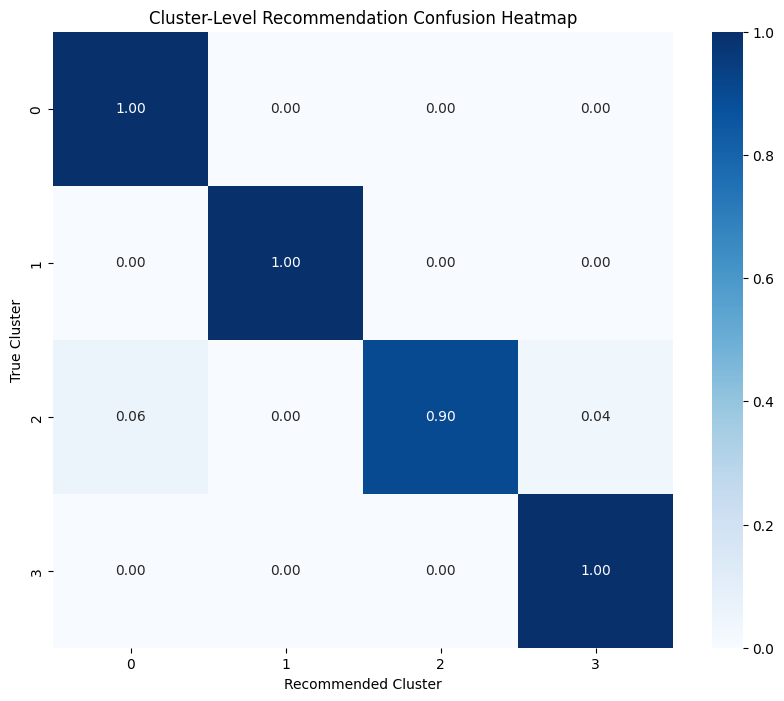

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(
    confusion_normalized,
    cmap="Blues",
    annot=True,
    fmt=".2f",
    cbar=True
)
plt.title("Cluster-Level Recommendation Confusion Heatmap")
plt.xlabel("Recommended Cluster")
plt.ylabel("True Cluster")
plt.show()


## Prediction


--- Synthetic User 1 ---
Most Frequent Cluster Recommended: 2
Most Frequent Career Recommended: 2
Neighbor Clusters: [2, 2, 2, 2, 2, 2, 1, 1, 2, 3]
------------------------------

--- Synthetic User 2 ---
Most Frequent Cluster Recommended: 2
Most Frequent Career Recommended: 2
Neighbor Clusters: [2, 2, 2, 2, 2, 1, 2, 1, 1, 1]
------------------------------

--- Synthetic User 3 ---
Most Frequent Cluster Recommended: 1
Most Frequent Career Recommended: 1
Neighbor Clusters: [1, 1, 1, 1, 1, 3, 1, 2, 1, 1]
------------------------------

--- Synthetic User 4 ---
Most Frequent Cluster Recommended: 2
Most Frequent Career Recommended: 2
Neighbor Clusters: [2, 2, 3, 3, 2, 2, 2, 2, 1, 2]
------------------------------

--- Synthetic User 5 ---
Most Frequent Cluster Recommended: 2
Most Frequent Career Recommended: 2
Neighbor Clusters: [2, 3, 2, 2, 2, 3, 1, 2, 1, 2]
------------------------------

--- Synthetic User 6 ---
Most Frequent Cluster Recommended: 2
Most Frequent Career Recommended: 2
N

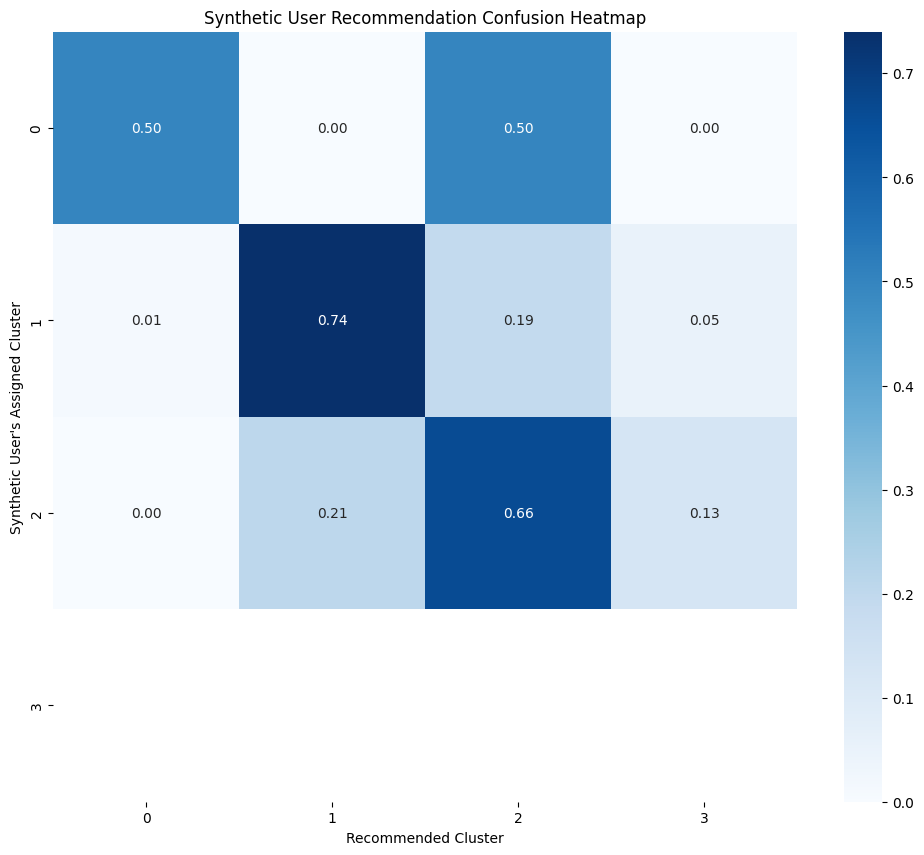

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# --------------- SETUP / CONTEXT ---------------

# kolom numerik
feature_cols = [
    'O_score', 'C_score', 'E_score', 'A_score', 'N_score',
    'Numerical Aptitude', 'Spatial Aptitude', 'Perceptual Aptitude',
    'Abstract Reasoning', 'Verbal Reasoning'
]

# asumsi df_resample sudah ada dan sudah benar
X_train = df_resampled[feature_cols]
y_train_cluster = df_resampled['Representative_Cluster_resampled']

# cluster juga dijadikan career pseudo
y_train_career = y_train_cluster.copy()

# scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# cosine NN
recommendation_k = 10
nn_model = NearestNeighbors(n_neighbors=recommendation_k, metric='cosine')
nn_model.fit(X_train_scaled)

# --------------- GENERATE 30 SYNTHETIC USERS ---------------

np.random.seed(42)
synthetic_profiles = np.random.uniform(low=1, high=10, size=(30, len(feature_cols)))
synthetic_profiles_df = pd.DataFrame(synthetic_profiles, columns=feature_cols)

# scale synthetic profiles
synthetic_profiles_scaled = scaler.transform(synthetic_profiles_df)

# --------------- RECOMMENDATION FUNCTION ---------------

def recommend_career_cosine(
    query_features,
    nn_model,
    X_train,
    y_train_cluster,
    y_train_career,
    top_k=10
):
    if query_features.ndim == 1:
        query_features = query_features.reshape(1, -1)

    distances, indices = nn_model.kneighbors(query_features, n_neighbors=top_k)
    neighbor_clusters = y_train_cluster.iloc[indices[0]]
    neighbor_careers = y_train_career.iloc[indices[0]]

    cluster_count = neighbor_clusters.value_counts().to_dict()
    most_frequent_cluster = neighbor_clusters.mode()[0]

    career_count = neighbor_careers.value_counts().to_dict()
    most_frequent_career = neighbor_careers.mode()[0]

    return {
        "neighbor_indices": indices[0],
        "neighbor_distances": distances[0],
        "neighbor_clusters": neighbor_clusters.tolist(),
        "neighbor_careers": neighbor_careers.tolist(),
        "cluster_count": cluster_count,
        "career_count": career_count,
        "most_frequent_cluster": most_frequent_cluster,
        "most_frequent_career": most_frequent_career
    }

# --------------- RUN FOR ALL 30 SYNTHETIC USERS ---------------

results = []

for i in range(synthetic_profiles_scaled.shape[0]):
    result = recommend_career_cosine(
        synthetic_profiles_scaled[i],
        nn_model,
        X_train_scaled,
        y_train_cluster,
        y_train_career,
        top_k=recommendation_k
    )

    # simpan ke results
    results.append({
        "synthetic_id": i+1,
        **synthetic_profiles_df.iloc[i].to_dict(),
        "predicted_cluster": result['most_frequent_cluster'],
        "predicted_career": result['most_frequent_career']  # di sini career sama dengan cluster
    })

    print(f"\n--- Synthetic User {i+1} ---")
    print(f"Most Frequent Cluster Recommended: {result['most_frequent_cluster']}")
    print(f"Most Frequent Career Recommended: {result['most_frequent_career']}")
    print(f"Neighbor Clusters: {result['neighbor_clusters']}")
    print("------------------------------")

# convert ke dataframe
results_df = pd.DataFrame(results)

# export ke CSV
results_df.to_csv("synthetic_user_predictions.csv", index=False)
print("\n✅ synthetic_user_predictions.csv exported successfully!")

# --------------- SEABORN HEATMAP ---------------

# confusion-like heatmap
unique_clusters = sorted(y_train_cluster.unique())
confusion_df = pd.DataFrame(0, index=unique_clusters, columns=unique_clusters)

for i in range(len(results_df)):
    true_c = results_df.loc[i, "predicted_cluster"]
    neighbors = recommend_career_cosine(
        synthetic_profiles_scaled[i],
        nn_model,
        X_train_scaled,
        y_train_cluster,
        y_train_career,
        top_k=recommendation_k
    )['neighbor_clusters']

    for n in neighbors:
        confusion_df.loc[true_c, n] += 1

confusion_norm = confusion_df.div(confusion_df.sum(axis=1), axis=0)

plt.figure(figsize=(12,10))
sns.heatmap(confusion_norm, cmap="Blues", annot=True, fmt=".2f")
plt.title("Synthetic User Recommendation Confusion Heatmap")
plt.xlabel("Recommended Cluster")
plt.ylabel("Synthetic User's Assigned Cluster")
plt.show()


In [ ]:
# prompt: tampilkan list career tiap cluster career_cluster_map_df

for cluster_id in career_cluster_map_df['Representative_Cluster'].unique():
  print(f"Cluster {cluster_id}:")
  careers_in_cluster = career_cluster_map_df[career_cluster_map_df['Representative_Cluster'] == cluster_id]['Career'].tolist()
  print(careers_in_cluster)
  print("-" * 20)


Cluster 1:
['Accountant', 'Graphic Designer', 'Research Scientist', 'Architect', 'Software Developer', 'Construction Engineer', 'Astronomer', 'Biologist', 'Environmental Scientist', 'Biomedical Engineer', 'Biotechnologist', 'Industrial Engineer', 'Zoologist', 'Mechanical Engineer', 'Forensic Scientist', 'Geologist', 'Wildlife Biologist', 'Air Traffic Controller', 'Game Developer', 'Urban Planner', 'Airline Pilot', 'Environmental Engineer', 'Mechanical Designer', 'Aerospace Engineer', 'Wildlife Conservationist', 'Biomedical Researcher', 'Electrical Engineer', 'Marine Biologist', 'Forensic Psychologist', 'Public Health Analyst', 'Quality Control Inspector', 'Civil Engineer', 'Robotics Engineer', 'Electronics Design Engineer']
--------------------
Cluster 2:
['Salesperson', 'Teacher', 'Nurse', 'Psychologist', 'Marketing Manager', 'Physician', 'Human Resources Manager', 'Journalist', 'Event Planner', 'Real Estate Agent', 'Lawyer', 'Marketing Coordinator', 'Social Worker', 'HR Recruiter', '

# Ground Truth Test

In [ ]:
df_resampled.columns

Index(['O_score', 'C_score', 'E_score', 'A_score', 'N_score',
       'Numerical Aptitude', 'Spatial Aptitude', 'Perceptual Aptitude',
       'Abstract Reasoning', 'Verbal Reasoning',
       'Representative_Cluster_resampled'],
      dtype='object')

# Summary


### 1. Assumptions

Based on the provided code and context, the key assumptions made are:

*   **Data Represents Personality and Talent:** The numerical features (`numerical_features_for_scaling`) are assumed to effectively capture the relevant aspects of personality and talent for career recommendation.
*   **Clustering Reveals Meaningful Career Groups:** It is assumed that applying K-Means to the personality/talent features will reveal meaningful and distinct clusters of careers that share similar underlying traits profiles. The choice of `k=4` assumes that 4 clusters provide the most sensible grouping based on the evaluation metrics used (Elbow, Silhouette, Davies-Bouldin).
*   **Within-Cluster Homogeneity:** It's assumed that samples (representing individuals or career profiles) within the same cluster are relatively homogeneous in terms of their features and implicitly, suitable career paths. The `Representative_Cluster` assignment relies on the majority cluster for each original career, assuming this majority is representative.
*   **SMOTE Effectively Handles Imbalance:** The application of SMOTE on the cluster labels assumes that generating synthetic samples for minority clusters is an appropriate and effective way to address class imbalance for subsequent modeling or similarity calculations, without introducing significant noise or unrealistic data points.
*   **Scaled Features are Appropriate for Distance/Similarity:** Standard scaling is assumed to be sufficient and appropriate for preparing features for distance-based algorithms (K-Means, KNN, Cosine Similarity).
*   **Evaluation Metrics Reflect Recommendation Quality:** The chosen evaluation metrics (Accuracy, Precision, Recall, F1-weighted, P@k, R@k, AP@k, MAP, MRR) are assumed to be relevant and informative for assessing the performance of the models in predicting/recommending the correct career cluster.
*   **Test Set Represents Unseen Data:** The split into training and testing sets assumes that the test set effectively simulates unseen data drawn from the same underlying distribution as the training data. The adversarial validation check helps assess this, but the core assumption remains.
*   **Pre-calculated Baselines are Fair:** Saving the preprocessed data and trained models (scaler, clusterer) is done with the assumption that these represent a fair baseline state for comparison with future iterations or models.

### 2. Limitations

The analysis and models presented have the following potential limitations:

*   **Feature Representativeness:** The quality of recommendations is fundamentally limited by how well the initial numerical features truly capture the essential aspects of personality and talent relevant to career success and satisfaction. If key factors are missing or poorly represented, the clusters and subsequent recommendations will be suboptimal.
*   **K-Means Limitations:** K-Means assumes spherical clusters of roughly equal size and density. If the true clusters in the data are non-spherical, of vastly different sizes, or have complex structures, K-Means might not identify them accurately, potentially leading to a suboptimal clustering result. The choice of `k=4` based on metrics might not capture the nuanced groupings desired by domain experts.
*   **SMOTE Side Effects:** While SMOTE helps with imbalance, it creates synthetic data points that may not perfectly reflect real-world individuals. This could potentially blur cluster boundaries or affect the representativeness of the resampled dataset, especially if clusters are not well-separated. SMOTE's effectiveness can degrade in high-dimensional spaces or if minority samples are outliers.
*   **Cluster Granularity:** Grouping 104 original careers into just 4 clusters is a significant simplification. While useful for reducing complexity, it means that individuals within the same cluster might still have very different original career paths. A recommendation at the cluster level is less specific than recommending a particular career.
*   **Static Clustering:** The clustering is performed once on the entire dataset. It doesn't account for potential evolution in career landscapes or individual preferences over time. New careers would need to be assigned to existing clusters.
*   **Evaluation Focus on Clusters:** The evaluation metrics primarily assess the ability to predict or recommend the *correct cluster*. This doesn't directly measure the quality of recommending *specific careers* within that cluster. A test user might be correctly assigned to Cluster X, but the recommended careers *within* Cluster X (e.g., based on nearest neighbors' original careers) might not be the most suitable ones.
*   **Cosine Similarity Interpretation:** Cosine Similarity finds samples with similar *feature vectors*. While these samples are assumed to be in the same cluster, this doesn't guarantee their *original careers* are similar or relevant. The recommendation is implicitly based on recommending samples, not careers directly.
*   **KNN as a Classifier:** The KNN *classifier* predicts a single most likely cluster. While we evaluated its probability ranking, its primary function isn't providing a ranked list of diverse recommendations.
*   **Limited Model Scope:** Only KNN and Cosine Similarity are used as baseline models. Other algorithms (e.g., different clustering methods, dimensionality reduction + classification, content-based filtering combining career text data, etc.) might yield better results.
*   **Lack of External Validation:** The evaluation is purely intrinsic (based on the available dataset split). Performance on truly unseen, prospectively collected data might differ.
*   **Interpretability:** While feature importance (MI) and error analysis provide some insights, the complex interactions of features within the models and the meaning of the clusters require careful domain interpretation.

### 3. Baseline

The baseline performance is established by the initial evaluation of the two chosen models:

1.  **KNN Classifier:** Evaluated using Stratified K-Fold Cross-Validation and on the held-out test set. The key baseline metrics for KNN are:
    *   Accuracy on the test set.
    *   Precision, Recall, F1-score (weighted/macro) from the classification report on the test set.
    *   Average Precision@10 (AP@10) on the test set (based on class probabilities ranking).
    *   Recall@10 (R@10) on the test set (based on class probabilities ranking - fraction of samples where true class is in top 10).
    *   Mean Average Precision (MAP) (macro average of AP per class).
    *   Mean Reciprocal Rank (MRR) (based on class probabilities ranking).

2.  **Cosine Similarity Recommender:** Evaluated on the held-out test set by finding the `recommendation_k` (e.g., 10) nearest neighbors in the training data. The key baseline metrics for Cosine Similarity are:
    *   Average Precision@10 (AP@10) (based on relevant neighbors among the top 10).
    *   Recall@10 (R@10) which is equivalent to Hit Rate@10 for clusters (fraction of samples where the true cluster is found among the top 10 neighbors' clusters).
    *   Mean Average Precision (MAP) (calculated over all relevant training samples).
    *   Mean Reciprocal Rank (MRR) (based on neighbor ranking).

The **evaluation table** that compares KNN and Cosine Similarity across the metrics AP@10, Recall@k, MAP, and MRR provides the concrete baseline performance figures for both approaches. Any future model or improvement should aim to exceed these baseline metric values on the same evaluation methodology (using the same test set or cross-validation folds).

The saved files (`df_resampled_preprocessed.csv`, `fitted_scaler.pkl`, `fitted_kmeans_model.pkl`, `cluster_career_summary.csv`) represent the processed data and components used to establish this baseline, ensuring reproducibility.

NameError: name '_JBbz9ESAsLz' is not defined